## Case study: continual feature selection in genomic data stream

1. **Data preparation**
2. 

In [71]:
# Required to correctly display interactive (dynamic) plots in Jupyter notebooks
%matplotlib notebook
# For Jupyter Lab instead
# %matplotlib ipympl
import seaborn as sns

Set the main folder

In [72]:
import os
os.chdir("/Users/vittfo/Documents/ERC/TEST/BRCA/")
print(os.getcwd())

/Users/vittfo/Documents/ERC/TEST/BRCA


### Data preparation and exploration
Load gene expression of breast cancer samples from the SCAN-B cohort 

In [73]:
# import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
swdata = pd.read_csv('sw_breast_gdat.csv')
if 'Unnamed: 0' in swdata.columns:
    print(swdata['Unnamed: 0'])
swdata = swdata.drop('Unnamed: 0', axis=1, errors='ignore')

0          F1
1          F2
2          F3
3          F4
4          F5
        ...  
2964    F3267
2965    F3268
2966    F3269
2967    F3270
2968    F3272
Name: Unnamed: 0, Length: 2969, dtype: object


In [75]:
print(" \nCheck DataFrame sizes: \n\n", swdata.shape) # check dataset dimensions
print(" \nCount total NaN in a DataFrame : \n\n", swdata.isnull().sum().sum()) # count total NaN in a DataFrame

 
Check DataFrame sizes: 

 (2969, 30865)
 
Count total NaN in a DataFrame : 

 0


In [77]:
# identify genes with mean expression smaller than zero
low_count = []
for i in range(swdata.shape[1]):
    if np.max(swdata.iloc[:,i]) < 0:
        low_count.append(i)
print(len(low_count))

5621


In [78]:
genes_to_be_removed = np.unique(np.asarray(low_count))
swdata = swdata.drop(swdata.columns[genes_to_be_removed],axis = 1)
print(" \nCheck DataFrame sizes: \n\n", swdata.shape) # check dataset dimensions

 
Check DataFrame sizes: 

 (2969, 25244)


Load clinical variables of breast cancer samples from the SCAN-B cohort 

In [79]:
swpheno = pd.read_csv('sw_breast_pheno.csv')
if 'Unnamed: 0' in swpheno.columns:
    print(swpheno['Unnamed: 0'])
swpheno = swpheno.drop('Unnamed: 0', axis=1, errors='ignore')

0          F1
1          F2
2          F3
3          F4
4          F5
        ...  
2964    F3267
2965    F3268
2966    F3269
2967    F3270
2968    F3272
Name: Unnamed: 0, Length: 2969, dtype: object


In [80]:
print(swpheno.shape)
swpheno.head()

(2969, 31)


Sample_geo_accession          Sample_status Sample_submission_date  \
0           GSM2528079  Public on Mar 12 2018            Mar 09 2017   
1           GSM2528080  Public on Mar 12 2018            Mar 09 2017   
2           GSM2528081  Public on Mar 12 2018            Mar 09 2017   
3           GSM2528082  Public on Mar 12 2018            Mar 09 2017   
4           GSM2528083  Public on Mar 12 2018            Mar 09 2017   

  Sample_last_update_date Sample_type  Sample_channel_count  \
0             Mar 12 2018         SRA                     1   
1             Mar 12 2018         SRA                     1   
2             Mar 12 2018         SRA                     1   
3             Mar 12 2018         SRA                     1   
4             Mar 12 2018         SRA                     1   

  Sample_source_name_ch1 Sample_organism_ch1  Age  NodeSize  ...  \
0   Primary breast tumor        Homo sapiens   43       9.0  ...   
1   Primary breast tumor        Homo sapiens   48      14.0  ...   
2   Primary breast tumor        Homo sapiens   69      27.0  ...   
3   Primary breast tumor        Homo sapiens   39      51.0  ...   
4   Primary breast tumor        Homo sapiens   73      60.0  ...   

                 nhg_pmgc               er_psgc               pgr_psgc  \
0  nhg prediction mgc: G3  er prediction sgc: 0  pgr prediction sgc: 0   
1  nhg prediction mgc: G2  er prediction sgc: 1  pgr prediction sgc: 1   
2  nhg prediction mgc: G3  er prediction sgc: 1  pgr prediction sgc: 1   
3  nhg prediction mgc: G3  er prediction sgc: 1  pgr prediction sgc: 1   
4  nhg prediction mgc: G2  er prediction sgc: 1  pgr prediction sgc: 1   

                her2_psgc               ki67_psgc   Pam50 SurvDays  \
0  her2 prediction sgc: 0  ki67 prediction sgc: 1   Basal     2367   
1  her2 prediction sgc: 0  ki67 prediction sgc: 0    LumA     2367   
2  her2 prediction sgc: 0  ki67 prediction sgc: 1    LumB     2168   
3  her2 prediction sgc: 1  ki67 prediction sgc: 1    LumA     2416   
4  her2 prediction sgc: 0  ki67 prediction sgc: 0  Normal     2389   

  OverallSurv Endocrine_treat chemo  
0           0             0.0   1.0  
1           0             1.0   1.0  
2           1             1.0   1.0  
3           0             1.0   1.0  
4           0             1.0   0.0  

[5 rows x 31 columns]

Load TCGA breast cancer data

In [81]:
tcga = pd.read_csv('tcga_breast_gdat_0.csv')
tcgap = pd.read_csv('tcga_breast_pheno_0.csv')

In [82]:
print(tcga.shape)
print(tcgap.shape)

(1081, 20502)
(1081, 26)


In [83]:
if 'Unnamed: 0' in tcga.columns:
    print(tcga['Unnamed: 0'])

0       TCGA.3C.AAAU.01A.11R.A41B.07
1       TCGA.3C.AALI.01A.11R.A41B.07
2       TCGA.3C.AALJ.01A.31R.A41B.07
3       TCGA.3C.AALK.01A.11R.A41B.07
4       TCGA.4H.AAAK.01A.12R.A41B.07
                    ...             
1076    TCGA.WT.AB44.01A.11R.A41B.07
1077    TCGA.XX.A899.01A.11R.A36F.07
1078    TCGA.XX.A89A.01A.11R.A36F.07
1079    TCGA.Z7.A8R5.01A.42R.A41B.07
1080    TCGA.Z7.A8R6.01A.11R.A41B.07
Name: Unnamed: 0, Length: 1081, dtype: object


In [84]:
tcga=tcga.drop('Unnamed: 0', axis=1, errors='ignore')

In [85]:
# count total NaN in a DataFrame
print(" \nCount total NaN in a DataFrame : \n\n", tcga.isnull().sum().sum())

 
Count total NaN in a DataFrame : 

 0


In [86]:
if 'Unnamed: 0' in tcgap.columns:
    tcgap.pop('Unnamed: 0')

In [87]:
tcgap.head()

patient Tumor.Type Included_in_previous_marker_papers vital_status  \
0  TCGA-3C-AAAU       BRCA                                 NO        Alive   
1  TCGA-3C-AALI       BRCA                                 NO        Alive   
2  TCGA-3C-AALJ       BRCA                                 NO        Alive   
3  TCGA-3C-AALK       BRCA                                 NO        Alive   
4  TCGA-4H-AAAK       BRCA                                 NO        Alive   

   days_to_birth  days_to_death  days_to_last_followup  \
0       -20211.0            NaN                 4047.0   
1       -18538.0            NaN                 4005.0   
2       -22848.0            NaN                 1474.0   
3       -19074.0            NaN                 1448.0   
4       -18371.0            NaN                  348.0   

   age_at_initial_pathologic_diagnosis pathologic_stage  Tumor_Grade  ...  \
0                                   55              NaN          NaN  ...   
1                                   50         Stage_II          NaN  ...   
2                                   62         Stage_II          NaN  ...   
3                                   52          Stage_I          NaN  ...   
4                                   50        Stage_III          NaN  ...   

  CNV.Clusters Mutation.Clusters  DNA.Methylation.Clusters  mRNA.Clusters  \
0           C6                C7                        C1             C1   
1           C6                C9                        C2             C2   
2           C6                C4                        C2             C2   
3           C1                C5                        C2             C2   
4           C6                C4                        C1             C2   

   miRNA.Clusters lncRNA.Clusters Protein.Clusters PARADIGM.Clusters  \
0              C3             NaN              NaN                C5   
1              C3             NaN               C2                C4   
2              C2             NaN              NaN                C4   
3              C2             NaN               C2                C6   
4              C2             NaN               C2                C6   

  Pan.Gyn.Clusters OverallSurv  
0              NaN           0  
1               C4           0  
2              NaN           0  
3               C4           0  
4               C1           0  

[5 rows x 25 columns]

#### Define the PAM 50 signatures

Define the list of PAM50 genes. This list does not contain 'ORC6L', 'KNTC2', 'CDCA1'.

In [88]:
pam50sig = ["ACTR3B","ANLN","BAG1","BCL2","BIRC5","BLVRA","CCNB1","CCNE1","CDC20","CDC6","CDH3","CENPF","CEP55","CXXC5","EGFR","ERBB2","ESR1","EXO1","FGFR4","FOXA1","FOXC1","GPR160","GRB7","KIF2C","KRT14","KRT17","KRT5","MAPT","MDM2","MELK","MIA","MKI67","MLPH","MMP11","MYBL2","MYC","NAT1","PGR","PHGDH","PTTG1","RRM2","SFRP1","SLC39A6","TMEM45B","TYMS","UBE2C","UBE2T"]

In [89]:
len(pam50sig)

47

#### Check and convert class labels (breast cancer subtypes)

In [94]:
swpheno['Pam50'].unique()

array(['Basal', 'LumA', 'LumB', 'Normal', 'Her2'], dtype=object)

In [95]:
tcgap['Pam50'].unique()

array(['LumA', 'Her2', 'LumB', 'Normal', 'Basal'], dtype=object)

Barplot showing the number of samples available for each class

<IPython.core.display.Javascript object>


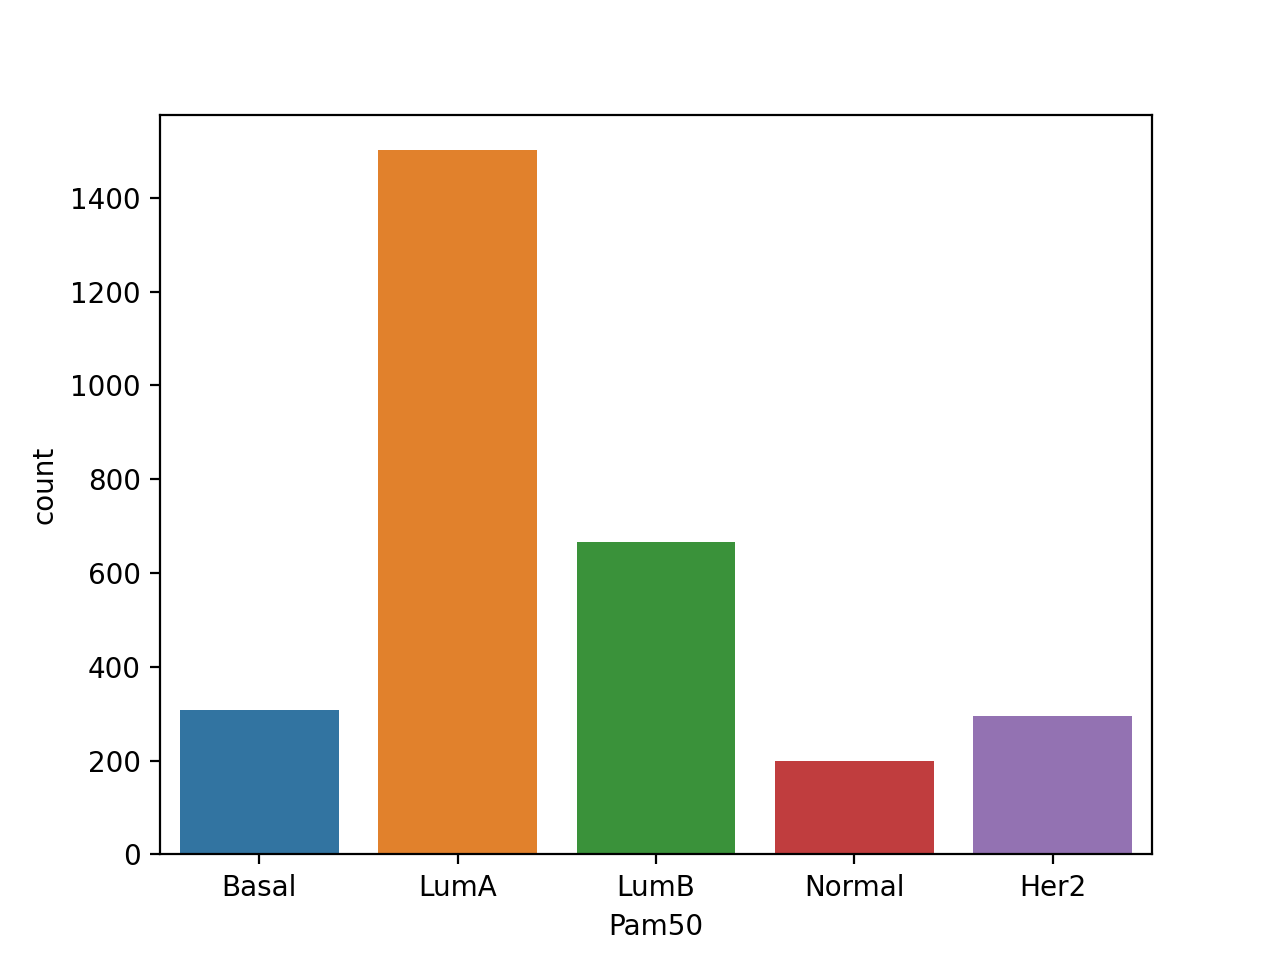

<AxesSubplot:xlabel='Pam50', ylabel='count'>

In [96]:
sns.countplot(x='Pam50', data=swpheno)

<IPython.core.display.Javascript object>


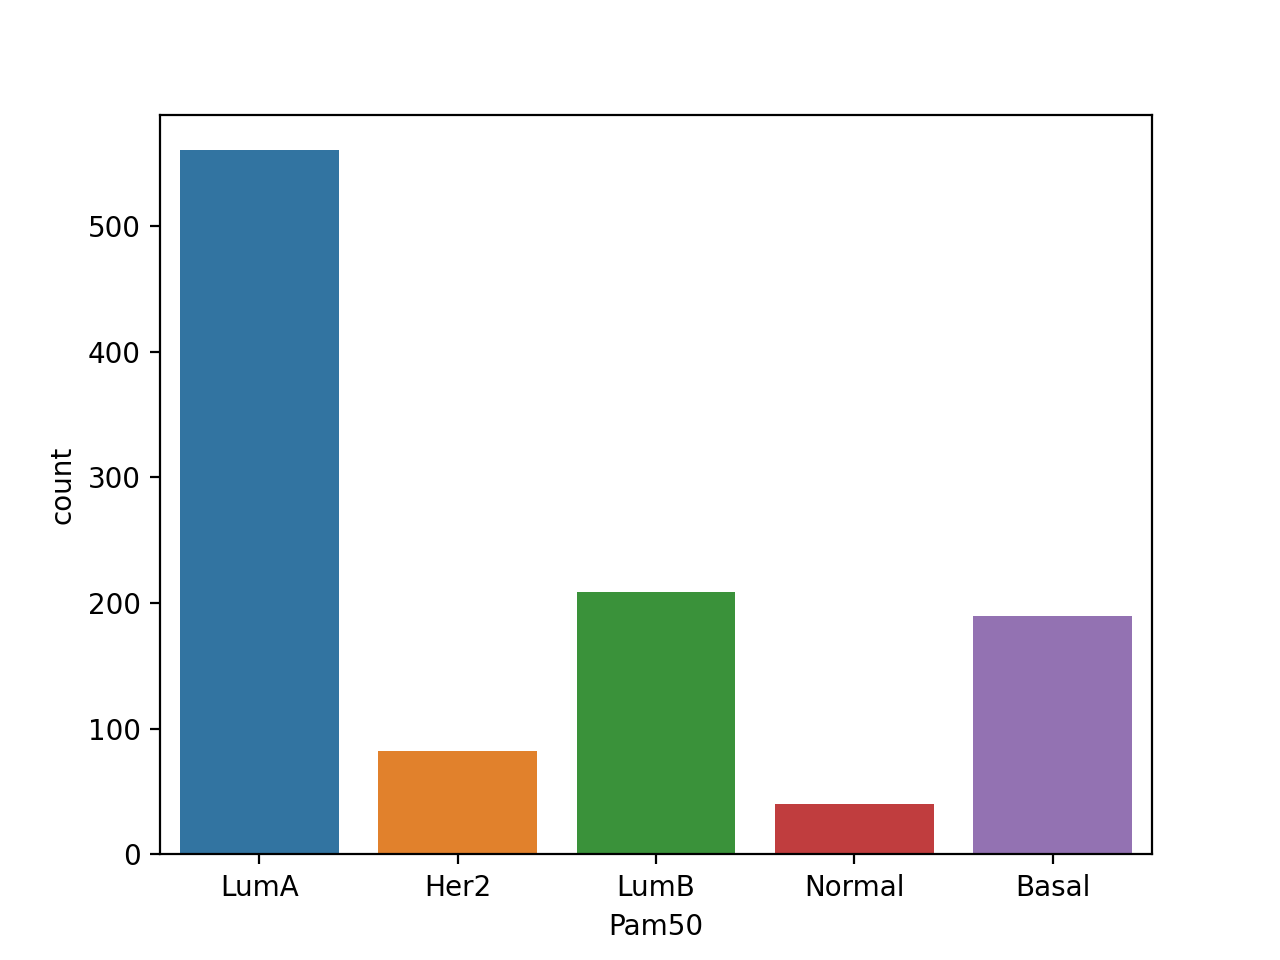

<AxesSubplot:xlabel='Pam50', ylabel='count'>

In [97]:
sns.countplot(x='Pam50', data=tcgap)

In [98]:
swpheno['Pam50'].dtypes

dtype('O')

In [99]:
pam50 = swpheno['Pam50']

Mapping class labels to indexes

In [100]:
class2idx = {
    'LumA':0,
    'LumB':1,
    'Her2':2,
    'Basal':3,
    'Normal':4
}

idx2class = {v: k for k, v in class2idx.items()}

In [101]:
import collections
counter=collections.Counter(pam50)
print(counter)

Counter({'LumA': 1501, 'LumB': 666, 'Basal': 308, 'Her2': 295, 'Normal': 199})


In [102]:
# replacing labels
pam50.replace(class2idx, inplace=True)

In [103]:
# checking the counts again
counter=collections.Counter(pam50)
print(counter)

Counter({0: 1501, 1: 666, 3: 308, 2: 295, 4: 199})


In [499]:
pam50.head()

0    3
1    0
2    1
3    0
4    4
Name: Pam50, dtype: int64

In [104]:
pam50t = tcgap['Pam50']

In [105]:
counter=collections.Counter(pam50t)
print(counter)

Counter({'LumA': 560, 'LumB': 209, 'Basal': 190, 'Her2': 82, 'Normal': 40})


In [106]:
pam50t.replace(class2idx, inplace=True)

In [107]:
counter=collections.Counter(pam50t)
print(counter)

Counter({0: 560, 1: 209, 3: 190, 2: 82, 4: 40})


#### Remove zero-variance features

In [113]:
from sklearn.feature_selection import VarianceThreshold
zv_sel_data = VarianceThreshold(0)
zv_sel_tcga = VarianceThreshold(0)

In [114]:
print(swdata.shape)
print(tcga.shape)

(2969, 25244)
(1081, 20501)


In [115]:
zv_sel_data.fit_transform(swdata)
zv_sel_tcga.fit_transform(tcga)

array([[ 7.63001006,  0.        ,  0.        , ..., 10.2063508 ,
         1.44535592,  0.        ],
       [ 7.89714602,  0.        ,  0.        , ...,  8.67151559,
         9.85734423,  0.        ],
       [ 8.72872528,  0.9310022 ,  0.        , ...,  8.99582226,
         5.1842049 ,  0.        ],
       ...,
       [ 8.00075834,  1.7492339 ,  1.27327716, ...,  9.89891589,
         7.88410029,  0.95954761],
       [ 8.7831374 ,  0.        ,  0.6756353 , ...,  9.55426037,
         7.90645291,  0.        ],
       [ 7.96189589,  0.        ,  0.        , ...,  8.85522356,
         4.45144852,  0.        ]])

In [116]:
swdata0 = swdata[swdata.columns[zv_sel_data.get_support()]]
tcga0 = tcga[tcga.columns[zv_sel_tcga.get_support()]]

In [117]:
print(swdata0.shape)
print(tcga0.shape)

(2969, 25244)
(1081, 20204)


#### Filter out features based on the F-statistics

In [118]:
common_feats = list(set.intersection(set(swdata.columns), set(tcga.columns)))
len(common_feats)

17345

In [119]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
f_selector_swdata = make_pipeline(StandardScaler(), SelectKBest(f_classif, k = 15000))
f_selector_tcga = make_pipeline(StandardScaler(), SelectKBest(f_classif, k = 15000))

In [120]:
f_selector_swdata.fit_transform(swdata0, pam50)

array([[-2.30024876, -2.75866509, -1.1098719 , ..., -0.27424203,
        -1.20383899, -1.972446  ],
       [ 0.10267179, -1.73043883,  0.10946263, ...,  1.40922476,
        -1.22427851, -1.06075331],
       [ 0.48928348, -0.17877623, -1.79723455, ...,  0.48730343,
        -0.65604808, -0.95014319],
       ...,
       [-1.78943064, -0.43417177, -0.94127198, ..., -1.00826124,
         1.54205034,  1.38040093],
       [ 0.33006692,  0.73502726,  0.01113258, ..., -0.18613615,
         0.81617192,  0.25098011],
       [-0.07480095, -0.03126611, -0.08151757, ..., -0.76149248,
        -0.87794625, -0.99064953]])

In [121]:
f_selector_tcga.fit_transform(tcga0, pam50t)

array([[ 0.43135856, -0.65556778, -0.9730228 , ...,  1.24936314,
        -2.2972226 , -0.23262364],
       [ 0.66112829, -0.3046976 , -0.58730611, ...,  0.35656676,
         1.75067938, -0.23262364],
       [ 1.37638856, -1.03062952, -0.36345541, ..., -0.46915258,
        -0.49806482, -0.23262364],
       ...,
       [ 0.75024761,  0.71738362,  0.58970395, ...,  0.5688892 ,
         0.80114191,  2.7036072 ],
       [ 1.42318966, -0.50229396,  1.69947982, ..., -1.01796704,
         0.81189813, -0.23262364],
       [ 0.71682113, -0.31905032, -0.63244171, ..., -1.73176402,
        -0.85067183, -0.23262364]])

In [124]:
selected_feat_swdata = swdata0.columns[f_selector_swdata['selectkbest'].get_support()]
len(selected_feat_swdata)

15000

In [125]:
selected_feat_tcga = tcga0.columns[f_selector_tcga['selectkbest'].get_support()]
len(selected_feat_tcga)

15000

#### Select common features

How many in common?

In [585]:
common_feats = list(set.intersection(set(selected_feat_swdata), set(selected_feat_tcga)))
len(common_feats)

11303

In [591]:
#common_feats = list(set.intersection(set(swdata.columns), set(tcga.columns)))
#len(common_feats)

In [587]:
print(len(list(set.intersection(set(selected_feat_swdata), set(pam50sig)))))
print(len(list(set.intersection(set(selected_feat_tcga), set(pam50sig)))))

47
47


In [588]:
print(len(list(set.intersection(set.intersection(set(selected_feat_swdata), set(selected_feat_tcga)),set(pam50sig)))))

47


In [589]:
biom_list_pam50 = list(set.intersection(set.intersection(set(selected_feat_swdata), set(selected_feat_tcga)),set(pam50sig)))
print(len(biom_list_pam50))

biom_list_oncop = list(set.intersection(set.intersection(set(selected_feat_swdata), set(selected_feat_tcga)),set(oncopedsig)))
print(len(biom_list_oncop))

biom_list_endop = list(set.intersection(set.intersection(set(selected_feat_swdata), set(selected_feat_tcga)),set(endopred)))
print(len(biom_list_endop))

47
16
8


#### Define the datasets

In [590]:
X_data = swdata[common_feats]
X_data.shape

(2969, 17345)

In [140]:
X_tcga = tcga[common_feats]
X_tcga.shape

(1081, 17345)

Merge the two datasets

In [141]:
X_tot = pd.concat([X_data, X_tcga])
X_tot.shape

(4050, 17345)

Merge the two class vectors

In [142]:
print(len(pam50))
print(len(pam50t))

2969
1081


In [143]:
print(type(pam50))
print(type(pam50t))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [144]:
Y_tot = pd.concat([pam50, pam50t]) 
Y_tot.reset_index(inplace = True, drop = True)
print(len(Y_tot))
print(type(Y_tot))
print(Y_tot.head())

4050
<class 'pandas.core.series.Series'>
0    3
1    0
2    1
3    0
4    4
Name: Pam50, dtype: int64


### Now we use the river framework

Load modules from **sklearn**

In [145]:
import sklearn as sk
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNetCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

Load modules from **river**

In [166]:
import random
from river import stream
from river import linear_model
from river import metrics
from river import multiclass
from river import preprocessing
from river import optim
from river.drift import ADWIN
from river.drift import PageHinkley
from river import feature_selection
from river import tree
from river.multiclass import OneVsRestClassifier
from river.utils import dict2numpy
from river import ensemble
from river import neighbors
from river import naive_bayes
import warnings
warnings.filterwarnings('ignore')

Define utility functions

In [147]:
dict_filter = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

Check the scaling process

In [148]:
len(biom_list_pam50)

47

In [150]:
scaler = preprocessing.StandardScaler()

C = 0
X_scal = np.zeros(shape=(X_tot.shape[0],len(pam50sig)))
for xi, yi in stream.iter_pandas(X_tot):
    xi = dict_filter(xi, pam50sig)
    xi_scaled = scaler.learn_one(xi).transform_one(xi)
    X_scal[C] = dict2numpy(xi_scaled)
    C = C + 1

In [151]:
provola = pd.DataFrame(X_scal)
provola = provola.set_axis(biom_list_pam50, axis=1)
provola.head()

FOXA1      RRM2     MYBL2      EGFR     UBE2T      EXO1       PGR  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  1.000000 -1.000000  1.000000  1.000000 -1.000000  1.000000 -1.000000   
2 -0.343126  1.048983 -0.250263  0.328440  1.140209 -0.902187  1.392565   
3 -0.740358  0.730592  1.044053  0.972399 -0.707744  1.127230  0.014513   
4 -0.615023 -1.862832 -0.131022  0.414664 -1.619485 -1.112725 -1.554925   

      PHGDH    ACTR3B      BCL2  ...      GRB7     CENPF     MMP11     MKI67  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1 -1.000000 -1.000000 -1.000000  ...  1.000000 -1.000000 -1.000000 -1.000000   
2  0.049611 -0.309551  0.670914  ...  0.357357  0.792914  1.158658  1.278067   
3 -0.608407 -1.436465  1.414043  ...  0.320885 -0.448866 -0.482157  0.455203   
4 -1.435480 -1.902086 -1.786294  ... -0.560471 -0.178568 -1.696662 -1.806695   

       BAG1       MYC      NAT1     PTTG1     CCNB1      MLPH  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1 -1.000000  1.000000  1.000000 -1.000000 -1.000000  1.000000  
2 -1.211141  0.043130  1.409190  1.243135  1.143153  1.334442  
3  0.375749  0.836628  1.051950  0.688961 -0.455071  0.604327  
4  0.884824 -0.864691 -0.308243 -1.801787 -1.817074 -1.851023  

[5 rows x 47 columns]

(4050, 47)


<IPython.core.display.Javascript object>


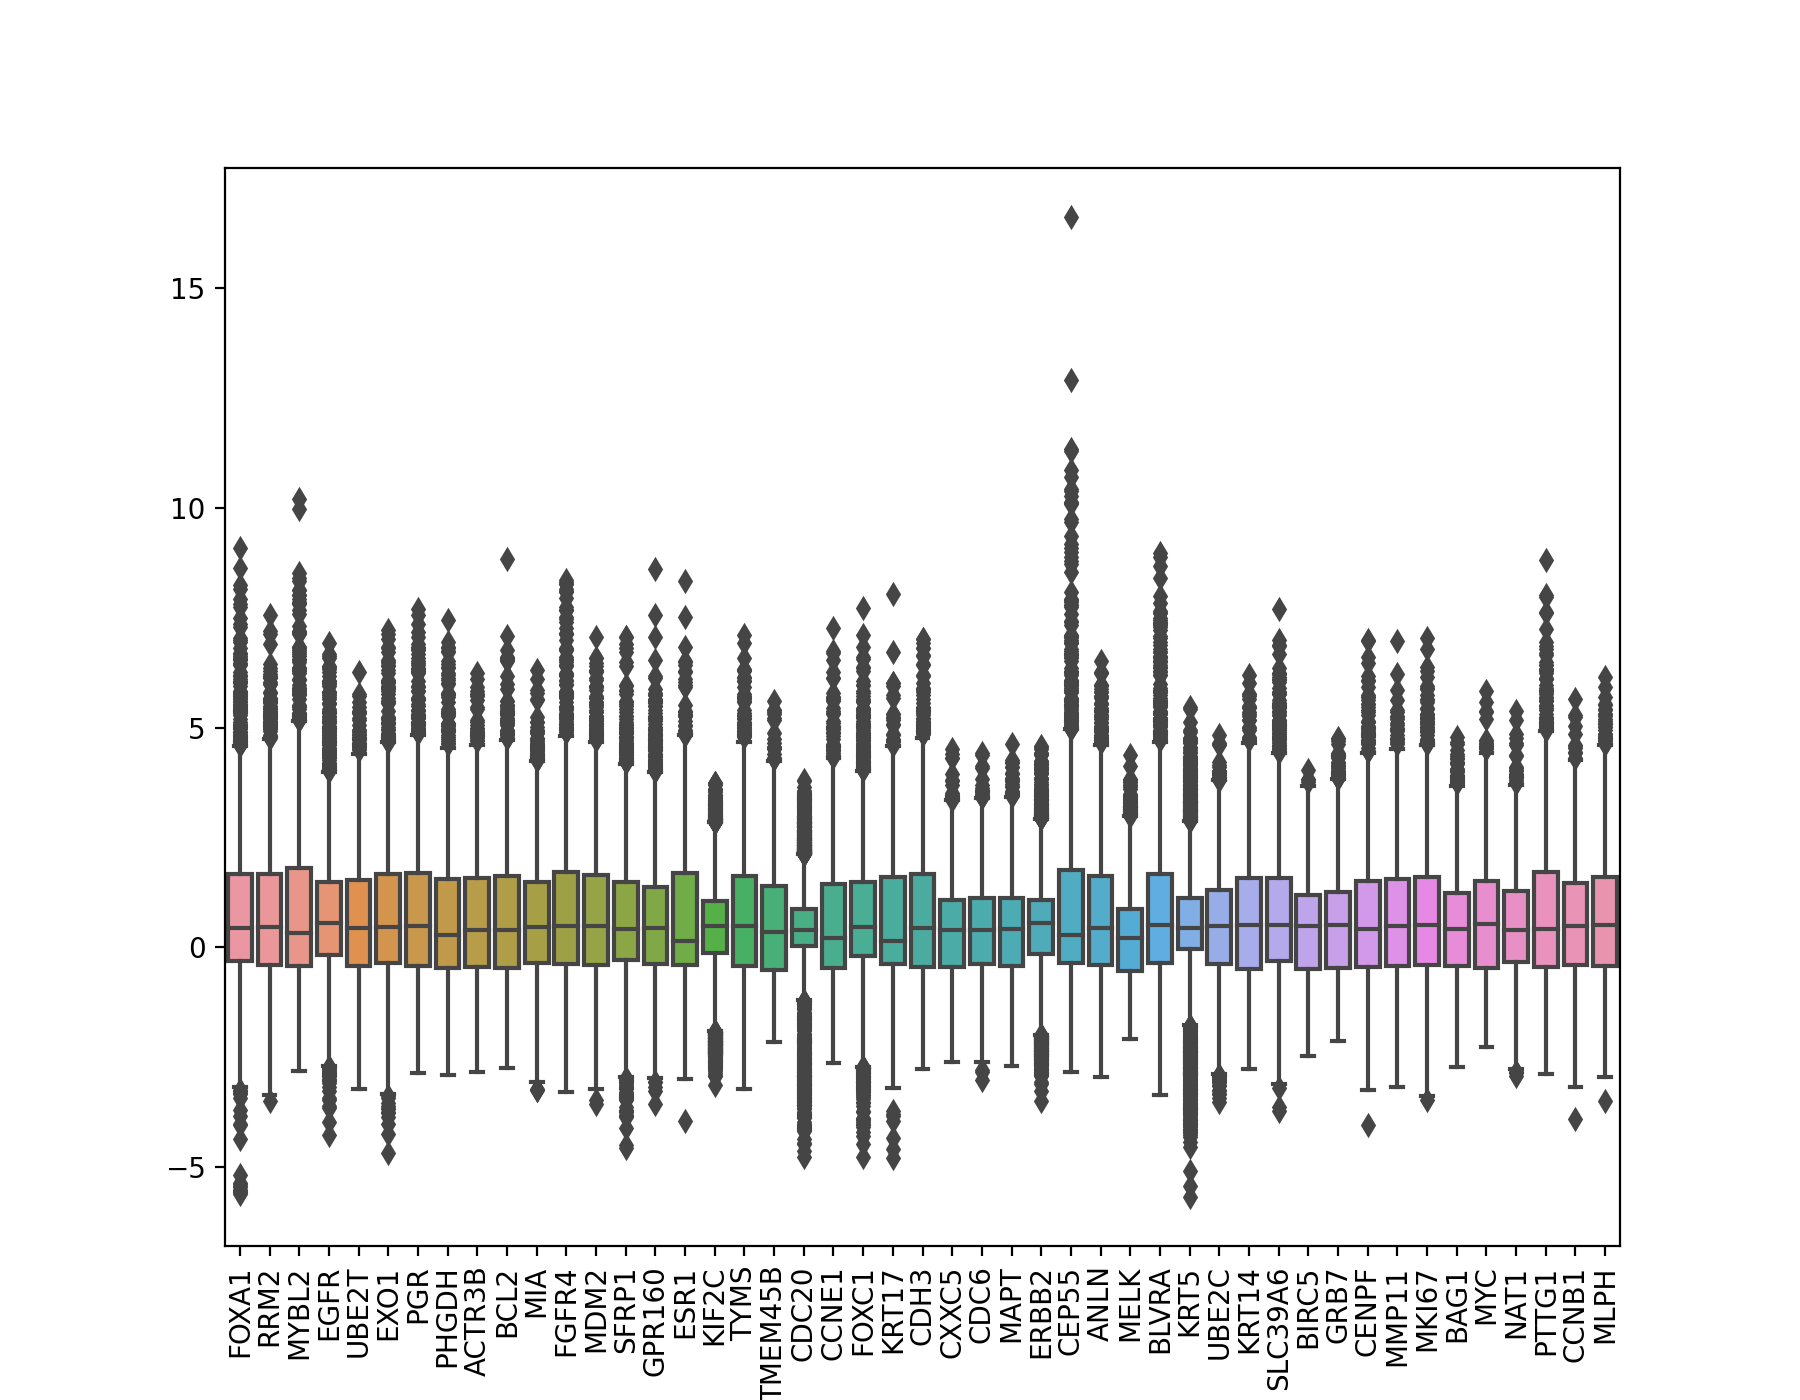

<AxesSubplot:>

In [152]:
print(provola.shape)
from matplotlib import pyplot
fig_dims = (9, 7)
fig, ax = pyplot.subplots(figsize=fig_dims)
ax.tick_params(axis='x', rotation=90)
sns.boxplot(data = provola)

#### Implementing the DFF-ES strategy

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# based on mutual information (univariate/filter method)
mi_selector = SelectKBest(mutual_info_classif, k = 100)

# set the selector
selector = mi_selector

# Make a pipeline for feature selection
ufeat_selection = make_pipeline(StandardScaler(), selector)

In [162]:
def runFDS(known_biomarkers, model, fs_proc, X, Y, bufferlen = 500, last_k = 2, seed=0):
    
    random.seed(seed)
    
    # define the metric to be evaluated
    metric_ht = metrics.BalancedAccuracy()
    metric_ec = metrics.BalancedAccuracy()

    # set default biomarker
    biomarker_opts = []

    # temp variables
    y_true = []
    y_pred = []
    ye_pred = []
    all_ht = []
    all_ec = []
    drifts = []
    feat_drifts = []
    acc_fdd = []

    val_ec = 0
    val_ht = 0

    # Add the first model to the ensemble learning system
    batch_models = []
    feature_sets = []
    
    # Define the drif detector
    adwin = ADWIN()

    C = 0 # count patients
    buffer = [] # buffer of collected patient-based gene expression profiles
    cnt_biomarker = None
    for xi, yi in stream.iter_pandas(X, Y): #data

        buffer.append(C)

        # select the features corresponding to the current biomarker
        xi = dict_filter(xi, known_biomarkers)

        # test the current model on the new "unobserved" sample
        yi_pred = model.predict_one(xi) 

        # check if we have already included new classifiers
        if len(batch_models) == 0 :
            ye_pred.append(-1)
            all_ec.append(0)
        else :
            # collect results from clf.predict calls
            if len(batch_models) > 1:
                preds = [clf.predict_proba(X[fset].iloc[[C]]) for clf, fset in zip(batch_models[len(batch_models)-last_k:len(batch_models)],
                                                                                   feature_sets[len(feature_sets)-last_k:len(feature_sets)])]
            else:
                preds = [clf.predict_proba(X[fset].iloc[[C]]) for clf, fset in zip(batch_models, feature_sets)]

            # add the prediction results of the online learning algorithm
            preds.append(dict2numpy(model.predict_proba_one(xi)))
            # compile the average of the estimated class probabilities
            avgprob = np.average(np.asarray(preds), axis = 0)
            # assign the class labels based on the max prob
            pred = batch_models[0]['randomforestclassifier'].classes_[np.argmax(avgprob)]
            ye_pred.append(pred)
            # update the metric
            val_ec = metric_ec.update(yi, pred)
            all_ec.append(val_ec.get())

        # train the online model with the new sample
        model.learn_one(xi, yi)

        # store the truth and the prediction
        y_true.append(yi)
        y_pred.append(yi_pred)#y_pred.append(yi_pred[True])

        val_ht = metric_ht.update(yi, yi_pred)

        in_drift, in_warning = adwin.update(val_ht.get())
        if in_drift:
            print(f"Change detected at index {C}, input value: {val_ht.get()}")
            drifts.append(C)
            adwin.reset()   

        all_ht.append(val_ht.get())

        if C%50 == 0:
            print((val_ht,val_ec))

        if len(buffer) == bufferlen: ################### The feature selection process starts

            # define the training dataset
            fs_dat = X.iloc[buffer,:]
            fs_y = Y[buffer]

            print(collections.Counter(fs_y))

            # de-novo feature selection
            fs_proc.fit(fs_dat, fs_y)
            new_biomarker = fs_dat.columns[fs_proc['selectkbest'].get_support()]

            # check for feature drift detection
            if cnt_biomarker is None :
                setfeat = list(set.intersection(set(known_biomarkers), set(new_biomarker)))
                test = len(setfeat) != len(known_biomarkers)
            else :
                setfeat = list(set.intersection(set(cnt_biomarker), set(new_biomarker)))
                test = len(setfeat) != len(cnt_biomarker)

            if test == True :
                print(f"Feature drift detected at index {C}, intersection: {len(setfeat)}")
                print(set.intersection(set(known_biomarkers), set(new_biomarker)))
                feat_drifts.append(C)

            # define a new batch-based classifier to be added to the ensemble system
            cl_rf = RandomForestClassifier(n_estimators=500, oob_score = True,
                                           n_jobs=-1, random_state=0,
                                           class_weight = "balanced")

            # define the pipe
            clf_pipe = make_pipeline(StandardScaler(), cl_rf)

            # define the evaluation process
            scoring = ['precision_macro', 'balanced_accuracy', 'f1_macro', 'f1_micro']
            cv_results = cross_validate(clf_pipe, fs_dat[new_biomarker], 
                                        fs_y, cv=5, scoring=scoring) # scoring=scoring
            value_ba = np.mean(cv_results['test_balanced_accuracy'])
            value_f1mac = np.mean(cv_results['test_f1_macro'])
            value_f1mic = np.mean(cv_results['test_f1_micro'])
            print(f'For The New Feature Set* BA: {value_ba:.3f}')
            print(f'                         F1Ma: {value_f1mac:.3f}')
            print(f'                         F1Mi: {value_f1mic:.3f}')
            acc_fdd.append(value_ba)
            batch_models.append(clf_pipe)
            feature_sets.append(new_biomarker)

            # train the new classifer
            clf_pipe.fit(fs_dat[new_biomarker], fs_y)

            # get importance
            importance = clf_pipe['randomforestclassifier'].feature_importances_
            sorted_indices = np.argsort(importance)[::-1]
            #print(*fs_dat[new_biomarker].columns[sorted_indices[:10]], sep = "\n") # the top 10 ranked genes

            #cnt_biomarker = list(set.union(set(new_biomarker), set(cnt_biomarker)))
            cnt_biomarker = new_biomarker

            # reset the buffer
            buffer = []

        C = C + 1
        
    return({'bioset': cnt_biomarker, 
            'featsets': feature_sets,
            'onmodel': model, 
            'bmodels': batch_models,
            'acc_fdd': acc_fdd,
            'y_true': y_true, 
            'y_pred': y_pred, 
            'ye_pred': ye_pred,
            'up_onmet': all_ht, 
            'up_enmet': all_ec, 
            'drifts':drifts})    

In [160]:
def predictES(X, Y, onmodel, batch_models, known_biomarkers, feature_sets):
    #
    y_pred = list()
    C = 0
    for xi, yi in stream.iter_pandas(X, Y):    
        preds = [clf.predict_proba(X[fset].iloc[[C]]) for clf, fset in zip(batch_models[len(batch_models)-last_k:len(batch_models)],
                                                                                    feature_sets[len(feature_sets)-last_k:len(feature_sets)])]
        xi = dict_filter(xi, known_biomarkers)
        
        # add the prediction results of the online learning algorithm
        preds.append(dict2numpy(onmodel.predict_proba_one(xi)))
        # compile the average of the estimated class probabilities
        avgprob = np.average(np.asarray(preds), axis = 0)
        # assign the class labels based on the max prob
        pred = batch_models[0]['randomforestclassifier'].classes_[np.argmax(avgprob)]
        ye_pred.append(pred)
        
        y_pred.append(onmodel.predict_one(xi))
        
        # update the metric
        val_ec = metric_ec.update(yi, pred)
        all_ec.append(val_ec.get())

In [308]:
#provola
#r_ht_pam50_b500_l2 = runFDS(biom_list_pam50, model1, ufeat_selection, X_data, pam50, bufferlen = 500, last_k = 2, seed=0)

#### Run tests with different window sizes and k-values

In [163]:
import itertools
from itertools import permutations

buffer_vals = [200, 500]
k_vals = [1, 3, 5]

#### Using Hoeffding Adaptive Tree Classifier

res_mod_1 = {}
for (b,k) in itertools.product(buffer_vals, k_vals):
    print(b,k)
    # define a new model
    new_model = preprocessing.StandardScaler() 
    new_model |= tree.HoeffdingAdaptiveTreeClassifier(grace_period=100, split_confidence=1e-5,
                                                      leaf_prediction='nb', nb_threshold=10, seed = 0)
    res_mod_1[str(b)+"_"+str(k)] = runFDS(biom_list_pam50, new_model, ufeat_selection, 
                                          X_data, pam50, bufferlen = b, last_k = k, seed=0)

#### Using Extremely Fast Decision Tree Classifier
res_mod_2 = {}
for (b,k) in itertools.product(buffer_vals, k_vals):
    print(b,k)
    # define a new model
    new_model = preprocessing.StandardScaler() 
    new_model |= tree.ExtremelyFastDecisionTreeClassifier(grace_period=100, split_confidence=1e-5,
                                                          leaf_prediction='nb', nb_threshold=10,
                                                        min_samples_reevaluate=100)
    res_mod_2[str(b)+"_"+str(k)] = runFDS(biom_list_pam50, new_model, ufeat_selection, 
                                          X_data, pam50, bufferlen = b, last_k = k, seed=0)
    
#### Using ADWIN Bagging Classifier
res_mod_3 = {}
for (b,k) in itertools.product(buffer_vals, k_vals):
    print(b,k)
    # define a new model
    new_model = ensemble.ADWINBaggingClassifier( 
                            model=(preprocessing.StandardScaler() | 
                                   tree.HoeffdingTreeClassifier(grace_period=50, split_confidence=1e-5,
                                                                leaf_prediction='nb', nb_threshold=10)),
                            n_models=10, seed=0)
    res_mod_3[str(b)+"_"+str(k)] = runFDS(biom_list_pam50, new_model, ufeat_selection, 
                                          X_data, pam50, bufferlen = b, last_k = k, seed=0)
    
#### Using Adaptive Random Forest Classifier
res_mod_4 = {}
for (b,k) in itertools.product(buffer_vals, k_vals):
    print(b,k)
    # define a new model
    new_model = preprocessing.StandardScaler() 
    new_model |= ensemble.AdaptiveRandomForestClassifier(n_models=10, seed=0)
    res_mod_4[str(b)+"_"+str(k)] = runFDS(biom_list_pam50, new_model, ufeat_selection, 
                                          X_data, pam50, bufferlen = b, last_k = k, seed=0)

#### Using ADA boost classifiers 
res_mod_5 = {}
for (b,k) in itertools.product(buffer_vals, k_vals):
    print(b,k)
    # define a new model
    new_model = preprocessing.StandardScaler() 
    new_model |= ensemble.AdaBoostClassifier(model=(tree.HoeffdingTreeClassifier(split_criterion='gini',
                                                                          split_confidence=1e-5,
                                                                          grace_period=2000)),
                                                    n_models=5, seed=0)
    res_mod_5[str(b)+"_"+str(k)] = runFDS(biom_list_pam50, new_model, ufeat_selection, 
                                          X_data, pam50, bufferlen = b, last_k = k, seed=0)

#### Using bayesian classifiers 
res_mod_6 = {}
for (b,k) in itertools.product(buffer_vals, k_vals):
    print(b,k)
    # define a new model
    new_model = preprocessing.StandardScaler() 
    new_model |= naive_bayes.GaussianNB()
    res_mod_6[str(b)+"_"+str(k)] = runFDS(biom_list_pam50, new_model, ufeat_selection, 
                                          X_data, pam50, bufferlen = b, last_k = k, seed=0)

200 1
(BalancedAccuracy: 0.00%, 0)
(BalancedAccuracy: 18.49%, 0)
(BalancedAccuracy: 41.58%, 0)
(BalancedAccuracy: 46.88%, 0)
Counter({0: 123, 1: 37, 2: 22, 3: 13, 4: 5})
Feature drift detected at index 199, intersection: 15
{'BIRC5', 'RRM2', 'MIA', 'MYBL2', 'MAPT', 'CEP55', 'ESR1', 'MELK', 'PGR', 'MKI67', 'CDC20', 'NAT1', 'PTTG1', 'FOXC1', 'SLC39A6'}
For The New Feature Set* BA: 0.687
                         F1Ma: 0.703
                         F1Mi: 0.875
(BalancedAccuracy: 48.96%, BalancedAccuracy: 100.00%)
Change detected at index 223, input value: 0.5052765579743997
(BalancedAccuracy: 50.39%, BalancedAccuracy: 71.70%)
(BalancedAccuracy: 52.40%, BalancedAccuracy: 73.97%)
(BalancedAccuracy: 54.95%, BalancedAccuracy: 77.12%)
Counter({0: 116, 1: 43, 2: 20, 3: 14, 4: 7})
Feature drift detected at index 399, intersection: 41
{'RRM2', 'MYBL2', 'UBE2T', 'EXO1', 'SFRP1', 'ESR1', 'CDC20', 'FOXC1', 'CCNE1', 'MAPT', 'CEP55', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'CENPF', 'MKI67', 'NAT1', 'MLPH

(BalancedAccuracy: 57.41%, BalancedAccuracy: 69.80%)
(BalancedAccuracy: 56.40%, BalancedAccuracy: 68.50%)
(BalancedAccuracy: 55.56%, BalancedAccuracy: 67.42%)
200 3
(BalancedAccuracy: 0.00%, 0)
(BalancedAccuracy: 18.49%, 0)
(BalancedAccuracy: 41.58%, 0)
(BalancedAccuracy: 46.88%, 0)
Counter({0: 123, 1: 37, 2: 22, 3: 13, 4: 5})
Feature drift detected at index 199, intersection: 15
{'BIRC5', 'RRM2', 'MIA', 'MYBL2', 'MAPT', 'CEP55', 'ESR1', 'MELK', 'PGR', 'MKI67', 'CDC20', 'NAT1', 'PTTG1', 'FOXC1', 'SLC39A6'}
For The New Feature Set* BA: 0.689
                         F1Ma: 0.706
                         F1Mi: 0.880
(BalancedAccuracy: 48.96%, BalancedAccuracy: 100.00%)
Change detected at index 223, input value: 0.5052765579743997
(BalancedAccuracy: 50.39%, BalancedAccuracy: 71.70%)
(BalancedAccuracy: 52.40%, BalancedAccuracy: 73.97%)
(BalancedAccuracy: 54.95%, BalancedAccuracy: 77.12%)
Counter({0: 116, 1: 43, 2: 20, 3: 14, 4: 7})
Feature drift detected at index 399, intersection: 42
{'RRM

For The New Feature Set* BA: 0.790
                         F1Ma: 0.791
                         F1Mi: 0.855
(BalancedAccuracy: 58.58%, BalancedAccuracy: 78.84%)
(BalancedAccuracy: 57.41%, BalancedAccuracy: 78.75%)
(BalancedAccuracy: 56.40%, BalancedAccuracy: 78.46%)
(BalancedAccuracy: 55.56%, BalancedAccuracy: 78.41%)
200 5
(BalancedAccuracy: 0.00%, 0)
(BalancedAccuracy: 18.49%, 0)
(BalancedAccuracy: 41.58%, 0)
(BalancedAccuracy: 46.88%, 0)
Counter({0: 123, 1: 37, 2: 22, 3: 13, 4: 5})
Feature drift detected at index 199, intersection: 15
{'BIRC5', 'RRM2', 'MIA', 'MYBL2', 'MAPT', 'CEP55', 'ESR1', 'MELK', 'PGR', 'MKI67', 'CDC20', 'NAT1', 'PTTG1', 'FOXC1', 'SLC39A6'}
For The New Feature Set* BA: 0.689
                         F1Ma: 0.706
                         F1Mi: 0.880
(BalancedAccuracy: 48.96%, BalancedAccuracy: 100.00%)
Change detected at index 223, input value: 0.5052765579743997
(BalancedAccuracy: 50.39%, BalancedAccuracy: 71.70%)
(BalancedAccuracy: 52.40%, BalancedAccuracy: 73.

For The New Feature Set* BA: 0.790
                         F1Ma: 0.791
                         F1Mi: 0.855
(BalancedAccuracy: 58.58%, BalancedAccuracy: 78.86%)
(BalancedAccuracy: 57.41%, BalancedAccuracy: 78.94%)
(BalancedAccuracy: 56.40%, BalancedAccuracy: 78.80%)
(BalancedAccuracy: 55.56%, BalancedAccuracy: 78.78%)
500 1
(BalancedAccuracy: 0.00%, 0)
(BalancedAccuracy: 18.49%, 0)
(BalancedAccuracy: 41.58%, 0)
(BalancedAccuracy: 46.88%, 0)
(BalancedAccuracy: 48.96%, 0)
Change detected at index 223, input value: 0.5052765579743997
(BalancedAccuracy: 50.62%, 0)
(BalancedAccuracy: 52.59%, 0)
(BalancedAccuracy: 55.11%, 0)
(BalancedAccuracy: 55.70%, 0)
(BalancedAccuracy: 55.44%, 0)
Counter({0: 288, 1: 100, 2: 53, 3: 43, 4: 16})
Feature drift detected at index 499, intersection: 21
{'FOXA1', 'RRM2', 'MYBL2', 'MIA', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'MAPT', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'NAT1', 'PTTG1', 'MLPH'}
For The New Feature Set* BA:

(BalancedAccuracy: 68.66%, BalancedAccuracy: 83.93%)
(BalancedAccuracy: 68.87%, BalancedAccuracy: 84.20%)
(BalancedAccuracy: 68.91%, BalancedAccuracy: 84.23%)
(BalancedAccuracy: 69.14%, BalancedAccuracy: 84.21%)
(BalancedAccuracy: 69.51%, BalancedAccuracy: 84.39%)
(BalancedAccuracy: 69.36%, BalancedAccuracy: 83.92%)
(BalancedAccuracy: 69.56%, BalancedAccuracy: 84.08%)
Counter({0: 247, 1: 113, 3: 52, 2: 46, 4: 42})
Feature drift detected at index 1999, intersection: 65
{'FOXA1', 'RRM2', 'MYBL2', 'UBE2T', 'EXO1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'CDC6', 'MAPT', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'KRT14', 'BIRC5', 'MKI67', 'PTTG1', 'MLPH'}
For The New Feature Set* BA: 0.788
                         F1Ma: 0.819
                         F1Mi: 0.864
(BalancedAccuracy: 69.40%, BalancedAccuracy: 83.66%)
(BalancedAccuracy: 69.48%, BalancedAccuracy: 83.67%)
(BalancedAccuracy: 69.49%, BalancedAccuracy: 83.73%)
(BalancedAccuracy: 69.67%, BalancedAccuracy: 83.93%)
(BalancedAccuracy: 69.67

For The New Feature Set* BA: 0.646
                         F1Ma: 0.682
                         F1Mi: 0.840
(BalancedAccuracy: 31.30%, BalancedAccuracy: 23.79%)
(BalancedAccuracy: 26.90%, BalancedAccuracy: 18.82%)
(BalancedAccuracy: 24.34%, BalancedAccuracy: 17.14%)
Change detected at index 511, input value: 0.23864924788566186
(BalancedAccuracy: 22.26%, BalancedAccuracy: 16.69%)
Counter({0: 93, 1: 40, 3: 32, 2: 23, 4: 12})
Feature drift detected at index 599, intersection: 31
{'FOXA1', 'MAPT', 'SFRP1', 'ERBB2', 'GPR160', 'ESR1', 'CEP55', 'ANLN', 'MKI67', 'CDC20', 'NAT1', 'PTTG1', 'FOXC1', 'MLPH', 'SLC39A6'}
For The New Feature Set* BA: 0.671
                         F1Ma: 0.661
                         F1Mi: 0.820
(BalancedAccuracy: 23.18%, BalancedAccuracy: 19.11%)
(BalancedAccuracy: 22.19%, BalancedAccuracy: 18.50%)
(BalancedAccuracy: 20.19%, BalancedAccuracy: 16.73%)
(BalancedAccuracy: 18.82%, BalancedAccuracy: 15.25%)
Counter({0: 91, 1: 46, 3: 24, 2: 21, 4: 18})
Feature drift det

Feature drift detected at index 399, intersection: 41
{'RRM2', 'MYBL2', 'UBE2T', 'EXO1', 'SFRP1', 'ESR1', 'CDC20', 'FOXC1', 'CCNE1', 'MAPT', 'CEP55', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'CENPF', 'MKI67', 'NAT1', 'MLPH'}
For The New Feature Set* BA: 0.650
                         F1Ma: 0.688
                         F1Mi: 0.845
(BalancedAccuracy: 31.30%, BalancedAccuracy: 23.79%)
(BalancedAccuracy: 26.90%, BalancedAccuracy: 18.82%)
(BalancedAccuracy: 24.34%, BalancedAccuracy: 17.14%)
Change detected at index 511, input value: 0.23864924788566186
(BalancedAccuracy: 22.26%, BalancedAccuracy: 16.58%)
Counter({0: 93, 1: 40, 3: 32, 2: 23, 4: 12})
Feature drift detected at index 599, intersection: 33
{'FOXA1', 'MAPT', 'SFRP1', 'ERBB2', 'GPR160', 'ESR1', 'CEP55', 'ANLN', 'MKI67', 'CDC20', 'NAT1', 'PTTG1', 'FOXC1', 'MLPH', 'SLC39A6'}
For The New Feature Set* BA: 0.670
                         F1Ma: 0.662
                         F1Mi: 0.825
(BalancedAccuracy: 23.18%, BalancedAccuracy: 19.11%)


(BalancedAccuracy: 44.08%, BalancedAccuracy: 52.46%)
(BalancedAccuracy: 38.92%, BalancedAccuracy: 36.49%)
(BalancedAccuracy: 35.69%, BalancedAccuracy: 30.57%)
Counter({0: 116, 1: 43, 2: 20, 3: 14, 4: 7})
Feature drift detected at index 399, intersection: 41
{'RRM2', 'MYBL2', 'UBE2T', 'EXO1', 'SFRP1', 'ESR1', 'CDC20', 'FOXC1', 'CCNE1', 'MAPT', 'CEP55', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'CENPF', 'MKI67', 'NAT1', 'MLPH'}
For The New Feature Set* BA: 0.653
                         F1Ma: 0.688
                         F1Mi: 0.845
(BalancedAccuracy: 31.30%, BalancedAccuracy: 24.24%)
(BalancedAccuracy: 26.90%, BalancedAccuracy: 34.23%)
(BalancedAccuracy: 24.34%, BalancedAccuracy: 38.24%)
Change detected at index 511, input value: 0.23864924788566186
(BalancedAccuracy: 22.26%, BalancedAccuracy: 40.51%)
Counter({0: 93, 1: 40, 3: 32, 2: 23, 4: 12})
Feature drift detected at index 599, intersection: 32
{'FOXA1', 'MAPT', 'SFRP1', 'ERBB2', 'GPR160', 'ESR1', 'CEP55', 'ANLN', 'MKI67', 'CDC20', 'NA

(BalancedAccuracy: 26.90%, 0)
Counter({0: 288, 1: 100, 2: 53, 3: 43, 4: 16})
Feature drift detected at index 499, intersection: 20
{'FOXA1', 'RRM2', 'MYBL2', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'MAPT', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'NAT1', 'PTTG1', 'MLPH'}
For The New Feature Set* BA: 0.689
                         F1Ma: 0.702
                         F1Mi: 0.876
(BalancedAccuracy: 24.34%, BalancedAccuracy: 100.00%)
Change detected at index 511, input value: 0.23864924788566186
(BalancedAccuracy: 22.26%, BalancedAccuracy: 16.95%)
(BalancedAccuracy: 23.18%, BalancedAccuracy: 24.58%)
(BalancedAccuracy: 22.19%, BalancedAccuracy: 25.82%)
(BalancedAccuracy: 20.19%, BalancedAccuracy: 21.73%)
(BalancedAccuracy: 18.82%, BalancedAccuracy: 17.72%)
(BalancedAccuracy: 17.98%, BalancedAccuracy: 16.11%)
(BalancedAccuracy: 18.14%, BalancedAccuracy: 17.59%)
(BalancedAccuracy: 18.46%, BalancedAccuracy: 18.36%)
(BalancedAccuracy: 18.87%, BalancedAccuracy

For The New Feature Set* BA: 0.788
                         F1Ma: 0.819
                         F1Mi: 0.864
(BalancedAccuracy: 28.34%, BalancedAccuracy: 49.80%)
(BalancedAccuracy: 28.30%, BalancedAccuracy: 50.80%)
(BalancedAccuracy: 28.10%, BalancedAccuracy: 51.17%)
(BalancedAccuracy: 27.93%, BalancedAccuracy: 51.57%)
(BalancedAccuracy: 28.11%, BalancedAccuracy: 52.52%)
(BalancedAccuracy: 28.27%, BalancedAccuracy: 53.03%)
(BalancedAccuracy: 28.54%, BalancedAccuracy: 53.58%)
(BalancedAccuracy: 28.61%, BalancedAccuracy: 54.05%)
(BalancedAccuracy: 29.12%, BalancedAccuracy: 54.80%)
(BalancedAccuracy: 29.37%, BalancedAccuracy: 55.41%)
Counter({0: 261, 1: 117, 3: 47, 2: 43, 4: 32})
Feature drift detected at index 2499, intersection: 67
{'FOXA1', 'RRM2', 'MYBL2', 'MIA', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'KRT17', 'CDC6', 'CEP55', 'ANLN', 'MELK', 'KRT5', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'PTTG1', 'CCNB1', 'MLPH'}
For The New Feature Set* BA: 0.738
                       

For The New Feature Set* BA: 0.685
                         F1Ma: 0.680
                         F1Mi: 0.840
(BalancedAccuracy: 56.94%, BalancedAccuracy: 71.47%)
(BalancedAccuracy: 57.94%, BalancedAccuracy: 73.46%)
(BalancedAccuracy: 60.02%, BalancedAccuracy: 73.63%)
(BalancedAccuracy: 60.08%, BalancedAccuracy: 73.97%)
Change detected at index 799, input value: 0.6080097271503172
Counter({0: 91, 1: 46, 3: 24, 2: 21, 4: 18})
Feature drift detected at index 799, intersection: 36
{'BIRC5', 'FOXA1', 'MIA', 'SFRP1', 'EXO1', 'CEP55', 'ESR1', 'KIF2C', 'ANLN', 'MELK', 'MKI67', 'FOXC1', 'KRT5', 'CCNE1', 'PTTG1', 'MLPH'}
For The New Feature Set* BA: 0.790
                         F1Ma: 0.824
                         F1Mi: 0.860
(BalancedAccuracy: 60.81%, BalancedAccuracy: 74.67%)
(BalancedAccuracy: 60.85%, BalancedAccuracy: 75.70%)
(BalancedAccuracy: 61.53%, BalancedAccuracy: 76.46%)
(BalancedAccuracy: 62.27%, BalancedAccuracy: 77.63%)
Counter({0: 101, 1: 37, 3: 28, 2: 17, 4: 17})
Feature drift 

For The New Feature Set* BA: 0.670
                         F1Ma: 0.662
                         F1Mi: 0.825
(BalancedAccuracy: 56.94%, BalancedAccuracy: 71.56%)
(BalancedAccuracy: 57.94%, BalancedAccuracy: 71.83%)
(BalancedAccuracy: 60.02%, BalancedAccuracy: 71.69%)
(BalancedAccuracy: 60.08%, BalancedAccuracy: 71.80%)
Change detected at index 799, input value: 0.6080097271503172
Counter({0: 91, 1: 46, 3: 24, 2: 21, 4: 18})
Feature drift detected at index 799, intersection: 35
{'BIRC5', 'FOXA1', 'MIA', 'SFRP1', 'EXO1', 'CEP55', 'ESR1', 'KIF2C', 'ANLN', 'MELK', 'MKI67', 'FOXC1', 'KRT5', 'CCNE1', 'PTTG1', 'MLPH'}
For The New Feature Set* BA: 0.790
                         F1Ma: 0.824
                         F1Mi: 0.860
(BalancedAccuracy: 60.81%, BalancedAccuracy: 72.31%)
(BalancedAccuracy: 60.85%, BalancedAccuracy: 72.86%)
(BalancedAccuracy: 61.53%, BalancedAccuracy: 73.26%)
(BalancedAccuracy: 62.27%, BalancedAccuracy: 73.74%)
Counter({0: 101, 1: 37, 3: 28, 2: 17, 4: 17})
Feature drift 

For The New Feature Set* BA: 0.671
                         F1Ma: 0.661
                         F1Mi: 0.820
(BalancedAccuracy: 56.94%, BalancedAccuracy: 71.51%)
(BalancedAccuracy: 57.94%, BalancedAccuracy: 73.07%)
(BalancedAccuracy: 60.02%, BalancedAccuracy: 72.67%)
(BalancedAccuracy: 60.08%, BalancedAccuracy: 73.27%)
Change detected at index 799, input value: 0.6080097271503172
Counter({0: 91, 1: 46, 3: 24, 2: 21, 4: 18})
Feature drift detected at index 799, intersection: 35
{'BIRC5', 'FOXA1', 'MIA', 'SFRP1', 'EXO1', 'CEP55', 'ESR1', 'KIF2C', 'ANLN', 'MELK', 'MKI67', 'FOXC1', 'KRT5', 'CCNE1', 'PTTG1', 'MLPH'}
For The New Feature Set* BA: 0.790
                         F1Ma: 0.824
                         F1Mi: 0.860
(BalancedAccuracy: 60.81%, BalancedAccuracy: 74.02%)
(BalancedAccuracy: 60.85%, BalancedAccuracy: 75.09%)
(BalancedAccuracy: 61.53%, BalancedAccuracy: 75.87%)
(BalancedAccuracy: 62.27%, BalancedAccuracy: 77.12%)
Counter({0: 101, 1: 37, 3: 28, 2: 17, 4: 17})
Feature drift 

Feature drift detected at index 999, intersection: 66
{'FOXA1', 'RRM2', 'MYBL2', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'MAPT', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'NAT1', 'PTTG1', 'MLPH'}
For The New Feature Set* BA: 0.763
                         F1Ma: 0.783
                         F1Mi: 0.850
(BalancedAccuracy: 63.23%, BalancedAccuracy: 80.75%)
(BalancedAccuracy: 63.84%, BalancedAccuracy: 81.44%)
(BalancedAccuracy: 64.19%, BalancedAccuracy: 81.78%)
(BalancedAccuracy: 64.42%, BalancedAccuracy: 81.80%)
(BalancedAccuracy: 64.58%, BalancedAccuracy: 81.77%)
(BalancedAccuracy: 64.68%, BalancedAccuracy: 81.80%)
(BalancedAccuracy: 64.72%, BalancedAccuracy: 81.79%)
(BalancedAccuracy: 64.91%, BalancedAccuracy: 81.85%)
(BalancedAccuracy: 65.01%, BalancedAccuracy: 81.82%)
(BalancedAccuracy: 65.05%, BalancedAccuracy: 81.69%)
Counter({0: 251, 1: 114, 2: 51, 3: 48, 4: 36})
Feature drift detected at index 1499, intersection: 55
{'FOXA1', 'MYBL2', 'SFRP1', '

(BalancedAccuracy: 67.90%, BalancedAccuracy: 81.05%)
(BalancedAccuracy: 67.93%, BalancedAccuracy: 80.94%)
(BalancedAccuracy: 67.88%, BalancedAccuracy: 80.75%)
(BalancedAccuracy: 67.95%, BalancedAccuracy: 80.87%)
(BalancedAccuracy: 68.06%, BalancedAccuracy: 80.86%)
(BalancedAccuracy: 68.11%, BalancedAccuracy: 80.86%)
(BalancedAccuracy: 68.24%, BalancedAccuracy: 80.97%)
(BalancedAccuracy: 68.37%, BalancedAccuracy: 81.13%)
(BalancedAccuracy: 68.48%, BalancedAccuracy: 81.31%)
(BalancedAccuracy: 68.55%, BalancedAccuracy: 81.45%)
500 5
(BalancedAccuracy: 0.00%, 0)
(BalancedAccuracy: 17.60%, 0)
(BalancedAccuracy: 36.04%, 0)
(BalancedAccuracy: 42.28%, 0)
(BalancedAccuracy: 44.65%, 0)
Change detected at index 223, input value: 0.4662898252826311
(BalancedAccuracy: 47.32%, 0)
(BalancedAccuracy: 49.57%, 0)
(BalancedAccuracy: 52.67%, 0)
(BalancedAccuracy: 52.76%, 0)
(BalancedAccuracy: 53.35%, 0)
Counter({0: 288, 1: 100, 2: 53, 3: 43, 4: 16})
Feature drift detected at index 499, intersection: 20
{'

For The New Feature Set* BA: 0.708
                         F1Ma: 0.733
                         F1Mi: 0.830
(BalancedAccuracy: 49.79%, BalancedAccuracy: 68.28%)
(BalancedAccuracy: 49.25%, BalancedAccuracy: 68.14%)
(BalancedAccuracy: 49.37%, BalancedAccuracy: 68.06%)
(BalancedAccuracy: 49.73%, BalancedAccuracy: 68.13%)
Counter({0: 101, 1: 38, 2: 24, 3: 19, 4: 18})
Feature drift detected at index 1199, intersection: 41
{'RRM2', 'MYBL2', 'UBE2T', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'PTTG1', 'CCNB1', 'MLPH'}
For The New Feature Set* BA: 0.713
                         F1Ma: 0.720
                         F1Mi: 0.805
(BalancedAccuracy: 49.73%, BalancedAccuracy: 68.52%)
(BalancedAccuracy: 49.94%, BalancedAccuracy: 68.50%)
(BalancedAccuracy: 50.48%, BalancedAccuracy: 68.67%)
(BalancedAccuracy: 50.79%, BalancedAccuracy: 69.04%)
Counter({0: 102, 1: 50, 3: 21, 2: 16, 4: 11})
Feature drift detected at index 1399, inte

For The New Feature Set* BA: 0.708
                         F1Ma: 0.731
                         F1Mi: 0.830
(BalancedAccuracy: 49.79%, BalancedAccuracy: 68.28%)
(BalancedAccuracy: 49.25%, BalancedAccuracy: 67.83%)
(BalancedAccuracy: 49.37%, BalancedAccuracy: 68.49%)
(BalancedAccuracy: 49.73%, BalancedAccuracy: 68.59%)
Counter({0: 101, 1: 38, 2: 24, 3: 19, 4: 18})
Feature drift detected at index 1199, intersection: 41
{'RRM2', 'MYBL2', 'UBE2T', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'PTTG1', 'CCNB1', 'MLPH'}
For The New Feature Set* BA: 0.713
                         F1Ma: 0.720
                         F1Mi: 0.805
(BalancedAccuracy: 49.73%, BalancedAccuracy: 69.25%)
(BalancedAccuracy: 49.94%, BalancedAccuracy: 69.50%)
(BalancedAccuracy: 50.48%, BalancedAccuracy: 69.73%)
(BalancedAccuracy: 50.79%, BalancedAccuracy: 70.24%)
Counter({0: 102, 1: 50, 3: 21, 2: 16, 4: 11})
Feature drift detected at index 1399, inte

For The New Feature Set* BA: 0.708
                         F1Ma: 0.733
                         F1Mi: 0.830
(BalancedAccuracy: 49.79%, BalancedAccuracy: 67.60%)
(BalancedAccuracy: 49.25%, BalancedAccuracy: 67.07%)
(BalancedAccuracy: 49.37%, BalancedAccuracy: 67.49%)
(BalancedAccuracy: 49.73%, BalancedAccuracy: 67.88%)
Counter({0: 101, 1: 38, 2: 24, 3: 19, 4: 18})
Feature drift detected at index 1199, intersection: 41
{'RRM2', 'MYBL2', 'UBE2T', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'PTTG1', 'CCNB1', 'MLPH'}
For The New Feature Set* BA: 0.713
                         F1Ma: 0.720
                         F1Mi: 0.805
(BalancedAccuracy: 49.73%, BalancedAccuracy: 68.03%)
(BalancedAccuracy: 49.94%, BalancedAccuracy: 68.08%)
(BalancedAccuracy: 50.48%, BalancedAccuracy: 68.36%)
(BalancedAccuracy: 50.79%, BalancedAccuracy: 68.95%)
Counter({0: 102, 1: 50, 3: 21, 2: 16, 4: 11})
Feature drift detected at index 1399, inte

(BalancedAccuracy: 50.98%, BalancedAccuracy: 72.72%)
(BalancedAccuracy: 51.00%, BalancedAccuracy: 72.83%)
(BalancedAccuracy: 51.06%, BalancedAccuracy: 73.40%)
(BalancedAccuracy: 51.25%, BalancedAccuracy: 73.23%)
(BalancedAccuracy: 51.76%, BalancedAccuracy: 73.82%)
(BalancedAccuracy: 51.76%, BalancedAccuracy: 73.64%)
(BalancedAccuracy: 51.59%, BalancedAccuracy: 73.29%)
(BalancedAccuracy: 51.62%, BalancedAccuracy: 73.15%)
(BalancedAccuracy: 51.63%, BalancedAccuracy: 72.92%)
(BalancedAccuracy: 51.98%, BalancedAccuracy: 73.31%)
Counter({0: 247, 1: 113, 3: 52, 2: 46, 4: 42})
Feature drift detected at index 1999, intersection: 65
{'FOXA1', 'RRM2', 'MYBL2', 'UBE2T', 'EXO1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'CDC6', 'MAPT', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'KRT14', 'BIRC5', 'MKI67', 'PTTG1', 'MLPH'}
For The New Feature Set* BA: 0.788
                         F1Ma: 0.819
                         F1Mi: 0.864
(BalancedAccuracy: 51.96%, BalancedAccuracy: 73.00%)
(BalancedAccuracy: 52.16

For The New Feature Set* BA: 0.689
                         F1Ma: 0.702
                         F1Mi: 0.876
(BalancedAccuracy: 45.37%, BalancedAccuracy: 100.00%)
(BalancedAccuracy: 45.67%, BalancedAccuracy: 65.86%)
(BalancedAccuracy: 46.35%, BalancedAccuracy: 67.42%)
(BalancedAccuracy: 47.05%, BalancedAccuracy: 68.40%)
(BalancedAccuracy: 48.07%, BalancedAccuracy: 68.39%)
(BalancedAccuracy: 48.65%, BalancedAccuracy: 68.59%)
(BalancedAccuracy: 49.39%, BalancedAccuracy: 70.24%)
Change detected at index 831, input value: 0.4895007650890255
(BalancedAccuracy: 49.09%, BalancedAccuracy: 68.70%)
(BalancedAccuracy: 49.55%, BalancedAccuracy: 69.25%)
(BalancedAccuracy: 49.66%, BalancedAccuracy: 68.78%)
Counter({0: 236, 1: 103, 3: 68, 2: 50, 4: 43})
Feature drift detected at index 999, intersection: 65
{'FOXA1', 'RRM2', 'MYBL2', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'MAPT', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'NAT1', 'PTTG1', 'MLPH'}
For The New Feature S

For The New Feature Set* BA: 0.777
                         F1Ma: 0.805
                         F1Mi: 0.880
(BalancedAccuracy: 66.80%, BalancedAccuracy: 83.22%)
(BalancedAccuracy: 66.84%, BalancedAccuracy: 83.11%)
(BalancedAccuracy: 66.95%, BalancedAccuracy: 83.00%)
(BalancedAccuracy: 67.14%, BalancedAccuracy: 83.12%)
Counter({0: 104, 1: 43, 2: 19, 3: 17, 4: 17})
Feature drift detected at index 1599, intersection: 45
{'BIRC5', 'RRM2', 'UBE2T', 'SFRP1', 'EXO1', 'CENPF', 'CEP55', 'KIF2C', 'MELK', 'MKI67', 'CCNB1', 'CDC20', 'KRT5', 'CCNE1', 'UBE2C', 'KRT14'}
For The New Feature Set* BA: 0.728
                         F1Ma: 0.755
                         F1Mi: 0.845
(BalancedAccuracy: 67.31%, BalancedAccuracy: 82.96%)
(BalancedAccuracy: 67.24%, BalancedAccuracy: 83.08%)
Change detected at index 1663, input value: 0.6735821193662631
(BalancedAccuracy: 67.48%, BalancedAccuracy: 83.32%)
(BalancedAccuracy: 67.57%, BalancedAccuracy: 83.13%)
Counter({0: 97, 1: 47, 2: 22, 3: 20, 4: 14})
Feature 

For The New Feature Set* BA: 0.764
                         F1Ma: 0.785
                         F1Mi: 0.865
(BalancedAccuracy: 66.80%, BalancedAccuracy: 78.93%)
(BalancedAccuracy: 66.84%, BalancedAccuracy: 79.03%)
(BalancedAccuracy: 66.95%, BalancedAccuracy: 78.90%)
(BalancedAccuracy: 67.14%, BalancedAccuracy: 79.39%)
Counter({0: 104, 1: 43, 2: 19, 3: 17, 4: 17})
Feature drift detected at index 1599, intersection: 45
{'BIRC5', 'RRM2', 'UBE2T', 'SFRP1', 'EXO1', 'CENPF', 'CEP55', 'KIF2C', 'MELK', 'MKI67', 'CCNB1', 'CDC20', 'KRT5', 'CCNE1', 'UBE2C', 'KRT14'}
For The New Feature Set* BA: 0.728
                         F1Ma: 0.755
                         F1Mi: 0.845
(BalancedAccuracy: 67.31%, BalancedAccuracy: 79.66%)
(BalancedAccuracy: 67.24%, BalancedAccuracy: 79.21%)
Change detected at index 1663, input value: 0.6735821193662631
(BalancedAccuracy: 67.48%, BalancedAccuracy: 79.53%)
(BalancedAccuracy: 67.57%, BalancedAccuracy: 79.42%)
Counter({0: 97, 1: 47, 2: 22, 3: 20, 4: 14})
Feature 

For The New Feature Set* BA: 0.764
                         F1Ma: 0.785
                         F1Mi: 0.865
(BalancedAccuracy: 66.80%, BalancedAccuracy: 79.39%)
(BalancedAccuracy: 66.84%, BalancedAccuracy: 79.23%)
(BalancedAccuracy: 66.95%, BalancedAccuracy: 79.01%)
(BalancedAccuracy: 67.14%, BalancedAccuracy: 79.07%)
Counter({0: 104, 1: 43, 2: 19, 3: 17, 4: 17})
Feature drift detected at index 1599, intersection: 45
{'BIRC5', 'RRM2', 'UBE2T', 'SFRP1', 'EXO1', 'CENPF', 'CEP55', 'KIF2C', 'MELK', 'MKI67', 'CCNB1', 'CDC20', 'KRT5', 'CCNE1', 'UBE2C', 'KRT14'}
For The New Feature Set* BA: 0.728
                         F1Ma: 0.755
                         F1Mi: 0.845
(BalancedAccuracy: 67.31%, BalancedAccuracy: 79.08%)
(BalancedAccuracy: 67.24%, BalancedAccuracy: 78.66%)
Change detected at index 1663, input value: 0.6735821193662631
(BalancedAccuracy: 67.48%, BalancedAccuracy: 78.99%)
(BalancedAccuracy: 67.57%, BalancedAccuracy: 78.79%)
Counter({0: 97, 1: 47, 2: 22, 3: 20, 4: 14})
Feature 

(BalancedAccuracy: 68.06%, BalancedAccuracy: 84.21%)
(BalancedAccuracy: 68.28%, BalancedAccuracy: 84.34%)
(BalancedAccuracy: 68.34%, BalancedAccuracy: 84.31%)
(BalancedAccuracy: 68.38%, BalancedAccuracy: 84.35%)
(BalancedAccuracy: 68.53%, BalancedAccuracy: 84.60%)
(BalancedAccuracy: 68.40%, BalancedAccuracy: 84.53%)
(BalancedAccuracy: 68.60%, BalancedAccuracy: 84.71%)
(BalancedAccuracy: 68.79%, BalancedAccuracy: 84.88%)
Counter({0: 261, 1: 117, 3: 47, 2: 43, 4: 32})
Feature drift detected at index 2499, intersection: 68
{'FOXA1', 'RRM2', 'MYBL2', 'MIA', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'KRT17', 'CDC6', 'CEP55', 'ANLN', 'MELK', 'KRT5', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'PTTG1', 'CCNB1', 'MLPH'}
For The New Feature Set* BA: 0.738
                         F1Ma: 0.752
                         F1Mi: 0.874
(BalancedAccuracy: 69.00%, BalancedAccuracy: 85.03%)
(BalancedAccuracy: 69.13%, BalancedAccuracy: 85.21%)
(BalancedAccuracy: 69.22%, BalancedAccuracy: 85.18%)
(Bala

(BalancedAccuracy: 64.71%, BalancedAccuracy: 82.68%)
(BalancedAccuracy: 65.37%, BalancedAccuracy: 82.65%)
(BalancedAccuracy: 65.64%, BalancedAccuracy: 82.59%)
(BalancedAccuracy: 65.77%, BalancedAccuracy: 82.59%)
(BalancedAccuracy: 65.98%, BalancedAccuracy: 82.84%)
(BalancedAccuracy: 66.18%, BalancedAccuracy: 82.91%)
(BalancedAccuracy: 66.17%, BalancedAccuracy: 83.07%)
(BalancedAccuracy: 66.41%, BalancedAccuracy: 83.50%)
(BalancedAccuracy: 66.52%, BalancedAccuracy: 83.47%)
(BalancedAccuracy: 66.54%, BalancedAccuracy: 83.32%)
Counter({0: 251, 1: 114, 2: 51, 3: 48, 4: 36})
Feature drift detected at index 1499, intersection: 57
{'FOXA1', 'MYBL2', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'MAPT', 'ERBB2', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'PTTG1', 'MLPH'}
For The New Feature Set* BA: 0.772
                         F1Ma: 0.800
                         F1Mi: 0.860
(BalancedAccuracy: 66.47%, BalancedAccuracy: 83.12%)
(BalancedAccuracy: 66.68%, BalancedAc

NameError: name 'naive_bayes' is not defined

In [167]:
res_mod_6 = {}
for (b,k) in itertools.product(buffer_vals, k_vals):
    print(b,k)
    # define a new model
    new_model = preprocessing.StandardScaler() 
    new_model |= naive_bayes.GaussianNB()
    res_mod_6[str(b)+"_"+str(k)] = runFDS(biom_list_pam50, new_model, ufeat_selection, 
                                          X_data, pam50, bufferlen = b, last_k = k, seed=0)

200 1
(BalancedAccuracy: 0.00%, 0)
(BalancedAccuracy: 29.84%, 0)
(BalancedAccuracy: 45.02%, 0)
(BalancedAccuracy: 48.52%, 0)
Counter({0: 123, 1: 37, 2: 22, 3: 13, 4: 5})
Feature drift detected at index 199, intersection: 15
{'BIRC5', 'RRM2', 'MIA', 'MYBL2', 'MAPT', 'CEP55', 'ESR1', 'MELK', 'PGR', 'MKI67', 'CDC20', 'NAT1', 'PTTG1', 'FOXC1', 'SLC39A6'}
For The New Feature Set* BA: 0.682
                         F1Ma: 0.696
                         F1Mi: 0.870
(BalancedAccuracy: 49.59%, BalancedAccuracy: 100.00%)
Change detected at index 223, input value: 0.5074784328381451
(BalancedAccuracy: 51.26%, BalancedAccuracy: 70.96%)
(BalancedAccuracy: 53.18%, BalancedAccuracy: 73.29%)
(BalancedAccuracy: 55.87%, BalancedAccuracy: 76.43%)
Counter({0: 116, 1: 43, 2: 20, 3: 14, 4: 7})
Feature drift detected at index 399, intersection: 40
{'BIRC5', 'MLPH', 'RRM2', 'MYBL2', 'UBE2T', 'SFRP1', 'EXO1', 'CENPF', 'CEP55', 'ESR1', 'MELK', 'MKI67', 'NAT1', 'CDC20', 'FOXC1', 'CCNE1', 'UBE2C', 'SLC39A6'}
For T

(BalancedAccuracy: 70.21%, BalancedAccuracy: 84.34%)
(BalancedAccuracy: 70.28%, BalancedAccuracy: 84.43%)
(BalancedAccuracy: 70.31%, BalancedAccuracy: 84.45%)
200 3
(BalancedAccuracy: 0.00%, 0)
(BalancedAccuracy: 29.84%, 0)
(BalancedAccuracy: 45.02%, 0)
(BalancedAccuracy: 48.52%, 0)
Counter({0: 123, 1: 37, 2: 22, 3: 13, 4: 5})
Feature drift detected at index 199, intersection: 15
{'BIRC5', 'RRM2', 'MIA', 'MYBL2', 'MAPT', 'CEP55', 'ESR1', 'MELK', 'PGR', 'MKI67', 'CDC20', 'NAT1', 'PTTG1', 'FOXC1', 'SLC39A6'}
For The New Feature Set* BA: 0.682
                         F1Ma: 0.696
                         F1Mi: 0.870
(BalancedAccuracy: 49.59%, BalancedAccuracy: 100.00%)
Change detected at index 223, input value: 0.5074784328381451
(BalancedAccuracy: 51.26%, BalancedAccuracy: 70.96%)
(BalancedAccuracy: 53.18%, BalancedAccuracy: 73.29%)
(BalancedAccuracy: 55.87%, BalancedAccuracy: 76.43%)
Counter({0: 116, 1: 43, 2: 20, 3: 14, 4: 7})
Feature drift detected at index 399, intersection: 41
{'BIR

For The New Feature Set* BA: 0.790
                         F1Ma: 0.791
                         F1Mi: 0.855
(BalancedAccuracy: 70.10%, BalancedAccuracy: 81.24%)
(BalancedAccuracy: 70.21%, BalancedAccuracy: 81.24%)
(BalancedAccuracy: 70.28%, BalancedAccuracy: 81.26%)
(BalancedAccuracy: 70.31%, BalancedAccuracy: 81.35%)
200 5
(BalancedAccuracy: 0.00%, 0)
(BalancedAccuracy: 29.84%, 0)
(BalancedAccuracy: 45.02%, 0)
(BalancedAccuracy: 48.52%, 0)
Counter({0: 123, 1: 37, 2: 22, 3: 13, 4: 5})
Feature drift detected at index 199, intersection: 15
{'BIRC5', 'RRM2', 'MIA', 'MYBL2', 'MAPT', 'CEP55', 'ESR1', 'MELK', 'PGR', 'MKI67', 'CDC20', 'NAT1', 'PTTG1', 'FOXC1', 'SLC39A6'}
For The New Feature Set* BA: 0.684
                         F1Ma: 0.702
                         F1Mi: 0.875
(BalancedAccuracy: 49.59%, BalancedAccuracy: 100.00%)
Change detected at index 223, input value: 0.5074784328381451
(BalancedAccuracy: 51.26%, BalancedAccuracy: 70.96%)
(BalancedAccuracy: 53.18%, BalancedAccuracy: 73.

For The New Feature Set* BA: 0.790
                         F1Ma: 0.791
                         F1Mi: 0.855
(BalancedAccuracy: 70.10%, BalancedAccuracy: 79.72%)
(BalancedAccuracy: 70.21%, BalancedAccuracy: 79.77%)
(BalancedAccuracy: 70.28%, BalancedAccuracy: 79.79%)
(BalancedAccuracy: 70.31%, BalancedAccuracy: 79.94%)
500 1
(BalancedAccuracy: 0.00%, 0)
(BalancedAccuracy: 29.84%, 0)
(BalancedAccuracy: 45.02%, 0)
(BalancedAccuracy: 48.52%, 0)
(BalancedAccuracy: 49.59%, 0)
Change detected at index 223, input value: 0.5074784328381451
(BalancedAccuracy: 51.26%, 0)
(BalancedAccuracy: 53.18%, 0)
(BalancedAccuracy: 55.87%, 0)
(BalancedAccuracy: 55.69%, 0)
(BalancedAccuracy: 55.51%, 0)
Counter({0: 288, 1: 100, 2: 53, 3: 43, 4: 16})
Feature drift detected at index 499, intersection: 21
{'FOXA1', 'RRM2', 'MYBL2', 'MIA', 'SFRP1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'MAPT', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'SLC39A6', 'BIRC5', 'MKI67', 'NAT1', 'PTTG1', 'MLPH'}
For The New Feature Set* BA:

(BalancedAccuracy: 68.21%, BalancedAccuracy: 83.88%)
(BalancedAccuracy: 68.41%, BalancedAccuracy: 84.16%)
(BalancedAccuracy: 68.45%, BalancedAccuracy: 84.19%)
(BalancedAccuracy: 68.66%, BalancedAccuracy: 84.09%)
(BalancedAccuracy: 69.05%, BalancedAccuracy: 84.28%)
(BalancedAccuracy: 68.91%, BalancedAccuracy: 83.81%)
(BalancedAccuracy: 69.12%, BalancedAccuracy: 83.97%)
Counter({0: 247, 1: 113, 3: 52, 2: 46, 4: 42})
Feature drift detected at index 1999, intersection: 65
{'FOXA1', 'RRM2', 'MYBL2', 'UBE2T', 'EXO1', 'ESR1', 'KIF2C', 'CDC20', 'FOXC1', 'CCNE1', 'CDC6', 'MAPT', 'CEP55', 'ANLN', 'MELK', 'UBE2C', 'KRT14', 'BIRC5', 'MKI67', 'PTTG1', 'MLPH'}
For The New Feature Set* BA: 0.779
                         F1Ma: 0.813
                         F1Mi: 0.858
(BalancedAccuracy: 68.97%, BalancedAccuracy: 83.55%)
(BalancedAccuracy: 69.07%, BalancedAccuracy: 83.57%)
(BalancedAccuracy: 69.09%, BalancedAccuracy: 83.63%)
(BalancedAccuracy: 69.28%, BalancedAccuracy: 83.83%)
(BalancedAccuracy: 69.32

#### Check offline evaluation metrics

In [168]:
from sklearn import metrics
cm_dic = {}
for k in res_mod_6.keys():
    print(k)
    t = 0
    if '200' in k:
        t = 200
    elif '500' in k:
        t = 500
    y_true = res_mod_1[k]['y_true'][t:len(res_mod_1[k]['y_true'])]
    y_pred = res_mod_1[k]['y_pred'][t:len(res_mod_1[k]['y_pred'])]
    ye_pred = res_mod_1[k]['ye_pred'][t:len(res_mod_1[k]['ye_pred'])]
    print(f'Balanced Accuracy (Online): {sk.metrics.balanced_accuracy_score(y_true, y_pred):.3f}')
    print(f'Balanced Accuracy (Ensemble): {sk.metrics.balanced_accuracy_score(y_true, ye_pred):.3f}')
    # print confusion matrices
    cm_dic[k] = [metrics.confusion_matrix(y_true, y_pred), metrics.confusion_matrix(y_true, ye_pred)]
    print(cm_dic[k][0])
    print("------------------------------------------")
    print(cm_dic[k][1])
    # selected features
    all_feats = list(set().union(*[set(f.tolist()) for f in res_mod_1[k]['featsets']]))
    print('Number of selected features (Ensemble):' + str(len(all_feats)))

200_1
Balanced Accuracy (Online): 0.665
Balanced Accuracy (Ensemble): 0.670
[[907 110  12 223 126]
 [ 26 433  17 129  24]
 [  1  63 180  19  10]
 [  0  59  13 214   9]
 [ 17  23  14  25 115]]
------------------------------------------
[[948 108  10 223  89]
 [ 29 437  15 129  19]
 [  1  65 181  16  10]
 [  0  59  13 214   9]
 [ 20  23  15  24 112]]
Number of selected features (Ensemble):435
200_3
Balanced Accuracy (Online): 0.665
Balanced Accuracy (Ensemble): 0.783
[[907 110  12 223 126]
 [ 26 433  17 129  24]
 [  1  63 180  19  10]
 [  0  59  13 214   9]
 [ 17  23  14  25 115]]
------------------------------------------
[[1257   94    5    1   21]
 [  64  548   13    4    0]
 [   6   59  203    5    0]
 [   0    6   15  269    5]
 [  70   12   14    6   92]]
Number of selected features (Ensemble):429
200_5
Balanced Accuracy (Online): 0.665
Balanced Accuracy (Ensemble): 0.786
[[907 110  12 223 126]
 [ 26 433  17 129  24]
 [  1  63 180  19  10]
 [  0  59  13 214   9]
 [ 17  23  14  25 1

**'LumA': 1501, 'LumB': 666, 'Basal': 308, 'Her2': 295, 'Normal': 199**

In [176]:
def online_multiplot(r, **plt_kwargs):
    
    fig, axs = plt.subplots(3, 2, figsize=(8,8))
    axs = axs.flatten()
    fig.suptitle('Performances')
    
    keys = list(r.keys())
    print(keys)
    for i in range(len(keys)):
        y1 = r[keys[i]]['up_onmet']
        y2 = r[keys[i]]['up_enmet']
        print(y1)
        x1 = list(range(0, len(y1)))
        x2 = list(range(0, len(y2)))
        axs[i].plot(x1, y1, label = "Hoeffding Tree", **plt_kwargs)
        axs[i].plot(x2, y2, label = "Hoeffding Tree + Ensemble of RFs", **plt_kwargs) 
        axs[i].title.set_text(str(keys[i]))
        if i > 3:
            axs[i].set_xlabel('Online instances')
        axs[i].set_xlim([500, len(y1)+100])
        if (i % 2) == 0:
            axs[i].set_ylabel('Balanced Accuracy (o)')
        axs[i].set_ylim([0, 1])
        axs[i].grid()
        #axs[i].legend()
        for drift_detected in r[keys[i]]['drifts']:
            axs[i].axvline(drift_detected, color='red')
    fig.tight_layout()
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
               ncol=1, fancybox=True, shadow=True)
    fig.subplots_adjust(bottom=0.2)
    return(fig)

<IPython.core.display.Javascript object>


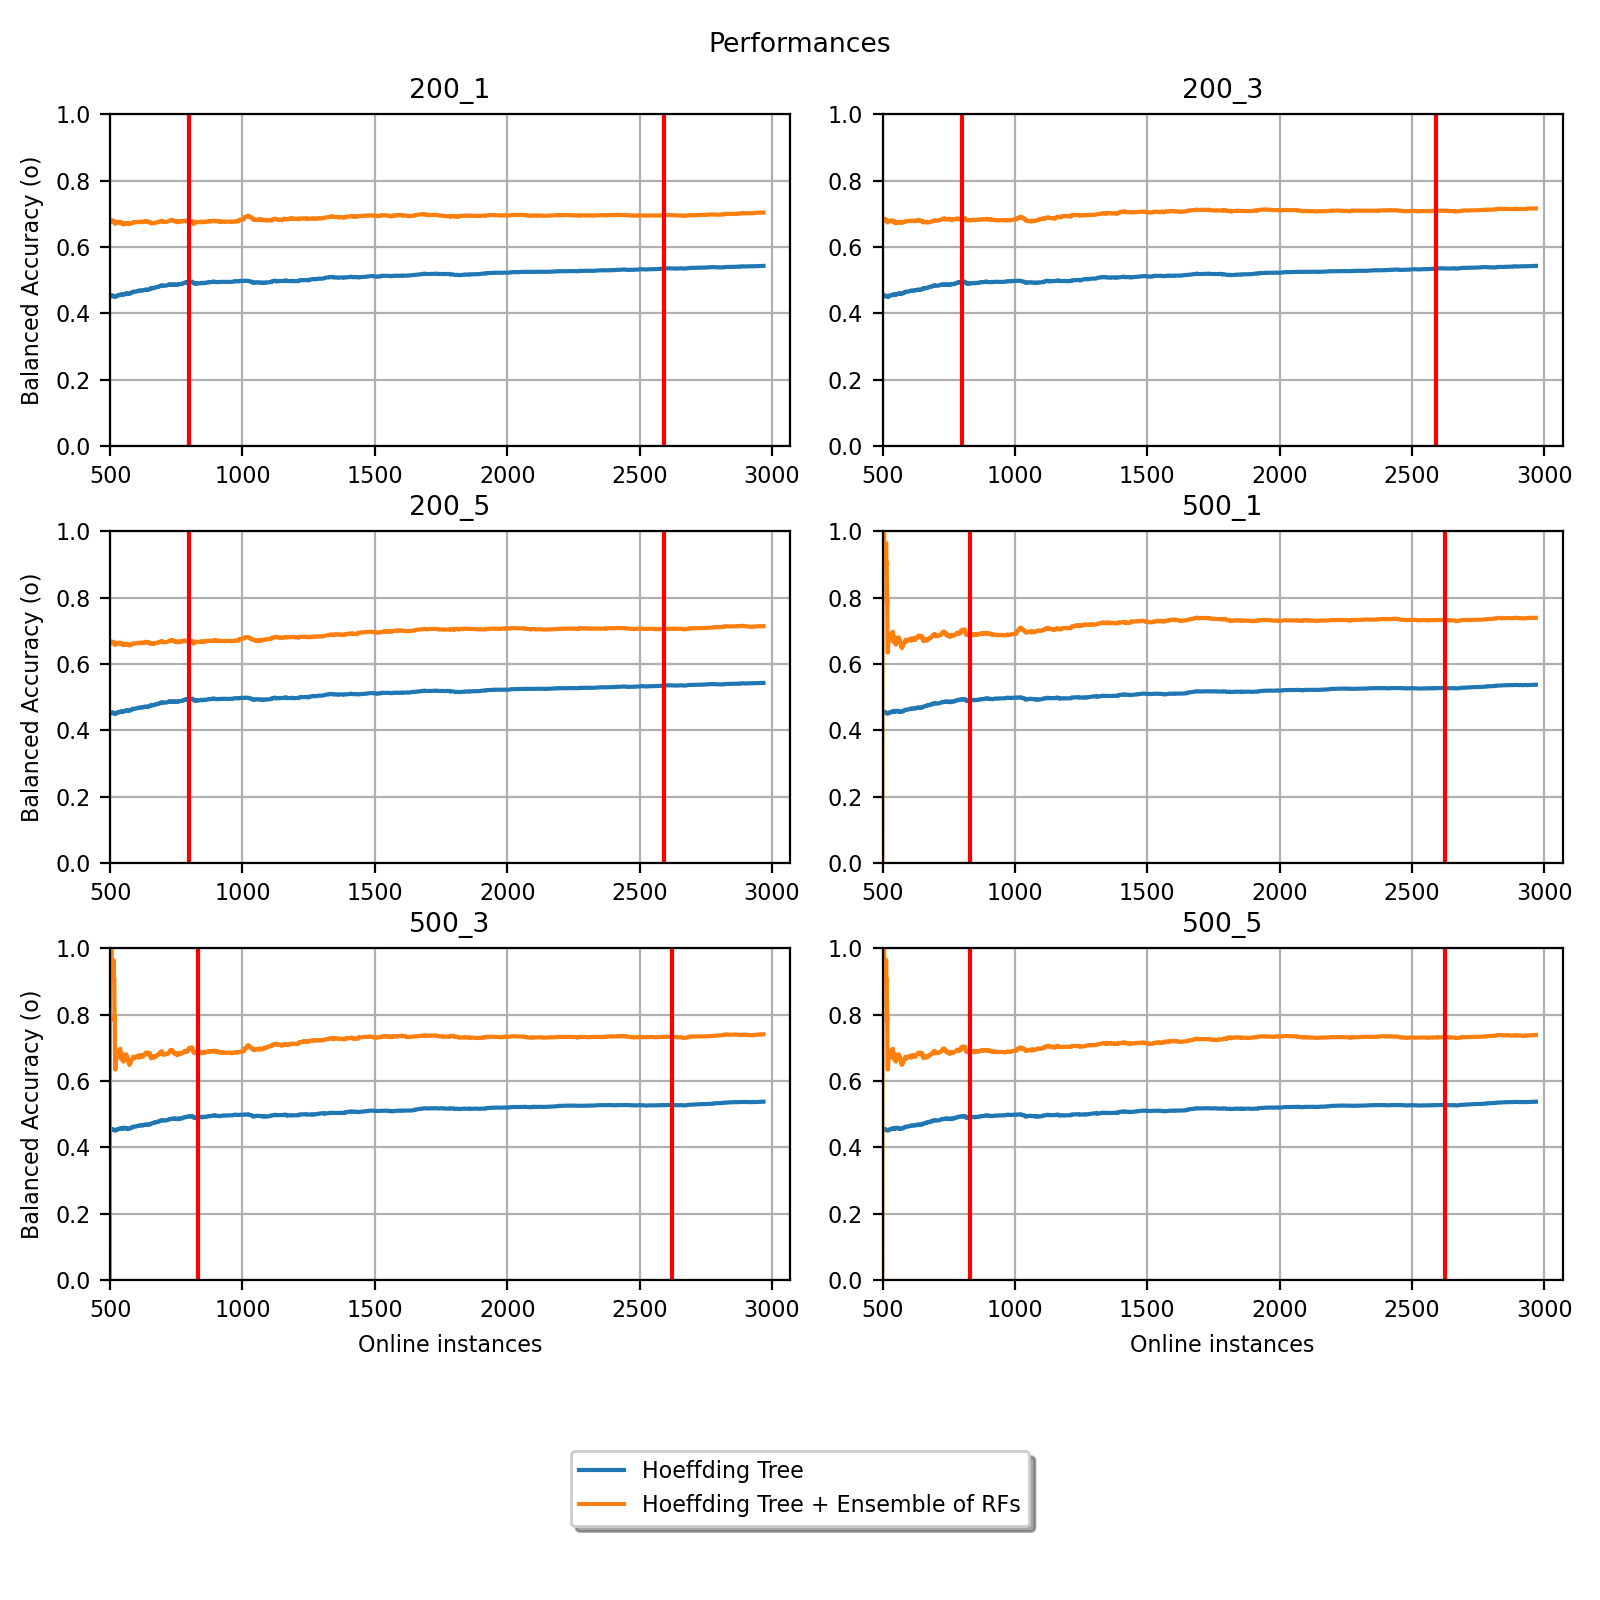

['200_1', '200_3', '200_5', '500_1', '500_3', '500_5']


In [171]:
plt.rcParams.update({'font.size': 8})
online_multiplot(res_mod_4)
plt.show()

In [185]:
def online_complot(r_list, keys, name_list, colors, **plt_kwargs):
    
    fig, axs = plt.subplots(3, 2, figsize=(8,9))
    axs = axs.flatten()
    fig.suptitle('Performances')
    #
    for i in range(len(keys)):
        for j in range(len(r_list)):
            r = r_list[j]
            y = r[keys[i]]['up_enmet']
            x = list(range(0, len(y)))
            axs[i].plot(x, y, label = name_list[j], color = colors[j], **plt_kwargs)
            y = r[keys[i]]['up_onmet']
            axs[i].plot(x, y, label = name_list[j] + '(NoEns)', linestyle="dotted", color = colors[j], **plt_kwargs)    
                
        axs[i].title.set_text(str(keys[i]))
        if i > 3:
            axs[i].set_xlabel('Online instances')
        axs[i].set_xlim([200, len(y)+100])
        if (i % 2) == 0:
            axs[i].set_ylabel('Balanced Accuracy')
        axs[i].set_ylim([0.1, 1])
        axs[i].grid()
        #axs[i].legend()
        
    fig.tight_layout()    
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.15),
               ncol=2, fancybox=True, shadow=True)
    fig.subplots_adjust(bottom=0.2)
    return(fig)

<IPython.core.display.Javascript object>


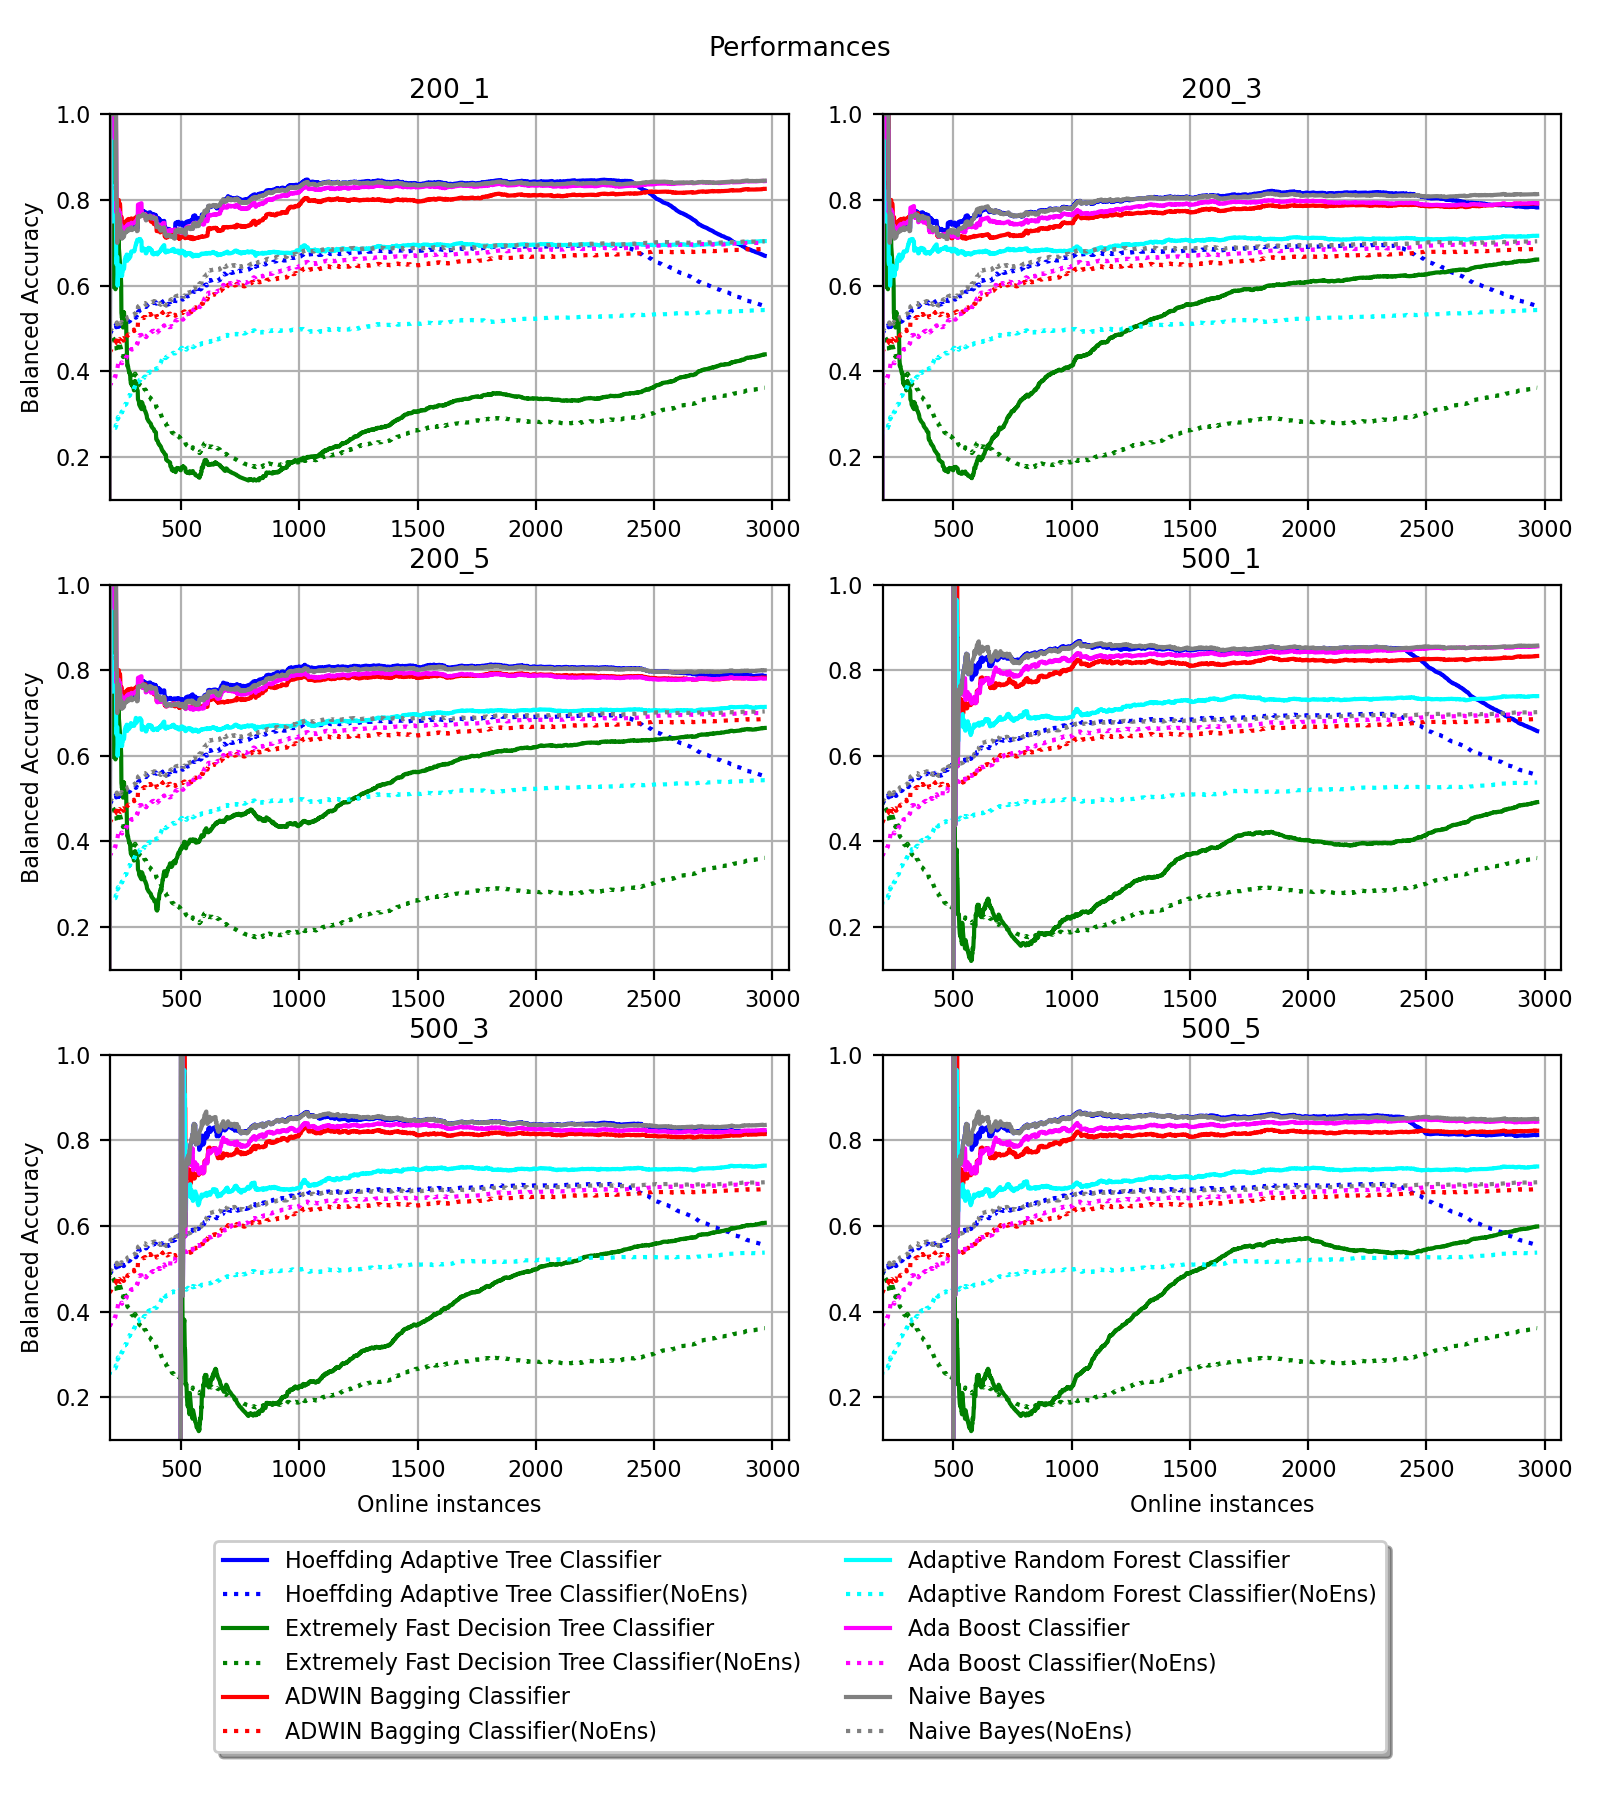

In [186]:
plt.rcParams.update({'font.size': 8})
online_complot([res_mod_1, res_mod_2, res_mod_3, res_mod_4, res_mod_5, res_mod_6], 
               ['200_1', '200_3', '200_5', '500_1', '500_3', '500_5'], 
               ['Hoeffding Adaptive Tree Classifier', 'Extremely Fast Decision Tree Classifier',
                'ADWIN Bagging Classifier', 'Adaptive Random Forest Classifier', 'Ada Boost Classifier','Naive Bayes'],
              colors = ['blue','green','red','cyan','magenta','grey'])
plt.show()
plt.savefig('comp_oas.pdf', bbox_inches='tight')

In [292]:
from itertools import chain
sel_feats = list(set(chain(*res_mod_1['500_3']['featsets'])))
print(len(sel_feats))

198


In [582]:
from collections import Counter
from itertools import chain

counter_obj = Counter(chain.from_iterable(res_mod_1['500_3']['featsets']))

print(counter_obj.most_common())

[('CDCA5', 5), ('BUB1', 5), ('KIFC1', 5), ('CCNA2', 5), ('KIF4A', 5), ('FOXA1', 5), ('CEP55', 5), ('MYBL2', 5), ('DEGS2', 5), ('AURKB', 5), ('MLPH', 5), ('PRR11', 5), ('THSD4', 5), ('MELK', 5), ('BIRC5', 5), ('GTSE1', 5), ('GATA3', 5), ('TPX2', 5), ('CENPA', 5), ('NDC80', 5), ('CCNE1', 5), ('MKI67', 5), ('HJURP', 5), ('FOXC1', 5), ('ESR1', 5), ('KIF2C', 5), ('PTTG1', 5), ('UBE2C', 5), ('FOXM1', 5), ('SOX10', 5), ('NCAPG', 5), ('ANLN', 5), ('TBC1D9', 5), ('MCM10', 5), ('CDCA3', 5), ('CDC20', 5), ('SHCBP1', 5), ('CDC45', 5), ('RRM2', 4), ('KIF18B', 4), ('SFRP1', 4), ('CDCA8', 4), ('KDM4B', 4), ('CCNB2', 4), ('PSAT1', 4), ('CCDC96', 4), ('CDC25A', 4), ('PLK1', 4), ('MAPT', 4), ('GABRP', 4), ('TROAP', 4), ('NCAPH', 4), ('CKAP2L', 4), ('SLC39A6', 4), ('TRIP13', 4), ('CA12', 4), ('CENPW', 4), ('RGMA', 4), ('DLGAP5', 4), ('VGLL1', 4), ('RAD51AP1', 3), ('RERG', 3), ('AFF3', 3), ('UBXN10', 3), ('FAM83D', 3), ('ARSG', 3), ('STAC', 3), ('SCUBE2', 3), ('PPP1R14C', 3), ('CPLX1', 3), ('TTK', 3), ('F

In [583]:
'AFF3' in sel_feats

True

In [1155]:
def online_plot(r, ax=None, **plt_kwargs):
    
    y1 = r['up_onmet']
    y2 = r['up_enmet']
    x1 = list(range(0, len(y1)))
    x2 = list(range(0, len(y2)))

    if ax is None:
        ax = plt.gca()
        
    ax.plot(x1, y1, label = "Hoeffding Tree", **plt_kwargs)
    ax.plot(x2, y2, label = "Hoeffding Tree + Ensemble of RFs", **plt_kwargs)    
    
    ax.set_ylabel('Balanced Accuracy (o)')
    ax.set_ylim([0, 1])
    
    ax.set_xlabel('Online instances')
    ax.set_xlim([500, len(y1)+100])
    
    for drift_detected in r['drifts']:
        ax.axvline(drift_detected, color='red')
        
    ax.grid()
    ax.legend()
    
    return(ax)

In [74]:
# utility fucntions for saving and loading operations
import pickle
import random

def load_data():
    try:
        with open("bin.dat") as f:
            x, y = pickle.load(f)
    except:
        x, y = [], []
    return x, y

def save_data(data):
    with open("bin.dat", "wb") as f:
        pickle.dump(data, f)

In [75]:
save_data(lres)

### Test biomarker models on the TCGA dataset

In [189]:
print(sk.__version__)

1.0.1


In [190]:
pam50sigP = list(set(pam50sig).union(sel_feats))
print(len(pam50sigP))

216


In [191]:
def borutaFS(X, y, rs = 0):
    
    # define random forest classifier, with utilising all cores and
    # sampling in proportion to y labels
    rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

    # define Boruta feature selection method
    feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=rs)

    # find all relevant features - 5 features should be selected
    feat_selector.fit(X, y)

    # check selected features - first 5 features are selected
    #feat_selector.support_

    return([feat_selector.transform(X), feat_selector.ranking_])

In [192]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

def rfSFS(X, y, rs = 0):
    rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, oob_score = True,
                                class_weight='balanced', max_depth=5, random_state=rs)
    sfs = SFS(rf, 
              k_features=50, 
              forward=True, 
              floating=False, 
              verbose=2,
              scoring='accuracy',
              cv=0)

    sfs = sfs.fit(X, y)
    return(sfs)

In [193]:
X_data[pam50sigP].shape

(2969, 216)

In [194]:
X_scdata_newbm = StandardScaler().fit_transform(X_data[pam50sigP])
X_sctcga_newbm = StandardScaler().fit_transform(X_tcga[pam50sigP])
feat_sel_res = rfSFS(X_scdata_newbm, pam50, rs = 0)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  1.2min finished

[2022-01-04 15:28:48] Features: 1/50 -- score: 0.6062647356012125[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 215 out of 215 | elapsed:  1.2min finished

[2022-01-04 15:30:02] Features: 2/50 -- score: 0.7197709666554395[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 214 out of 214 | elapsed:  1.2min finished

[2022-01-04 15:31:16] Features: 3/50 -- score: 0.7837655776355675[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:  1.2min finished

[2022-01-04 16:01:43] Features: 28/50 -- score: 0.8868305826877737[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed:  1.2min finished

[2022-01-04 16:02:54] Features: 29/50 -- score: 0.8868305826877737[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 187 out of 187 | elapsed:  1.2min finished

[2022-01-04 16:04:06] Features: 30/50 -- score: 0.886493768945773[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 186 out of 186 | elapsed:  1.2min finished

[2022-01-04 16:05:16] Features: 31/5

<IPython.core.display.Javascript object>


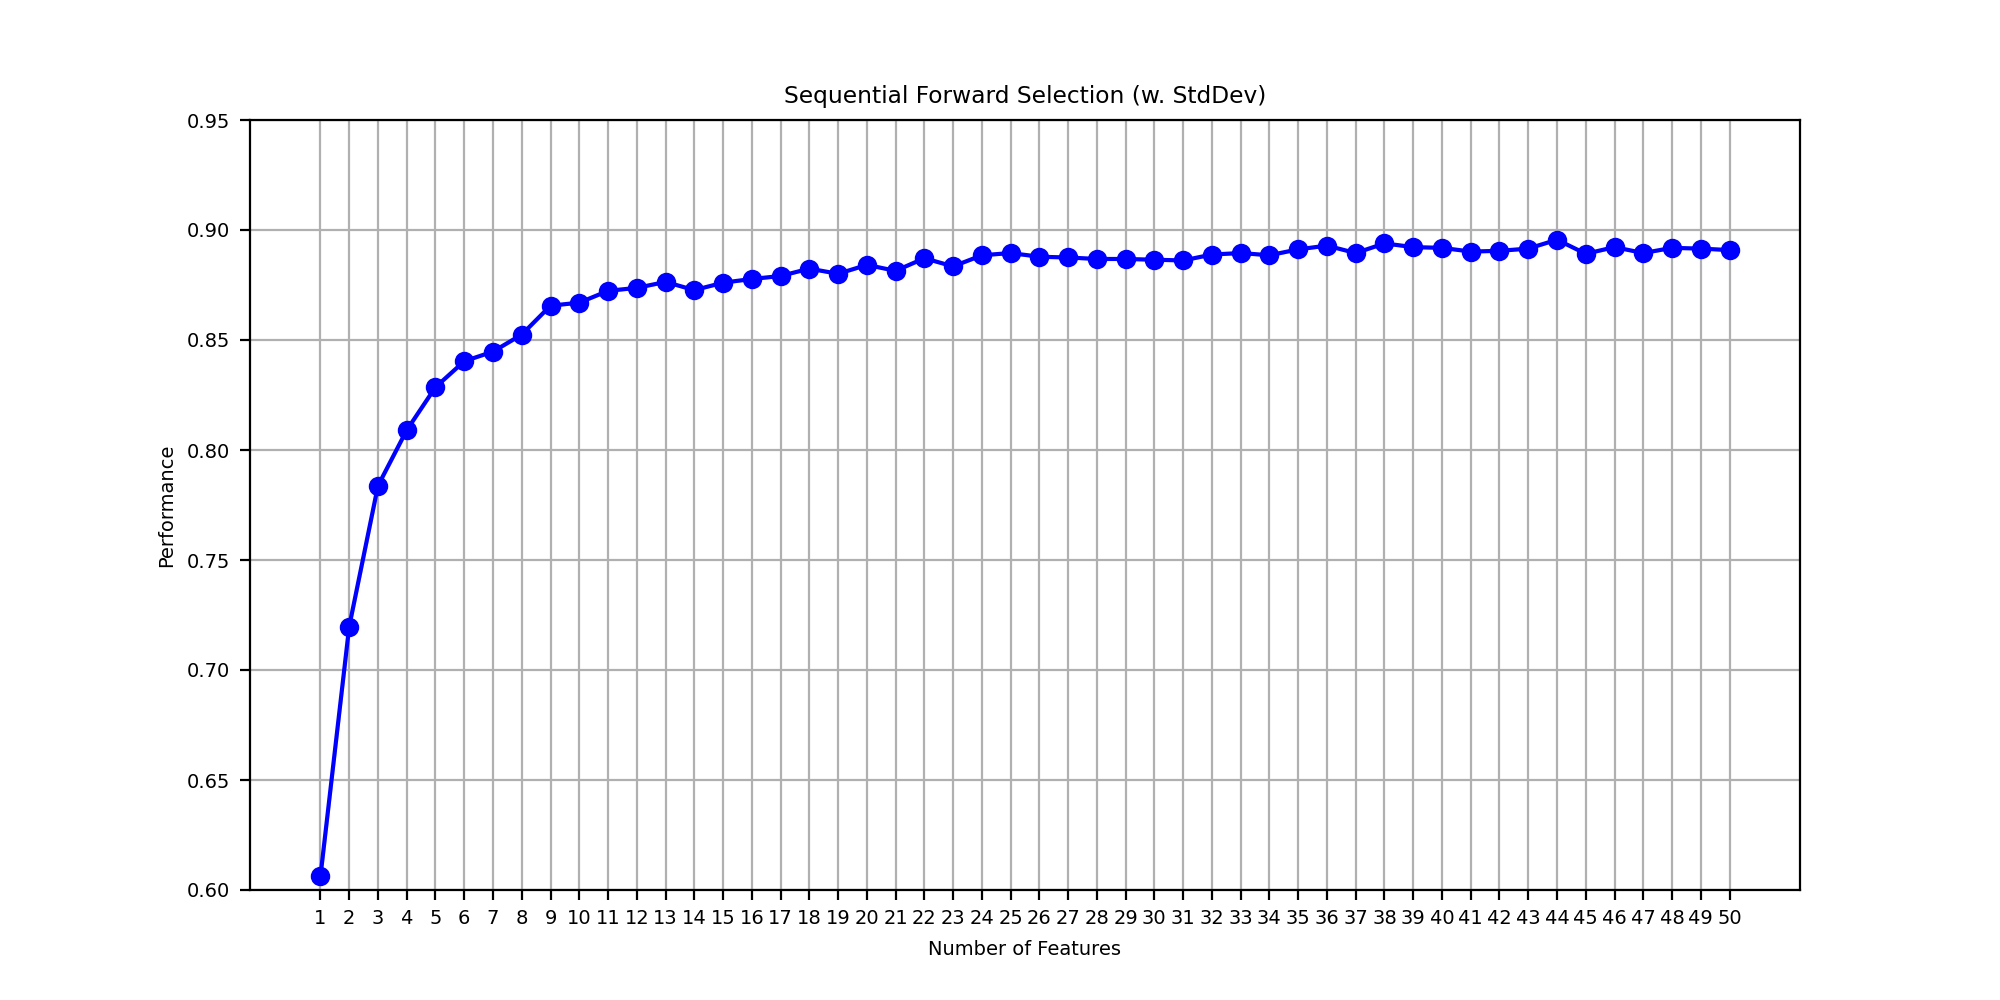

In [195]:
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plt.rcParams.update({'font.size': 7})
fig1 = plot_sfs(feat_sel_res.get_metric_dict(), kind='std_dev', figsize=(10,5))
plt.ylim([0.6, .95])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [214]:
print('best combination (ACC: %.3f): %s\n' % (feat_sel_res.k_score_, feat_sel_res.k_feature_idx_))
print(len(feat_sel_res.k_feature_idx_))

best combination (ACC: 0.891): (2, 4, 10, 11, 36, 37, 40, 42, 43, 46, 47, 52, 54, 56, 57, 59, 71, 72, 76, 77, 88, 92, 95, 112, 113, 115, 118, 125, 127, 129, 138, 139, 140, 142, 147, 151, 152, 153, 164, 167, 176, 186, 187, 190, 191, 192, 193, 197, 200, 209)

50


In [295]:
pam50sigS = [pam50sigP[f] for f in feat_sel_res.k_feature_idx_]
pam50sigS

['CDCA5',
 'MYB',
 'FAM47E',
 'TPX2',
 'DNAJC12',
 'CDT1',
 'CT62',
 'ROPN1B',
 'C20orf26',
 'PSAT1',
 'MMP11',
 'KRT6B',
 'EGFR',
 'FOXM1',
 'EXO1',
 'XBP1',
 'ESR1',
 'CDCA3',
 'KRT17',
 'FAM72B',
 'SLC39A6',
 'VGLL1',
 'RAD54L',
 'ZMYND10',
 'KDM4B',
 'TBC1D9',
 'CPEB2',
 'FGFR4',
 'AFF3',
 'PRR11',
 'RABEP1',
 'ERBB2',
 'FAM174A',
 'SCN4B',
 'FAM83D',
 'KRT14',
 'BIRC5',
 'GATA3',
 'NAT1',
 'NCAPG',
 'PGR',
 'TMEM45B',
 'SERPINA11',
 'MPP6',
 'CELSR1',
 'TTC8',
 'SPAG5',
 'ANXA9',
 'LRRC46',
 'CA12']

In [216]:
len(list(set.intersection(set(pam50sigS), set(pam50sig))))

13

In [92]:
endopred = ["BIRC5","RBBP8","UBE2C","IL6ST","AZGP1","DHCR7","MGP","STC2","CALM2","OAZ1","RPL37A"]

In [217]:
oncopedsig = ["MKI67","AURKA","BIRC5","CCNB1","MYBL2","MMP11","GRB7","ERBB2","ESR1","PGR","BCL2","SCUBE2","GSTM1","CD68","BAG1","ACTB","GAPDH","RPLP0","GUSB","TFRC"]

In [218]:
genM1 = ["KITLG","RAB11B","CAMP","CDC7","MAZ","TSPAN12","FKBP10","PHLDA1","STOM","FASN","TIE1","NKG7","SBNO2","HLA-G","NUMA1","INSIG1","PLSCR4","TAT","HNRNPU","SPON1","ARFRP1","STEAP4","GRB14","EPRS","ADCY2","EDN2","IL1R2","LAMP1","CDH5","MSX2","WHSC1","WARS","RNF19A","SRPR","HIST1H3B","FKBP5","CXCL13","NF2","RAC2","PSCA","DSC3","SNAP23","CUEDC1","CD72","DSG1","ADRM1","LDLR","POLD1","IKBKB","SOX30","PTGS2","MARK2"]

In [219]:
len(genM1)

52

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from boruta import BorutaPy

# Create classifiers
#lr = LogisticRegression(penalty = 'none', random_state=0)
#eln = LogisticRegression(penalty = 'elasticnet', random_state=0)
#gnb = GaussianNB()
rfc_pam50 = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
rfc_oncop = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
rfc_endop = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
rfc_genM1 = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
rfc_newbm = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
rfc_newbs = RandomForestClassifier(n_estimators=500, max_features= 4, random_state=0, class_weight = "balanced")
# prepare the training and tes sets
X_scdata_pam50 = StandardScaler().fit_transform(X_data[pam50sig])
X_sctcga_pam50 = StandardScaler().fit_transform(X_tcga[pam50sig])
X_scdata_oncop = StandardScaler().fit_transform(X_data[oncopedsig])
X_sctcga_oncop = StandardScaler().fit_transform(X_tcga[oncopedsig])
X_scdata_endop = StandardScaler().fit_transform(X_data[endopred])
X_sctcga_endop = StandardScaler().fit_transform(X_tcga[endopred])
X_scdata_genM1 = StandardScaler().fit_transform(X_data[genM1])
X_sctcga_genM1 = StandardScaler().fit_transform(X_tcga[genM1])
X_scdata_newbm = StandardScaler().fit_transform(X_data[pam50sigP])
X_sctcga_newbm = StandardScaler().fit_transform(X_tcga[pam50sigP])
X_scdata_newbs = StandardScaler().fit_transform(X_data[pam50sigS])
X_sctcga_newbs = StandardScaler().fit_transform(X_tcga[pam50sigS])
print(X_scdata_pam50.shape)
print(X_sctcga_pam50.shape)
print(X_scdata_oncop.shape)
print(X_sctcga_oncop.shape)
print(X_scdata_endop.shape)
print(X_sctcga_endop.shape)
print(X_scdata_genM1.shape)
print(X_sctcga_genM1.shape)
print(X_scdata_newbm.shape)
print(X_sctcga_newbm.shape)
print(X_scdata_newbs.shape)
print(X_sctcga_newbs.shape)
# training
rfc_pam50.fit(X_scdata_pam50, pam50)
rfc_oncop.fit(X_scdata_oncop, pam50)
rfc_endop.fit(X_scdata_endop, pam50)
rfc_genM1.fit(X_scdata_genM1, pam50)
rfc_newbm.fit(X_scdata_newbm, pam50)
rfc_newbs.fit(X_scdata_newbs, pam50)
# training accuracy
print(balanced_accuracy_score(pam50, rfc_pam50.predict(X_scdata_pam50)))
print(balanced_accuracy_score(pam50, rfc_oncop.predict(X_scdata_oncop)))
print(balanced_accuracy_score(pam50, rfc_endop.predict(X_scdata_endop)))
print(balanced_accuracy_score(pam50, rfc_genM1.predict(X_scdata_genM1)))
print(balanced_accuracy_score(pam50, rfc_newbm.predict(X_scdata_newbm)))
print(balanced_accuracy_score(pam50, rfc_newbs.predict(X_scdata_newbs)))

(2969, 47)
(1081, 47)
(2969, 20)
(1081, 20)
(2969, 11)
(1081, 11)
(2969, 52)
(1081, 52)
(2969, 216)
(1081, 216)
(2969, 50)
(1081, 50)
1.0
1.0
1.0
1.0
1.0
1.0


In [221]:
from sklearn.metrics import balanced_accuracy_score
# testing accuracies
print(balanced_accuracy_score(pam50t, rfc_pam50.predict(X_sctcga_pam50)))
print(balanced_accuracy_score(pam50t, rfc_oncop.predict(X_sctcga_oncop)))
print(balanced_accuracy_score(pam50t, rfc_endop.predict(X_sctcga_endop)))
print(balanced_accuracy_score(pam50t, rfc_genM1.predict(X_sctcga_genM1)))
print(balanced_accuracy_score(pam50t, rfc_newbm.predict(X_sctcga_newbm)))
print(balanced_accuracy_score(pam50t, rfc_newbs.predict(X_sctcga_newbs)))

0.8219145841321709
0.7015446459830285
0.445056349298968
0.5491238767650836
0.7877533217745027
0.8054549622393011


<IPython.core.display.Javascript object>


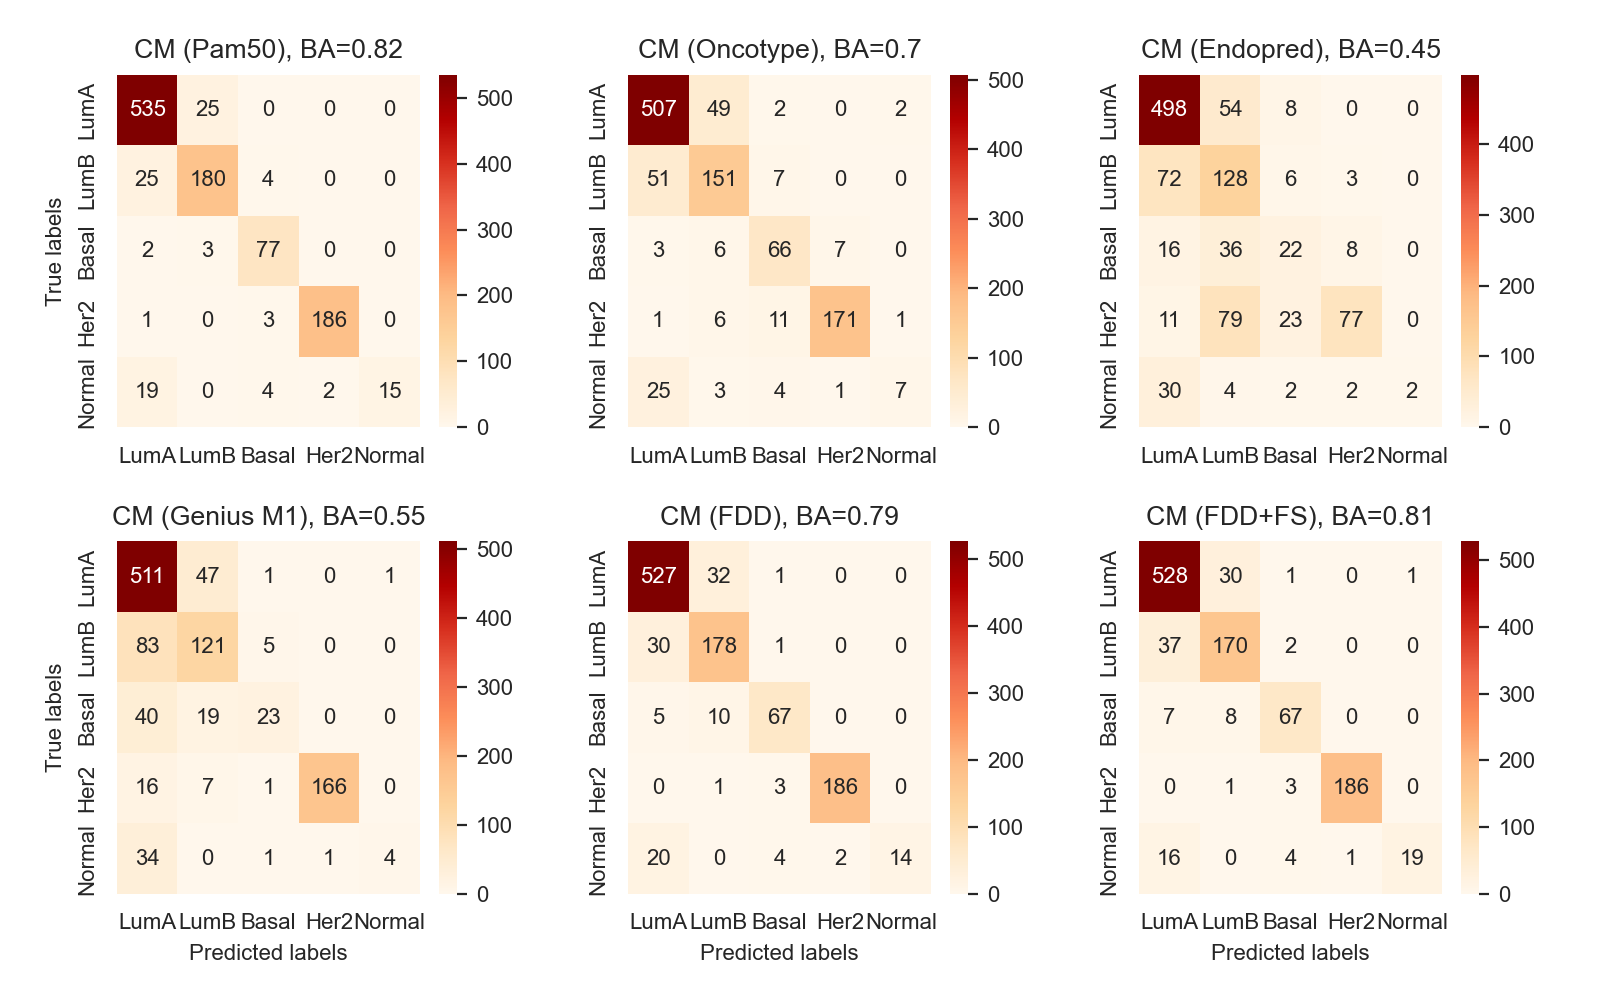

In [599]:
from sklearn import metrics

plt.rcParams.update({'font.size': 8})

# confusion matrices
cm_pam50 = metrics.confusion_matrix(pam50t, rfc_pam50.predict(X_sctcga_pam50))
cm_oncop = metrics.confusion_matrix(pam50t, rfc_oncop.predict(X_sctcga_oncop))
cm_endop = metrics.confusion_matrix(pam50t, rfc_endop.predict(X_sctcga_endop))
cm_genM1 = metrics.confusion_matrix(pam50t, rfc_genM1.predict(X_sctcga_genM1))
cm_BM = metrics.confusion_matrix(pam50t, rfc_newbm.predict(X_sctcga_newbm))
cm_BS = metrics.confusion_matrix(pam50t, rfc_newbs.predict(X_sctcga_newbs))
  
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8,5))

fig.tight_layout(pad=3)

sns.heatmap(cm_pam50, annot=True, fmt='g', ax=ax1, cmap="OrRd");  
sns.heatmap(cm_oncop, annot=True, fmt='g', ax=ax2, cmap="OrRd");
sns.heatmap(cm_endop, annot=True, fmt='g', ax=ax3, cmap="OrRd");  
sns.heatmap(cm_genM1, annot=True, fmt='g', ax=ax4, cmap="OrRd");
sns.heatmap(cm_BM, annot=True, fmt='g', ax=ax5, cmap="OrRd");  
sns.heatmap(cm_BS, annot=True, fmt='g', ax=ax6, cmap="OrRd");

#annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax1.set_xlabel(''); ax1.set_ylabel('True labels'); 
ax1.set_title('CM (Pam50), BA=' + str(round(balanced_accuracy_score(pam50t, rfc_pam50.predict(X_sctcga_pam50)),2)));
ax1.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']); 
ax1.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']); 
ax2.set_xlabel(''); ax2.set_ylabel(''); 
ax2.set_title('CM (Oncotype), BA=' + str(round(balanced_accuracy_score(pam50t, rfc_oncop.predict(X_sctcga_oncop)),2))); 
ax2.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']);
ax2.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']); 
ax3.set_xlabel(''); ax3.set_ylabel(''); 
ax3.set_title('CM (Endopred), BA=' + str(round(balanced_accuracy_score(pam50t, rfc_endop.predict(X_sctcga_endop)),2))); 
ax3.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']);
ax3.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']); 
ax4.set_xlabel('Predicted labels'); ax4.set_ylabel('True labels'); 
ax4.set_title('CM (Genius M1), BA=' + str(round(balanced_accuracy_score(pam50t, rfc_genM1.predict(X_sctcga_genM1)),2))); 
ax4.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']);
ax4.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']); 
ax5.set_xlabel('Predicted labels'); ax5.set_ylabel(''); 
ax5.set_title('CM (FDD), BA=' + str(round(balanced_accuracy_score(pam50t, rfc_newbm.predict(X_sctcga_newbm)),2))); 
ax5.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']);
ax5.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']); 
ax6.set_xlabel('Predicted labels'); ax6.set_ylabel(''); 
ax6.set_title('CM (FDD+FS), BA=' + str(round(balanced_accuracy_score(pam50t, rfc_newbs.predict(X_sctcga_newbs)),2))); 
ax6.xaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']);
ax6.yaxis.set_ticklabels(['LumA', 'LumB', 'Basal', 'Her2', 'Normal']); 
#
plt.savefig('comp_biom.pdf', bbox_inches='tight')

### Assess clinical relevance of selected biomarkers

In [226]:
TIME_STR = 'time'
EVENT_STR = 'event'

In [227]:
import pandas as pd

def merge_x_y(x, y):
    if len(x) != len(y):
        raise ValueError("x and y have different lengths\n" + str(x) + "\n" + str(y))
    res = pd.concat([x.reset_index(drop=True), y.loc[:, [EVENT_STR, TIME_STR]].reset_index(drop=True)], axis=1)
    return res

In [228]:
from abc import abstractmethod, ABC
from lifelines import CoxPHFitter
from sksurv.linear_model import CoxPHSurvivalAnalysis

class CoxPredictor(ABC):

    @abstractmethod
    def score(self, x_test, y_test) -> float:
        raise NotImplementedError()

    @abstractmethod
    def p_vals(self):
        raise NotImplementedError()

    @abstractmethod
    def params(self):
        raise NotImplementedError()


class CoxModel(ABC):

    @abstractmethod
    def fit_estimator(self, x_train, y_train, alpha: float = 0.05) -> CoxPredictor:
        raise NotImplementedError()


class SKSurvCoxPredictor(CoxPredictor):

    __estimator: CoxPHSurvivalAnalysis

    def __init__(self, estimator: CoxPHSurvivalAnalysis):
        self.__estimator = estimator

    def score(self, x_test, y_test) -> float:
        return self.__estimator.score(x_test, y_test)

    def p_vals(self):
        raise NotImplementedError()

    def params(self):
        raise NotImplementedError()


class SKSurvCoxModel(CoxModel):

    def fit_estimator(self, x_train, y_train, alpha: float = 0.05) -> CoxPredictor:
        estimator = CoxPHSurvivalAnalysis(alpha=alpha).fit(x_train, y_train)
        return SKSurvCoxPredictor(estimator)


class LifelinesCoxPredictor(CoxPredictor):
    __estimator: CoxPHFitter

    def __init__(self, estimator: CoxPHFitter):
        self.__estimator = estimator

    @staticmethod
    def merge_x_y(x, y):
        return merge_x_y(x=x, y=y)

    def score(self, x_test, y_test) -> float:
        df = self.merge_x_y(x=x_test, y=y_test)
        return self.__estimator.score(df, scoring_method="concordance_index")

    def p_vals(self):
        summary = self.__estimator.summary
        return summary['p']

    def params(self):
        return self.__estimator.params_
    
    def inner_estimator(self) -> CoxPHFitter:
        return self.__estimator
    
    def hazard_ratios(self):
        #s = self.__estimator.hazard_ratios_
        return self.__estimator.summary
        #return list(zip(s.index, s))

class LifelinesCoxModel(CoxModel):

    def fit_estimator(self, x_train, y_train, alpha: float = 0.05) -> CoxPredictor:
        df = LifelinesCoxPredictor.merge_x_y(x=x_train, y=y_train)
        if df.isnull().values.any():
            print("Nulls detected in the dataframe")
            print(df.isnull())
        estimator = CoxPHFitter(penalizer=alpha, l1_ratio=0).fit(df=df, duration_col='time', event_col='event')
        #print(estimator.print_summary())
        return LifelinesCoxPredictor(estimator)

In [390]:
from statistics import mean
import sklearn

def create_folds(x, y, n_folds: int = 10, seed=4985):
    skf = sklearn.model_selection.StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
    res = []
    y_event = y[[EVENT_STR]]
    for train_index, test_index in skf.split(X=x, y=y_event):
        res.append([train_index, test_index])
    return res

def train_test_one_fold(x_train, y_train, x_test, y_test, model: CoxModel, alpha=0):
    predictor = model.fit_estimator(x_train=x_train, y_train=y_train, alpha=alpha)
    score = predictor.score(x_test=x_test, y_test=y_test)
    return score

def cross_validate(x, y, model: CoxModel, n_folds: int = 10, alpha=0, seed=78245):
    folds = create_folds(x, y, n_folds=n_folds, seed=seed)
    scores = []
    for train_index, test_index in folds:
        x_train = x.iloc[train_index]
        x_test = x.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]
        fold_score = train_test_one_fold(x_train, y_train, x_test, y_test, model=model, alpha=alpha)
        scores.append(fold_score)
    return mean(scores)

In [230]:
def cox_analysis(x, y, cov = None, model: CoxModel = LifelinesCoxModel(), alpha=0.05, typeres = 'tab'):
    if typeres == 'tab':
        res = pd.DataFrame(columns=['feature', 'score', 'coef','exp(coef)',
                                    'l95exp(coef)','u95exp(coef)','z','p','-log2(p)'])
    elif typeres == 'raw':
        res = list()
    pos = 0
    for feat_name in x:
        if cov is not None:
            #feat_df = pd.concat(objs=[cov, x[[feat_name]]], axis=1)
            feat_df = pd.concat((cov, x[[feat_name]]), axis = 1)
        else:
            feat_df = x[[feat_name]]
        feat_predictor = model.fit_estimator(x_train=feat_df, y_train=y, alpha=alpha)
        #print(feat_predictor.inner_estimator().print_summary())
        if typeres == 'tab':
            params = feat_predictor.hazard_ratios()
            params = params.values[0]
            params = list(params[[0,1,5,6,7,8,9]])
            score = feat_predictor.score(x_test=feat_df, y_test=y)
            #p_val = feat_predictor.p_vals()[0]
            #coefficient = feat_predictor.params()[feat_name]
            #res.loc[pos] = [feat_name, score, p_val, coefficient] + params
            res.loc[pos] = [feat_name, score] + params
        elif typeres == 'raw':
            res.append(feat_predictor.inner_estimator())
        pos += 1
    if typeres == 'tab':
        res.sort_values(by=['p'], inplace=True, ignore_index=True)
    else:
        dd = dict()
        for r in range(len(res)):
            dd[x.columns[r]] = res[r]
        res = dd
    return res

In [564]:
import statistics

def risk_score(coefs: dict, sample: dict) -> float:
    res = 0.0
    for key in coefs:
        if key in sample:
            res += coefs[key]*sample[key]  # TODO Can benefit from stable sum
    return res

def risk_scores(coefs: dict, x) -> [float]:
    x_dict = x.to_dict(orient='records')
    res = [risk_score(coefs=coefs, sample=i) for i in x_dict]
    return res

def prognostic_scores(x, y, cov = None, model: CoxModel = LifelinesCoxModel(), alpha=0.05, p_val=0.05, score = 0.5):
    """Scores of features with at least the passed p-val."""
    uni_res = cox_analysis(x=x, y=y, cov = cov, model=model, alpha=alpha)
    uni_res = uni_res[uni_res['score'] > score]
    uni_res_list = [(f, s, p) for f, s, p in zip(uni_res['feature'], uni_res['score'], uni_res['p'])]
    res = {}
    for r in uni_res_list:
        if r[2] < p_val:
            res[r[0]] = r[1]
    return res

def prognostic_coefficients(x, y, cov = None, model: CoxModel = LifelinesCoxModel(), alpha=0.05, p_val=0.05, coef = 0.5):
    """Coefficients of features with at least the passed p-val."""
    uni_res = cox_analysis(x=x, y=y, cov = cov, model=model, alpha=alpha)
    #uni_res = uni_res[abs(uni_res['coef']) > coef]
    uni_res_list = [(f, c, p) for f, c, p in zip(uni_res['feature'], uni_res['coef'], uni_res['p'])]
    res = {}
    for r in uni_res_list:
        if r[2] < p_val and abs(r[1]) > coef:
            res[r[0]] = r[1]
    print(len(res))
    return res

class RSPrognosticClassifier:
    __coeffs: dict
    __cutoff: float

    def __init__(self, coeffs: dict, cutoff: float):
        self.__coeffs = coeffs
        self.__cutoff = cutoff

    def predict(self, x) -> [int]:
        scores = risk_scores(self.__coeffs, x=x)
        res = [s <= self.__cutoff for s in scores]
        return res
    
    def predict_score(self, x) -> [int]: 
        return risk_scores(self.__coeffs, x=x)

class RSPrognosticFitter:

    def fit(self, x_train, y_train, cov = None, alpha=0.05, p_val=0.05, coef = 0.5) -> RSPrognosticClassifier:
        coeffs = prognostic_coefficients(x=x_train, y=y_train, cov = cov, alpha=alpha, p_val=p_val, coef = coef)
        scores = risk_scores(coeffs, x_train)
        cutoff = statistics.median(scores)
        return RSPrognosticClassifier(coeffs=coeffs, cutoff=cutoff)

In [565]:
class RiskScoreCoxPredictor(CoxPredictor):

    __rs_prognostic_classifier: RSPrognosticClassifier
    __lifelines_predictor: LifelinesCoxPredictor

    def __init__(self, rs_prognostic_classifier: RSPrognosticClassifier, lifelines_predictor: LifelinesCoxPredictor):
        self.__rs_prognostic_classifier = rs_prognostic_classifier
        self.__lifelines_predictor = lifelines_predictor

    def score(self, x_test, y_test) -> float:
        rs_classes = self.__rs_prognostic_classifier.predict(x=x_test)
        df_classes = pd.DataFrame()
        df_classes["risk_group"] = rs_classes
        return self.__lifelines_predictor.score(x_test=df_classes, y_test=y_test)

    def p_vals(self):
        return self.__lifelines_predictor.p_vals()

    def params(self):
        return self.__lifelines_predictor.params()


class RiskScoreCoxModel(CoxModel):
    __p_val: float

    def __init__(self, p_val=0.05):
        self.__p_val = p_val

    def fit_estimator(self, x_train, y_train, cov = None, alpha: float = 0.05) -> CoxPredictor:
        coeffs = prognostic_coefficients(x=x_train, y=y_train, cov = cov, alpha=alpha, p_val=self.__p_val)
        scores = risk_scores(coeffs, x_train)
        cutoff = statistics.median(scores)
        rs_prognostic_classifier = RSPrognosticClassifier(coeffs=coeffs, cutoff=cutoff)
        rs_classes = rs_prognostic_classifier.predict(x=x_train)
        df_classes = pd.DataFrame()
        df_classes["risk_group"] = rs_classes
        lifelines_predictor = LifelinesCoxModel().fit_estimator(x_train=df_classes, y_train=y_train, alpha=alpha)
        return RiskScoreCoxPredictor(
            rs_prognostic_classifier=rs_prognostic_classifier, lifelines_predictor=lifelines_predictor)

In [233]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

MODEL = LifelinesCoxModel()
Y_AS_DF = True  # Otherwise it is a numpy array of tuples.

# The following list allows to run this part without rerunning the online learning.
saved_feats_from_online = pam50sigP

USE_SAVED_FEATURES = True
if USE_SAVED_FEATURES:
    feats_from_online = saved_feats_from_online
else:
    feats_from_online = all_feats

#print("Reading data from csv.")
#data = pd.read_csv('sw_breast_gdat_2.csv')
#data = data.drop('Unnamed: 0', axis=1, errors='ignore')

#pheno = pd.read_csv('sw_breast_pheno.csv')
#pheno = pheno.drop('Unnamed: 0', axis=1, errors='ignore')

#pam50 = data['pam50']
#data = data.drop('pam50', axis=1, errors='ignore')

#print("all_feats: " + str(all_feats))

In [234]:
all_feats = list(set.union(set(pam50sig),set(pam50sigP)))
# Swedish cohort
X_bioma_all = X_data.loc[:,list(set.union(set(pam50sigP), set(pam50sig)))]
X_bioma_fdd = X_data.loc[:,pam50sigS]
X_bioma_pam = X_data.loc[:,pam50sig]
print(X_bioma_all.shape)
print(X_bioma_fdd.shape)
print(X_bioma_pam.shape)
# TCGA cohort
X_bioma_tcga_all = X_tcga.loc[:,list(set.union(set(pam50sigP), set(pam50sig)))]
X_bioma_tcga_fdd = X_tcga.loc[:,pam50sigS]
X_bioma_tcga_pam = X_tcga.loc[:,pam50sig]
print(X_bioma_tcga_all.shape)
print(X_bioma_tcga_fdd.shape)
print(X_bioma_tcga_pam.shape)

(2969, 216)
(2969, 50)
(2969, 47)
(1081, 216)
(1081, 50)
(1081, 47)


In [239]:
# scaling
# X_sc_bioma_pam = StandardScaler().fit_transform(X_bioma_pam)
scaled_features = StandardScaler().fit_transform(X_bioma_pam.values)
X_sc_bioma_pam = pd.DataFrame(scaled_features, index=X_bioma_fdd.index, columns=X_bioma_pam.columns)
print(type(X_sc_bioma_pam))
print(X_sc_bioma_pam.shape)
#
scaled_features = StandardScaler().fit_transform(X_bioma_fdd.values)
X_sc_bioma_fdd = pd.DataFrame(scaled_features, index=X_bioma_fdd.index, columns=X_bioma_fdd.columns)
print(type(X_sc_bioma_fdd))
print(X_sc_bioma_fdd.shape)
#
scaled_features = StandardScaler().fit_transform(X_bioma_all.values)
X_sc_bioma_all = pd.DataFrame(scaled_features, index=X_bioma_all.index, columns=X_bioma_all.columns)
print(type(X_sc_bioma_all))
print(X_sc_bioma_all.shape)
# 
scaled_features = StandardScaler().fit_transform(X_bioma_tcga_pam.values)
X_sc_bioma_tcga_pam = pd.DataFrame(scaled_features, index=X_bioma_tcga_fdd.index, columns=X_bioma_tcga_pam.columns)
print(type(X_sc_bioma_tcga_pam))
print(X_sc_bioma_tcga_pam.shape)
#
scaled_features = StandardScaler().fit_transform(X_bioma_tcga_fdd.values)
X_sc_bioma_tcga_fdd = pd.DataFrame(scaled_features, index=X_bioma_tcga_fdd.index, columns=X_bioma_tcga_fdd.columns)
print(type(X_sc_bioma_tcga_fdd))
print(X_sc_bioma_tcga_fdd.shape)
#
scaled_features = StandardScaler().fit_transform(X_bioma_tcga_all.values)
X_sc_bioma_tcga_all = pd.DataFrame(scaled_features, index=X_bioma_tcga_all.index, columns=X_bioma_tcga_all.columns)
print(type(X_sc_bioma_tcga_all))
print(X_sc_bioma_tcga_all.shape)

<class 'pandas.core.frame.DataFrame'>
(2969, 47)
<class 'pandas.core.frame.DataFrame'>
(2969, 50)
<class 'pandas.core.frame.DataFrame'>
(2969, 216)
<class 'pandas.core.frame.DataFrame'>
(1081, 47)
<class 'pandas.core.frame.DataFrame'>
(1081, 50)
<class 'pandas.core.frame.DataFrame'>
(1081, 216)


In [240]:
swpheno.head()

Sample_geo_accession          Sample_status Sample_submission_date  \
0           GSM2528079  Public on Mar 12 2018            Mar 09 2017   
1           GSM2528080  Public on Mar 12 2018            Mar 09 2017   
2           GSM2528081  Public on Mar 12 2018            Mar 09 2017   
3           GSM2528082  Public on Mar 12 2018            Mar 09 2017   
4           GSM2528083  Public on Mar 12 2018            Mar 09 2017   

  Sample_last_update_date Sample_type  Sample_channel_count  \
0             Mar 12 2018         SRA                     1   
1             Mar 12 2018         SRA                     1   
2             Mar 12 2018         SRA                     1   
3             Mar 12 2018         SRA                     1   
4             Mar 12 2018         SRA                     1   

  Sample_source_name_ch1 Sample_organism_ch1  Age  NodeSize  ...  \
0   Primary breast tumor        Homo sapiens   43       9.0  ...   
1   Primary breast tumor        Homo sapiens   48      14.0  ...   
2   Primary breast tumor        Homo sapiens   69      27.0  ...   
3   Primary breast tumor        Homo sapiens   39      51.0  ...   
4   Primary breast tumor        Homo sapiens   73      60.0  ...   

                 nhg_pmgc               er_psgc               pgr_psgc  \
0  nhg prediction mgc: G3  er prediction sgc: 0  pgr prediction sgc: 0   
1  nhg prediction mgc: G2  er prediction sgc: 1  pgr prediction sgc: 1   
2  nhg prediction mgc: G3  er prediction sgc: 1  pgr prediction sgc: 1   
3  nhg prediction mgc: G3  er prediction sgc: 1  pgr prediction sgc: 1   
4  nhg prediction mgc: G2  er prediction sgc: 1  pgr prediction sgc: 1   

                her2_psgc               ki67_psgc  Pam50 SurvDays OverallSurv  \
0  her2 prediction sgc: 0  ki67 prediction sgc: 1      3     2367           0   
1  her2 prediction sgc: 0  ki67 prediction sgc: 0      0     2367           0   
2  her2 prediction sgc: 0  ki67 prediction sgc: 1      1     2168           1   
3  her2 prediction sgc: 1  ki67 prediction sgc: 1      0     2416           0   
4  her2 prediction sgc: 0  ki67 prediction sgc: 0      4     2389           0   

  Endocrine_treat chemo  
0             0.0   1.0  
1             1.0   1.0  
2             1.0   1.0  
3             1.0   1.0  
4             1.0   0.0  

[5 rows x 31 columns]

In [378]:
tcgaplus.head()

patient  PFI.1  PFI.time.1  PFI.2  PFI.time.2  PFS  PFS.time  DSS_cr  \
0  TCGA-3C-AAAU      1      1808.0    1.0      1808.0    1    1808.0     0.0   
1  TCGA-3C-AALI      0      4005.0    0.0      4005.0    0    4005.0     0.0   
2  TCGA-3C-AALJ      0      1474.0    0.0      1474.0    0    1474.0     0.0   
3  TCGA-3C-AALK      0      1448.0    0.0      1448.0    0    1448.0     0.0   
4  TCGA-4H-AAAK      0       348.0    0.0       348.0    0     348.0     0.0   

   DSS.time.cr  DFI.cr  DFI.time.cr  PFI.cr  PFI.time.cr  PFI.1.cr  \
0       4047.0     1.0       1808.0       1       1808.0         1   
1       4005.0     0.0       4005.0       0       4005.0         0   
2       1474.0     0.0       1474.0       0       1474.0         0   
3       1448.0     NaN          NaN       0       1448.0         0   
4        348.0     0.0        348.0       0        348.0         0   

   PFI.time.1.cr  PFI.2.cr  PFI.time.2.cr  
0         1808.0       1.0         1808.0  
1         4005.0       0.0         4005.0  
2         1474.0       0.0         1474.0  
3         1448.0       0.0         1448.0  
4          348.0       0.0          348.0

In [242]:
# define survival data for the tcga dataset
y_cox_tcga = pd.DataFrame({EVENT_STR: tcgap['OverallSurv'],
                          TIME_STR: pd.to_numeric(tcgap[['days_to_death','days_to_last_followup']].max(axis=1), downcast="integer")}, 
                          index = tcgap.index)
y_cox_tcga.head()

event  time
0      0  4047
1      0  4005
2      0  1474
3      0  1448
4      0   348

In [361]:
np.max(y_cox_tcga['time'])

8605

In [348]:
type(tcgaplus['PFS.time'])

pandas.core.series.Series

In [380]:
tcgaplus['PFS.time'] = tcgaplus['PFS.time'].fillna(0)
y_cox_tcga_pfs = pd.DataFrame({EVENT_STR: tcgaplus['PFS'], 
                               TIME_STR: tcgaplus['PFS.time'].astype(int)}, 
                               index = tcgaplus.index)
print(y_cox_tcga_pfs.head())
#
tcgaplus['DSS.time.cr'] = tcgaplus['DSS.time.cr'].fillna(0)
tcgaplus['DSS_cr'] = tcgaplus['DSS_cr'].fillna(0)
y_cox_tcga_pfs = pd.DataFrame({EVENT_STR: tcgaplus['DSS_cr'].astype(int), 
                               TIME_STR: tcgaplus['DSS.time.cr'].astype(int)}, 
                               index = tcgaplus.index)
print(y_cox_tcga_pfs.head())

   event  time
0      1  1808
1      0  4005
2      0  1474
3      0  1448
4      0   348
   event  time
0      0  4047
1      0  4005
2      0  1474
3      0  1448
4      0   348


In [243]:
#sns.boxplot(data = X_sc_bioma_pam)

In [539]:
if Y_AS_DF:
    y_cox = swpheno[['OverallSurv', 'SurvDays']]
    y_cox.columns = [EVENT_STR, TIME_STR]
else:
    y_cox = []
    for index, row in swpheno.iterrows():
        y_cox.append((row['OverallSurv'], row['SurvDays']))
    y_cox = np.array(y_cox, dtype=[(EVENT_STR, bool), (TIME_STR, int)])

uni_res = cox_analysis(x=X_sc_bioma_fdd, y=y_cox, model=MODEL, typeres = 'tab')
print("UNIVARIATE ANALYSIS")
print("Cox regressions with just one feature. The score is the c-statistic.")
# selecting rows based on condition
uni_res = uni_res[uni_res['score'] > 0.55]

UNIVARIATE ANALYSIS
Cox regressions with just one feature. The score is the c-statistic.


In [540]:
print(uni_res.to_string())

      feature     score      coef  exp(coef)  l95exp(coef)  u95exp(coef)         z             p   -log2(p)
0        NAT1  0.626832 -0.286960   0.750542      0.684979      0.822380 -6.153064  7.599990e-10  30.293283
1       GATA3  0.594232 -0.248507   0.779964      0.718599      0.846570 -5.943836  2.784284e-09  28.420046
2        XBP1  0.606061 -0.258483   0.772222      0.709010      0.841069 -5.932163  2.989695e-09  28.317355
3        CT62  0.611631 -0.261647   0.769783      0.704101      0.841592 -5.749922  8.928488e-09  26.738937
4        AFF3  0.615871 -0.251232   0.777842      0.713782      0.847651 -5.729256  1.008720e-08  26.562898
5        EXO1  0.614767  0.261272   1.298581      1.185786      1.422104  5.635606  1.744440e-08  25.772661
6      TBC1D9  0.592946 -0.239725   0.786844      0.721101      0.858581 -5.385062  7.241977e-08  23.719041
7        CDT1  0.609487  0.245732   1.278557      1.168876      1.398529  5.369955  7.875612e-08  23.598033
8      FAM83D  0.604309  0.2

<IPython.core.display.Javascript object>


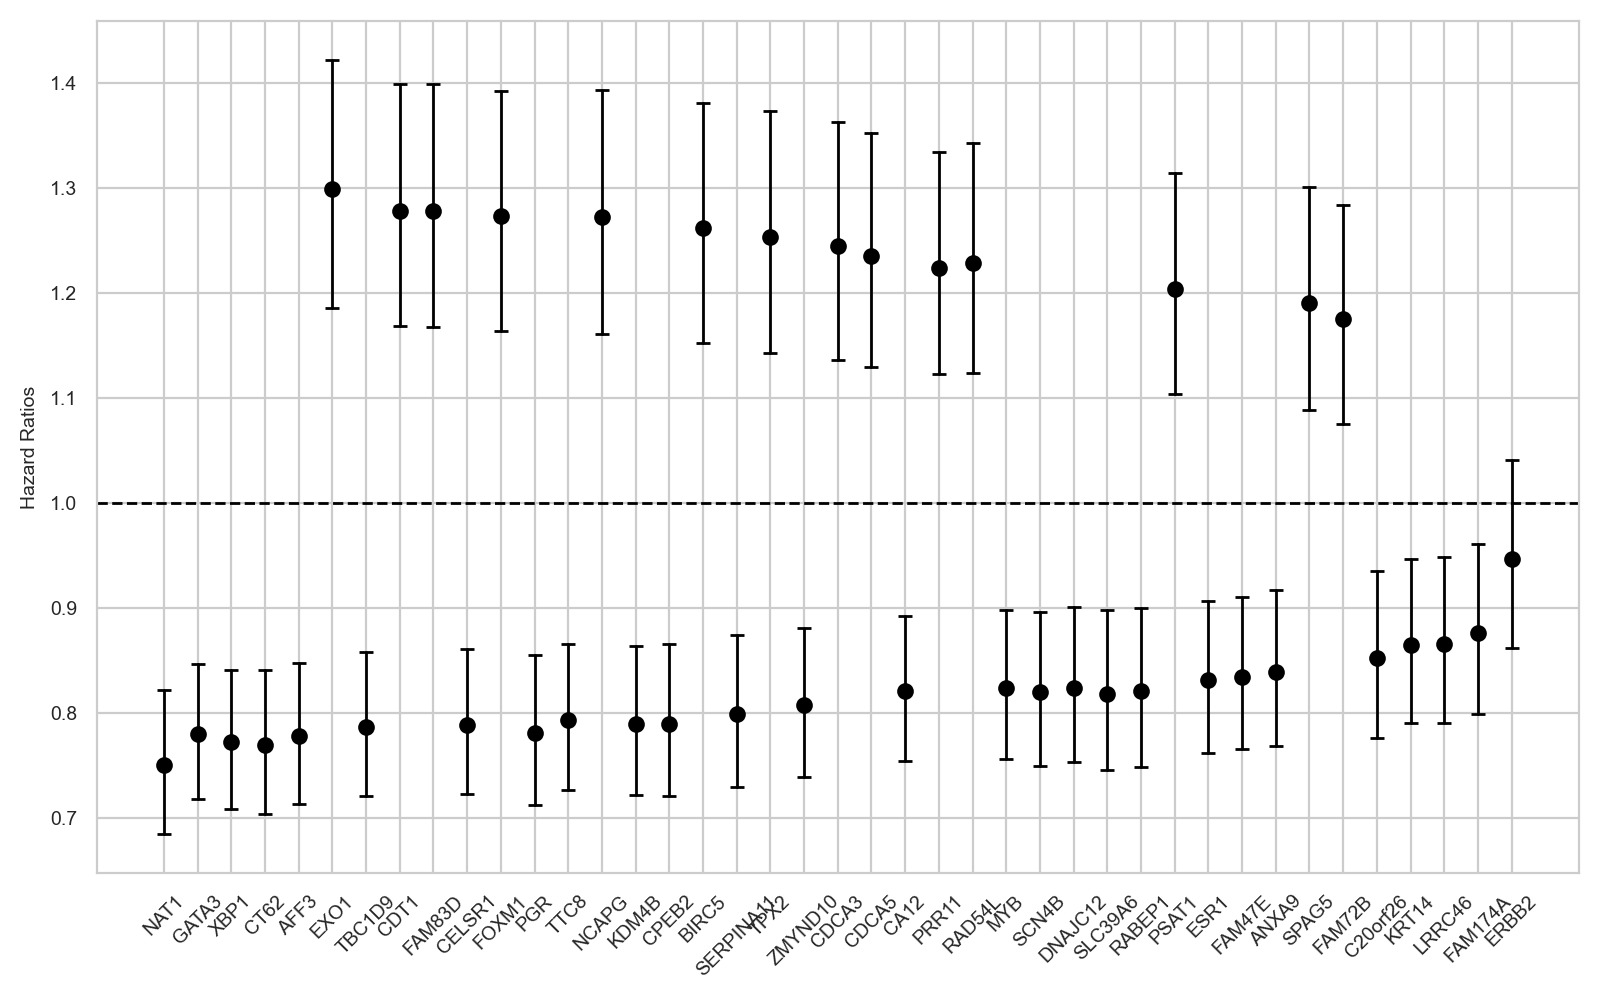

In [248]:
plt.rcParams.update({'font.size': 7})
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))
#ax.set_yscale("log")
ax.axhline(1, ls='--', linewidth=1, color='black')

n = 0
for index, i in uni_res.iterrows():
    x = [n,n]
    y = [i["l95exp(coef)"], i["u95exp(coef)"]]
    ax.plot(x, y, "_-", markersize = 5, markeredgewidth= 1, linewidth = 1, color='black')

    x = [n]
    y = [i["exp(coef)"]]
    ax.plot(x, y, "o", color='black', markersize = 5)
    n += 1

ax.set_xlabel("")
ax.set_ylabel("Hazard Ratios")
ax.set_xticks(np.arange(0, uni_res.shape[0], 1))
ax.set_xticklabels(list(uni_res['feature']), rotation=45)
plt.tight_layout()

#### Prognostic scores for FDD

In [544]:
progn_scores = prognostic_scores(X_sc_bioma_fdd, y_cox)
print("Prognostic scores (c-statistics of features having p-val less than 0.05 in univariate cox regression)")
progn_scores

Prognostic scores (c-statistics of features having p-val less than 0.05 in univariate cox regression)


{'NAT1': 0.6268321048160583,
 'GATA3': 0.5942324297771875,
 'XBP1': 0.6060609029217112,
 'CT62': 0.6116308654294259,
 'AFF3': 0.6158713142732388,
 'EXO1': 0.6147671181881668,
 'TBC1D9': 0.592946300243371,
 'CDT1': 0.6094868497103759,
 'FAM83D': 0.6043087438614955,
 'CELSR1': 0.6176444656544636,
 'FOXM1': 0.6081391427015997,
 'PGR': 0.6110724696905872,
 'TTC8': 0.6047999641731054,
 'NCAPG': 0.6044081075142713,
 'KDM4B': 0.6081041554999181,
 'CPEB2': 0.5981985789598165,
 'BIRC5': 0.6031317743969256,
 'SERPINA11': 0.5966948290315403,
 'TPX2': 0.5903712421996034,
 'ZMYND10': 0.5864064925050416,
 'CDCA3': 0.5912865073955947,
 'CDCA5': 0.5965618776651501,
 'CA12': 0.5924060978494067,
 'PRR11': 0.5892110665918407,
 'RAD54L': 0.5854212529056871,
 'MYB': 0.5839293986259826,
 'SCN4B': 0.6021101481078222,
 'DNAJC12': 0.5923291260057071,
 'SLC39A6': 0.5984840745255385,
 'RABEP1': 0.5887324416728361,
 'PSAT1': 0.5727097027907192,
 'ESR1': 0.5507839232408784,
 'FAM47E': 0.5898114469726974,
 'ANXA9':

#### Prognostic scores for PAM50

In [545]:
progn_score_pam = prognostic_scores(X_sc_bioma_pam, y_cox)
print("Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)")
#progn_score_pam

Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)


In [546]:
print(len(list(set.intersection(set(pam50sig), set(progn_scores.keys())))))
for k in progn_scores.keys():
    if k not in pam50sig:
        print((k,progn_scores[k]))

8
('GATA3', 0.5942324297771875)
('XBP1', 0.6060609029217112)
('CT62', 0.6116308654294259)
('AFF3', 0.6158713142732388)
('TBC1D9', 0.592946300243371)
('CDT1', 0.6094868497103759)
('FAM83D', 0.6043087438614955)
('CELSR1', 0.6176444656544636)
('FOXM1', 0.6081391427015997)
('TTC8', 0.6047999641731054)
('NCAPG', 0.6044081075142713)
('KDM4B', 0.6081041554999181)
('CPEB2', 0.5981985789598165)
('SERPINA11', 0.5966948290315403)
('TPX2', 0.5903712421996034)
('ZMYND10', 0.5864064925050416)
('CDCA3', 0.5912865073955947)
('CDCA5', 0.5965618776651501)
('CA12', 0.5924060978494067)
('PRR11', 0.5892110665918407)
('RAD54L', 0.5854212529056871)
('MYB', 0.5839293986259826)
('SCN4B', 0.6021101481078222)
('DNAJC12', 0.5923291260057071)
('RABEP1', 0.5887324416728361)
('PSAT1', 0.5727097027907192)
('FAM47E', 0.5898114469726974)
('ANXA9', 0.5717958370827951)
('SPAG5', 0.5821107638825718)
('VGLL1', 0.5396509956657854)
('FAM72B', 0.5724431003139052)
('C20orf26', 0.5806867847741296)
('LRRC46', 0.5616019660008369)

Histogram of c-statistics of prognostic features


<IPython.core.display.Javascript object>


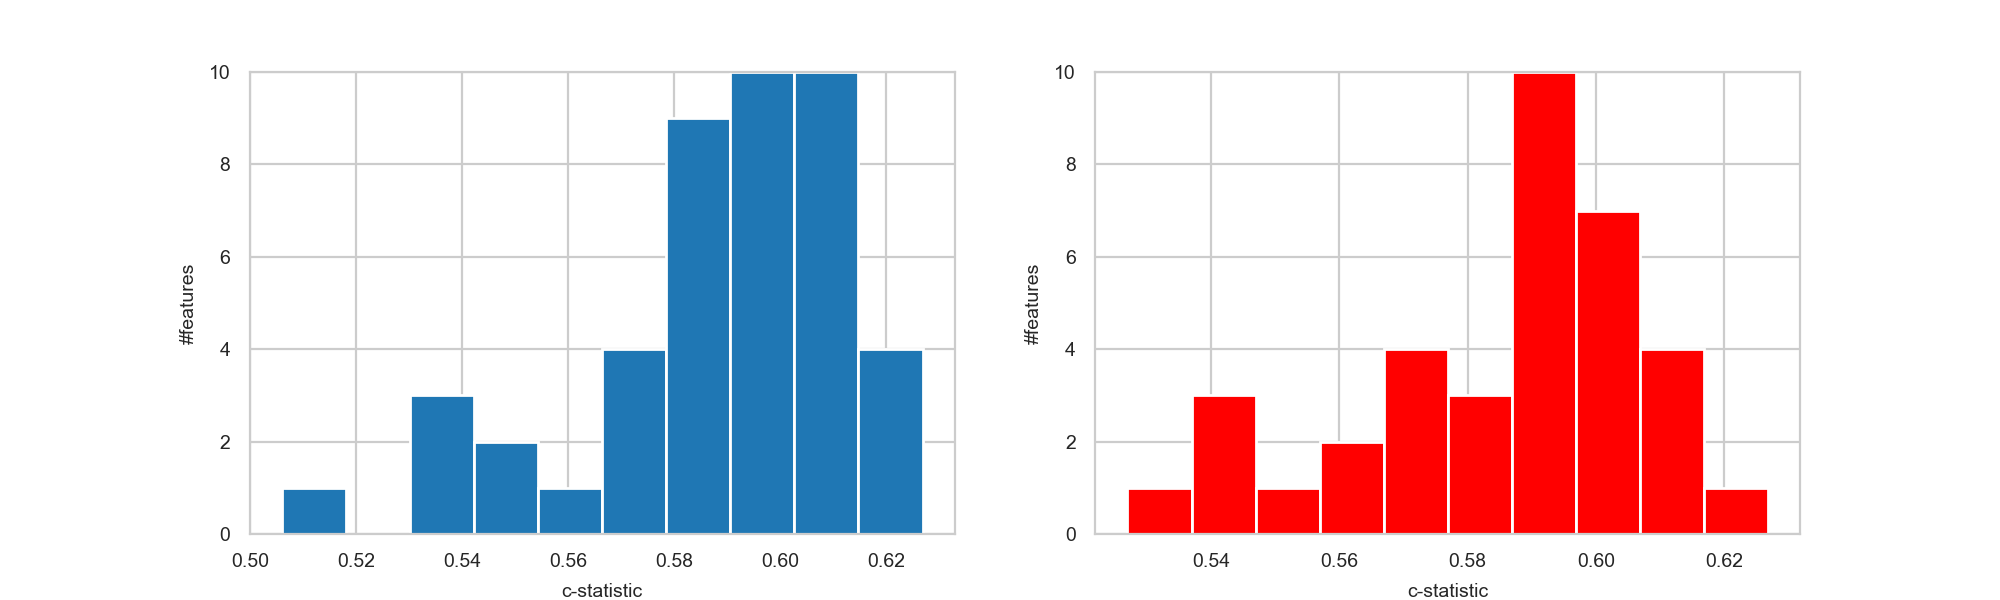

In [547]:
print("Histogram of c-statistics of prognostic features")
plt.rcParams.update({'font.size': 7})
fig, axs = plt.subplots(1, 2, figsize=(10,3))
sns.set_style("whitegrid")
axs[0].hist(list(progn_scores.values()))
axs[1].hist(list(progn_score_pam.values()), color = 'red')
axs[0].set(xlabel='c-statistic', ylabel='#features')
axs[1].set(xlabel='c-statistic', ylabel='#features')
axs[0].set(ylim=(0, 10))
axs[1].set(ylim=(0, 10))
plt.show()

#### Prognostic coefficients for FDD

In [561]:
progn_coefficients = prognostic_coefficients(X_sc_bioma_fdd, y_cox, coef = 0.2)
print("Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)")
progn_coefficients

25
Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)


{'NAT1': -0.2869599530926491,
 'GATA3': -0.24850739737273284,
 'XBP1': -0.25848349850612207,
 'CT62': -0.26164679974710525,
 'AFF3': -0.2512317943562884,
 'EXO1': 0.26127179738526535,
 'TBC1D9': -0.23972517620382486,
 'CDT1': 0.24573179443837279,
 'FAM83D': 0.2456891790304169,
 'CELSR1': -0.236968661700292,
 'FOXM1': 0.24128467873169365,
 'PGR': -0.247550889073421,
 'TTC8': -0.23124455536667474,
 'NCAPG': 0.2406412019522035,
 'KDM4B': -0.23592759718648568,
 'CPEB2': -0.23554894819739106,
 'BIRC5': 0.232405353590541,
 'SERPINA11': -0.22414053973091552,
 'TPX2': 0.22550304689622233,
 'ZMYND10': -0.21397788424608769,
 'CDCA3': 0.21874938767118696,
 'CDCA5': 0.21165182237756322,
 'PRR11': 0.20211422952631436,
 'RAD54L': 0.20608843378265684,
 'SLC39A6': -0.20006588075250176}

#### Prognostic coefficeints for PAM50

In [556]:
progn_coeff_pam = prognostic_coefficients(X_sc_bioma_pam, y_cox, coef = 0.2)
print("Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)")
progn_coeff_pam

Prognostic coefficients (coefficients of features having p-val less than 0.05 in univariate cox regression)


{'NAT1': -0.2869599530926491,
 'EXO1': 0.26127179738526535,
 'PTTG1': 0.26150361445605796,
 'MLPH': -0.2231013869340786,
 'ANLN': 0.24999333036332638,
 'PGR': -0.247550889073421,
 'CCNE1': 0.21935006096043436,
 'MAPT': -0.22270178810076216,
 'BIRC5': 0.232405353590541,
 'BCL2': -0.22432590270269395,
 'CENPF': 0.2317453003717347,
 'FOXA1': -0.20004508533153662,
 'UBE2C': 0.22932772264442675,
 'MKI67': 0.22391916296930456,
 'GPR160': -0.21008588660243266,
 'KIF2C': 0.2143736474512031,
 'UBE2T': 0.21460299715859604,
 'MELK': 0.20910458891729844,
 'PHGDH': 0.21129434880880663,
 'CDC20': 0.20716090679274776,
 'CCNB1': 0.20918601554021796,
 'CEP55': 0.21086977962623296,
 'RRM2': 0.2133795603460867,
 'TYMS': 0.2000518328081153,
 'SLC39A6': -0.20006588075250176}

In [557]:
print(len(list(set.intersection(set(pam50sig), set(progn_coefficients.keys())))))
for k in progn_coefficients.keys():
    if k not in pam50sig:
        print((k,progn_coefficients[k]))

5
('GATA3', -0.24850739737273284)
('XBP1', -0.25848349850612207)
('CT62', -0.26164679974710525)
('AFF3', -0.2512317943562884)
('TBC1D9', -0.23972517620382486)
('CDT1', 0.24573179443837279)
('FAM83D', 0.2456891790304169)
('CELSR1', -0.236968661700292)
('FOXM1', 0.24128467873169365)
('TTC8', -0.23124455536667474)
('NCAPG', 0.2406412019522035)
('KDM4B', -0.23592759718648568)
('CPEB2', -0.23554894819739106)
('SERPINA11', -0.22414053973091552)
('TPX2', 0.22550304689622233)
('ZMYND10', -0.21397788424608769)
('CDCA3', 0.21874938767118696)
('CDCA5', 0.21165182237756322)
('PRR11', 0.20211422952631436)
('RAD54L', 0.20608843378265684)


Histogram of coefficients of prognostic features


<IPython.core.display.Javascript object>


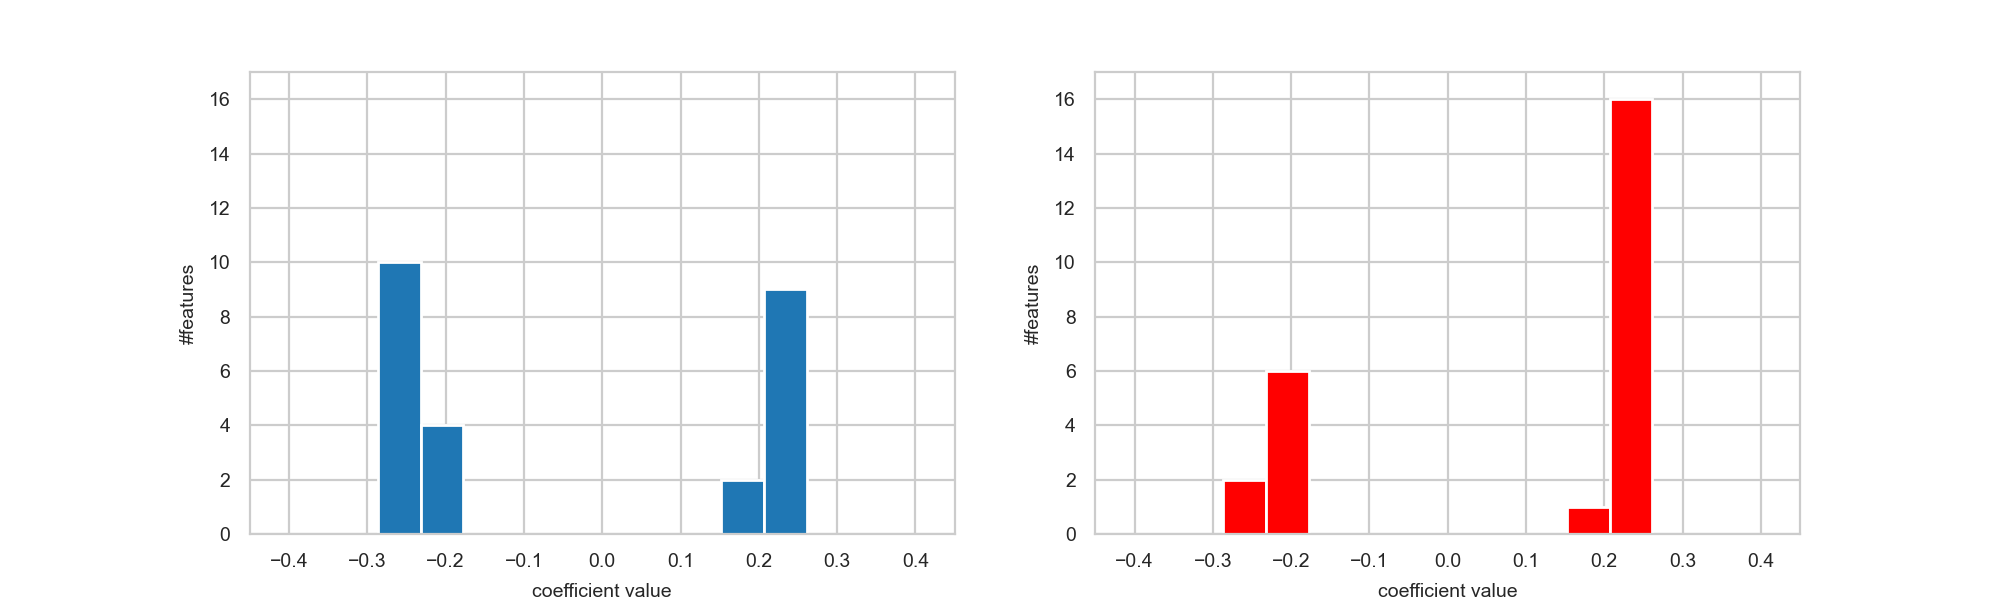

In [558]:
print("Histogram of coefficients of prognostic features")
plt.rcParams.update({'font.size': 7})
fig, axs = plt.subplots(1, 2, figsize=(10,3))
sns.set_style("whitegrid")
axs[0].hist(list(progn_coefficients.values()))
axs[1].hist(list(progn_coeff_pam.values()), color = 'red')
axs[0].set(xlabel='coefficient value', ylabel='#features')
axs[1].set(xlabel='coefficient value', ylabel='#features')
axs[0].set(ylim=(0, 17))
axs[1].set(ylim=(0, 17))
axs[0].set(xlim=(-0.45, 0.45))
axs[1].set(xlim=(-0.45, 0.45))
plt.show()

#### Define the risk score and assess its accuracy

In [566]:
# without covariates
rs_prognostic_fitter = RSPrognosticFitter()
rs_prognostic_classifier = rs_prognostic_fitter.fit(x_train=X_sc_bioma_fdd, y_train=y_cox, alpha = 0.05, p_val=0.05, coef = 0.2)
rs_classes = rs_prognostic_classifier.predict(x=X_sc_bioma_fdd)
rs_scores = rs_prognostic_classifier.predict_score(x=X_sc_bioma_fdd)

25


In [468]:
# with covariates
rs_prognostic_fitter = RSPrognosticFitter()
rs_prognostic_classifier = rs_prognostic_fitter.fit(x_train=X_sc_bioma_fdd2, y_train=y_cox2, cov=pheno_covariates, alpha = 0.05, p_val=0.05, coef = 0.2)
rs_classes = rs_prognostic_classifier.predict(x=X_sc_bioma_fdd)
rs_scores = rs_prognostic_classifier.predict_score(x=X_sc_bioma_fdd)

In [567]:
len(rs_scores)

2969

In [568]:
swpheno.head()

Sample_geo_accession          Sample_status Sample_submission_date  \
0           GSM2528079  Public on Mar 12 2018            Mar 09 2017   
1           GSM2528080  Public on Mar 12 2018            Mar 09 2017   
2           GSM2528081  Public on Mar 12 2018            Mar 09 2017   
3           GSM2528082  Public on Mar 12 2018            Mar 09 2017   
4           GSM2528083  Public on Mar 12 2018            Mar 09 2017   

  Sample_last_update_date Sample_type  Sample_channel_count  \
0             Mar 12 2018         SRA                     1   
1             Mar 12 2018         SRA                     1   
2             Mar 12 2018         SRA                     1   
3             Mar 12 2018         SRA                     1   
4             Mar 12 2018         SRA                     1   

  Sample_source_name_ch1 Sample_organism_ch1  Age  NodeSize  ...  \
0   Primary breast tumor        Homo sapiens   43       9.0  ...   
1   Primary breast tumor        Homo sapiens   48      14.0  ...   
2   Primary breast tumor        Homo sapiens   69      27.0  ...   
3   Primary breast tumor        Homo sapiens   39      51.0  ...   
4   Primary breast tumor        Homo sapiens   73      60.0  ...   

                 nhg_pmgc               er_psgc               pgr_psgc  \
0  nhg prediction mgc: G3  er prediction sgc: 0  pgr prediction sgc: 0   
1  nhg prediction mgc: G2  er prediction sgc: 1  pgr prediction sgc: 1   
2  nhg prediction mgc: G3  er prediction sgc: 1  pgr prediction sgc: 1   
3  nhg prediction mgc: G3  er prediction sgc: 1  pgr prediction sgc: 1   
4  nhg prediction mgc: G2  er prediction sgc: 1  pgr prediction sgc: 1   

                her2_psgc               ki67_psgc  Pam50 SurvDays OverallSurv  \
0  her2 prediction sgc: 0  ki67 prediction sgc: 1      3     2367           0   
1  her2 prediction sgc: 0  ki67 prediction sgc: 0      0     2367           0   
2  her2 prediction sgc: 0  ki67 prediction sgc: 1      1     2168           1   
3  her2 prediction sgc: 1  ki67 prediction sgc: 1      0     2416           0   
4  her2 prediction sgc: 0  ki67 prediction sgc: 0      4     2389           0   

  Endocrine_treat chemo  
0             0.0   1.0  
1             1.0   1.0  
2             1.0   1.0  
3             1.0   1.0  
4             1.0   0.0  

[5 rows x 31 columns]

In [569]:
X_model = X_bioma_fdd
# initialize data of lists.
data = {'RiskScore':rs_scores,
        'Class':rs_classes,
        'Event':y_cox['event'],
        'Time':y_cox['time']}
df_sw_dat_phe = pd.DataFrame(data, index = X_model.index)  
#
age_bins = [0, 40, 50, 60, np.inf]
age_names = ['<40', '40-50', '50-60', '60+']
df_sw_dat_phe['Age'] = pd.cut(swpheno['Age'], age_bins, labels=age_names)
df_sw_dat_phe['AgeN'] = swpheno['Age']
df_sw_dat_phe['Chemo'] = swpheno['chemo'].fillna(0)
df_sw_dat_phe['Chemo'] = df_sw_dat_phe['Chemo'].astype(int)
df_sw_dat_phe = pd.concat([df_sw_dat_phe, X_model], axis=1)
df_sw_dat_phe = df_sw_dat_phe.sort_values(by=['RiskScore'])
df_sw_dat_phe['N'] = np.arange(0, len(df_sw_dat_phe['RiskScore']), 1)
df_sw_dat_phe.head()

RiskScore  Class  Event  Time    Age  AgeN  Chemo     CDCA5       MYB  \
293   -8.292589   True      0  1555  50-60    53      0 -0.414232  3.578128   
2536  -8.062641   True      0  2018  50-60    55      0 -0.152891  5.018771   
2654  -8.008209   True      0  1717    60+    71      0 -0.283805  4.584936   
592   -7.985108   True      0  2168  50-60    58      0 -0.352103  4.427386   
1134  -7.865372   True      0  1704  40-50    46      1  0.934773  5.380517   

        FAM47E  ...   TMEM45B  SERPINA11      MPP6    CELSR1      TTC8  \
293   2.499380  ...  2.140798   4.636445  0.589361  4.893937  3.590840   
2536  3.026566  ...  0.240123   2.304032  0.664352  4.668116  3.682643   
2654  2.986007  ...  3.981794   0.224547 -0.000726  3.934029  4.275023   
592   2.778822  ...  2.230373   2.316502 -0.036477  5.875944  2.791401   
1134  3.113436  ...  1.985370   3.316517 -0.227761  5.736986  3.799411   

         SPAG5     ANXA9    LRRC46      CA12  N  
293  -0.926087  2.602196  0.540380  6.828496  0  
2536 -0.707989  3.818687  1.425846  5.277575  1  
2654 -0.236323  3.263628  1.921689  6.662865  2  
592  -1.049639  3.345070  0.116058  6.846906  3  
1134  0.020169  4.422374  0.792373  8.015370  4  

[5 rows x 58 columns]

In [570]:
print(np.min(df_sw_dat_phe['RiskScore']))
print(np.max(df_sw_dat_phe['RiskScore']))

-8.292588550598385
13.582528337668473


In [440]:
time_sort = list(df_sw_dat_phe['Time']).sort()
df_age = pd.DataFrame()
for i in range(np.max(df_sw_dat_phe['Time'])):
    temp = df_sw_dat_phe[df_sw_dat_phe['Time'] == i]
    if temp.shape[0] == 0:
        df_age[str(i)] = [0,0,0,0]
    else:
        df_age[str(i)] = temp['AgeN'].value_counts(bins = age_bins).sort_index(axis=0).tolist()
#df_age['Age'] = age_names
df_age_2 = df_age.T
df_age_2.columns = age_names
df_age_2['Time'] = df_age.columns

In [441]:
df_age_2.head()

<40  40-50  50-60  60+ Time
0    0      0      0    0    0
1    0      0      0    0    1
2    0      0      0    0    2
3    0      0      0    0    3
4    0      0      0    0    4

<IPython.core.display.Javascript object>


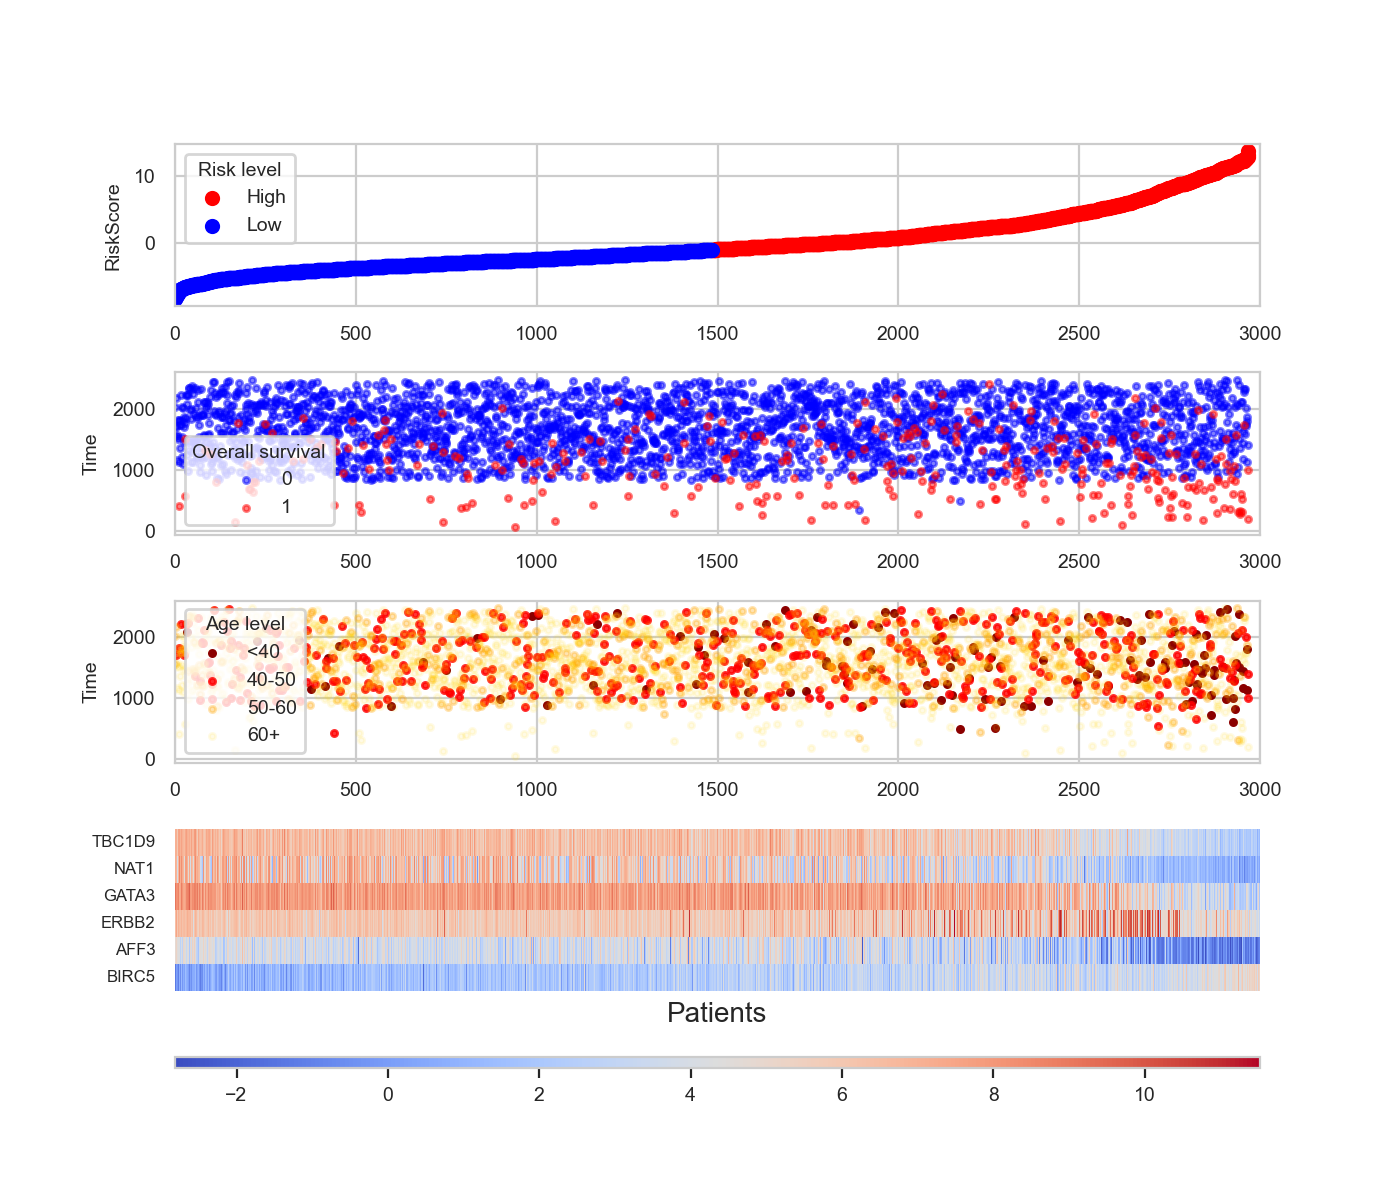

In [627]:
plt.rc('font', size=7)  

fig, axs = plt.subplots(5, 1, figsize=(7,6), gridspec_kw={"height_ratios":[3, 3, 3, 3, 0.2]})

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,6))

markers = ['TBC1D9', 'NAT1', 'GATA3', 'ERBB2', 'AFF3', 'BIRC5']
#fig.tight_layout(pad=1.0)
fig.subplots_adjust(hspace=0.5)

# scatter plot
colors = {True:'blue', False:'red'}
grouped = df_sw_dat_phe.groupby('Class')
for key, group in grouped:
    group.plot(ax=axs[0], kind='scatter', x='N', y='RiskScore', label=key, color=colors[key])

axs[0].set_xlabel('', fontsize=8)
axs[0].set_xlim([0, 3000])
axs[0].legend(title='Risk level', labels= ['High','Low'])

# scatterplot
colors = {1:'red', 0:'blue'}
grouped = df_sw_dat_phe.groupby('Event')
for key, group in grouped:
    group.plot(ax=axs[1], kind='scatter', x='N', y='Time', label=key, color=colors[key], alpha = 0.5, marker = '.')
    
axs[1].set_xlabel('', fontsize=8)
axs[1].set_xlim([0, 3000])
axs[1].legend(title='Overall survival')
    
# scatterplot
colors = {'<40':'darkred', '40-50':'red', '50-60':'orange', '60+': 'gold'}
trasps = {'<40':1, '40-50':0.8, '50-60':0.3, '60+': 0.1}
grouped = df_sw_dat_phe.groupby('Age')
for key, group in grouped:
    t = trasps[key]
    group.plot(ax=axs[2], kind='scatter', x='N', y='Time', label=key, color=colors[key], alpha = t, marker = '.')
    
axs[2].set_xlabel('', fontsize=8)
axs[2].set_xlim([0, 3000])
axs[2].legend(title='Age level', loc = 'lower left')

# scatterplot
#colors = {0:'grey', 1:'orange'}
#grouped = df_sw_dat_phe.groupby('Chemo')
#for key, group in grouped:
#    group.plot(ax=axs[3], kind='scatter', x='N', y='Time', label=key, color=colors[key], alpha = 0.5, marker = '.')
    
#axs[3].set_xlabel('', fontsize=8)
#axs[3].legend(title='Chemo')
    
# heatmap
# Define two rows for subplots
#cax3, ax3 = plt.subplots(fig, nrows=2, figsize=(8,4.025),  gridspec_kw={"height_ratios":[0.025, 1]})
sns.heatmap(df_sw_dat_phe[markers].T, ax=axs[3], cmap="coolwarm", xticklabels=False, cbar=False)  
# colorbar
fig.colorbar(axs[3].get_children()[0], cax=axs[4], orientation="horizontal")
axs[3].set_yticklabels(axs[3].get_yticklabels(), rotation = 0, fontsize = 6)

axs[3].set_xlabel('Patients', fontsize=10)
    
plt.show()

plt.savefig('risk_biom.pdf', bbox_inches='tight')

#### Estimating the survival function using Kaplan-Meier

In [572]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
kmf = KaplanMeierFitter()
low_risk = (df_sw_dat_phe["Class"] == True)
T = df_sw_dat_phe["Time"]
E = df_sw_dat_phe["Event"]
results = logrank_test(T[low_risk], T[~low_risk], E[low_risk], E[~low_risk], alpha=.99)
print(results.summary.iloc[:,1])
results.print_summary()

0    4.382761e-11
Name: p, dtype: float64


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          43.44 <0.005     34.41

<IPython.core.display.Javascript object>


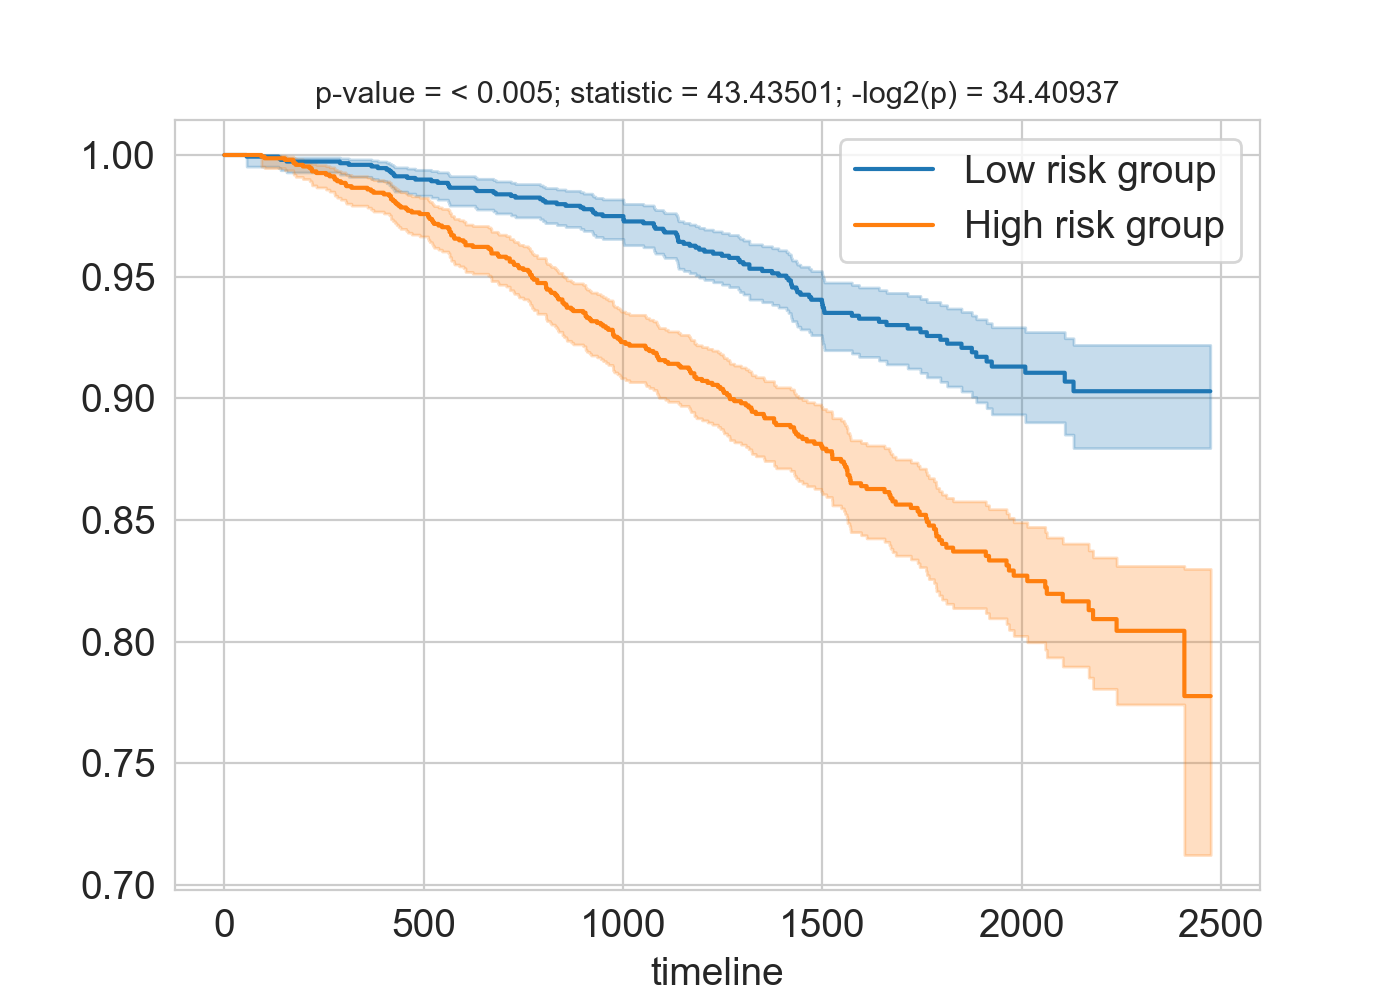

In [573]:
plt.rc('font', size=14)  

fig, ax = plt.subplots(1, 1, figsize=(7,5))

kmf.fit(T[low_risk], event_observed=E[low_risk], label="Low risk group")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~low_risk], event_observed=E[~low_risk], label="High risk group")
kmf.plot_survival_function(ax=ax) #at_risk_counts=True

ts = round(float(results.summary.iloc[:,0]), 5)
pv = round(float(results.summary.iloc[:,1]), 10)
lt = round(float(results.summary.iloc[:,2]), 5)

ax.set_title('p-value = < 0.005; statistic = ' + str(ts) + '; -log2(p) = ' + str(lt), fontsize=11)

#plt.title("Lifespans of different global regimes")
plt.show()

In [574]:
mappin_pam50 = ['LumA','LumB','Her2','Basal', 'Normal']
dfp = pd.DataFrame({'AFF3':X_bioma_fdd['AFF3'].tolist(),
                    'NAT1':X_bioma_fdd['NAT1'].tolist(),
                    'GATA3':X_bioma_fdd['GATA3'].tolist(),
                    'ERBB2':X_bioma_fdd['ERBB2'].tolist(),
                    'BIRC5':X_bioma_fdd['BIRC5'].tolist(),
                    'PAM50':[mappin_pam50[i] for i in pam50.tolist()]})
dfp.head()

AFF3      NAT1     GATA3     ERBB2     BIRC5   PAM50
0 -2.640064  1.605137  4.463707  5.597763  4.321804   Basal
1  4.378482  7.662760  7.413666  6.224703  2.057110    LumA
2  3.179206  2.849914  7.820486  4.671302  5.862456    LumB
3  4.800641  6.974007  7.569979  9.847420  2.681070    LumA
4  3.479854  4.076756  7.476945  5.135149 -0.845276  Normal

<IPython.core.display.Javascript object>


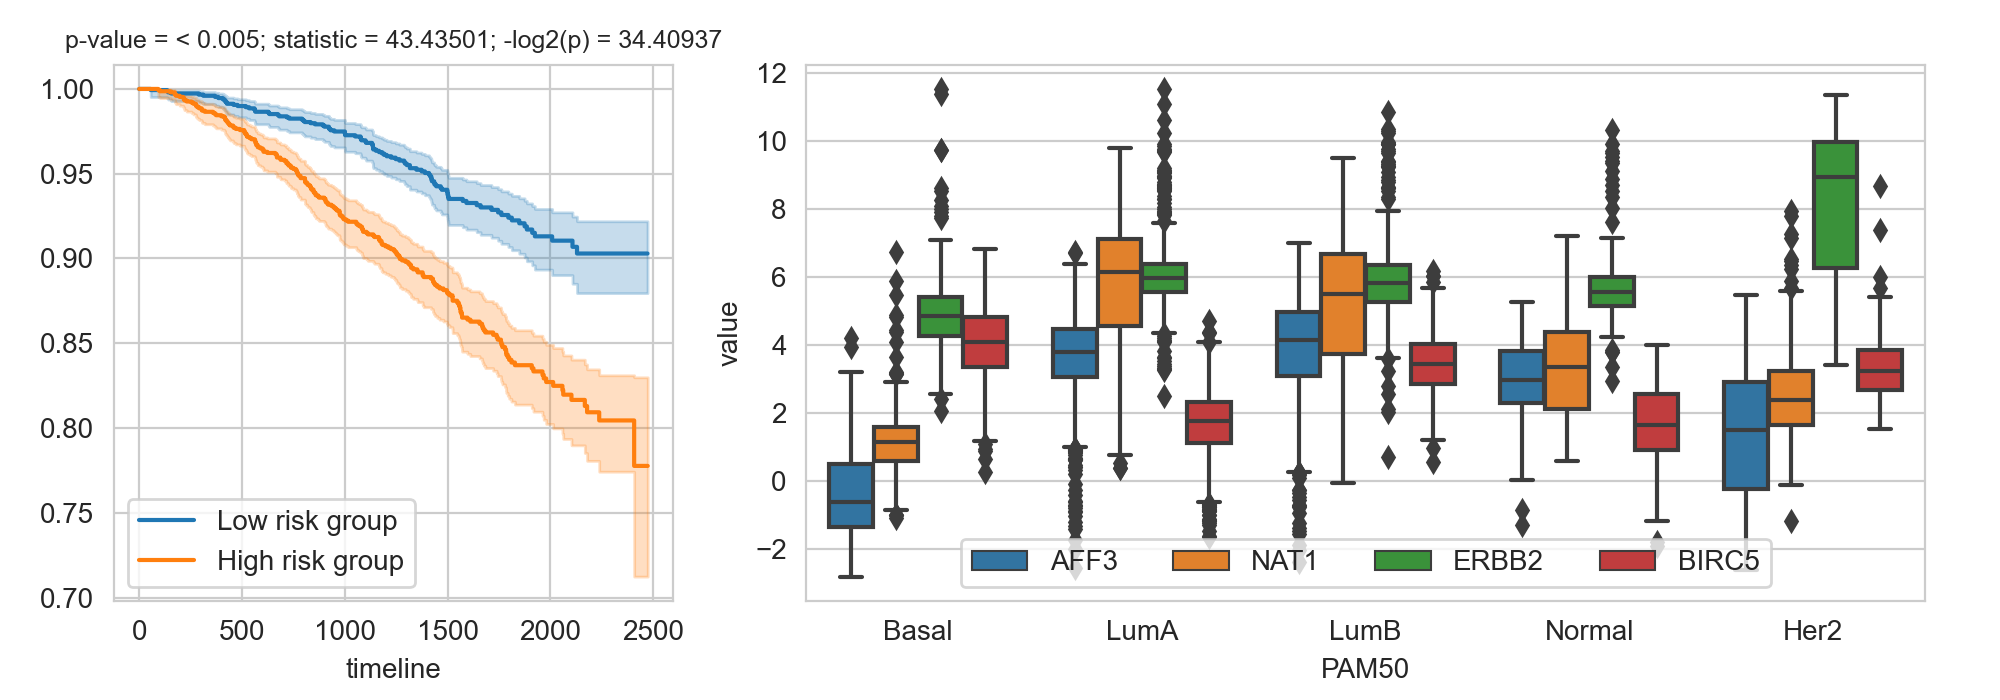

In [580]:
plt.rc('font', size=10)  

fig, axs = plt.subplots(1, 2, figsize=(10,3.5), gridspec_kw={"width_ratios":[1, 2]})

fig.tight_layout(pad=2.0)

kmf.fit(T[low_risk], event_observed=E[low_risk], label="Low risk group")
kmf.plot_survival_function(ax=axs[0])

kmf.fit(T[~low_risk], event_observed=E[~low_risk], label="High risk group")
kmf.plot_survival_function(ax=axs[0]) #at_risk_counts=True

ts = round(float(results.summary.iloc[:,0]), 5)
pv = round(float(results.summary.iloc[:,1]), 10)
lt = round(float(results.summary.iloc[:,2]), 5)

axs[0].set_title('p-value = < 0.005; statistic = ' + str(ts) + '; -log2(p) = ' + str(lt), fontsize=9)

dd=pd.melt(dfp, id_vars=['PAM50'], value_vars=['AFF3','NAT1','ERBB2','BIRC5'], var_name='Genes')
sns.boxplot(x='PAM50', y='value', data=dd, hue='Genes', ax=axs[1])
plt.legend(loc='lower center', ncol=4)
plt.show()

plt.savefig('surv_biom.pdf', bbox_inches='tight')

In [482]:
type(pam50.tolist())

list

#### Predict the risk score for TCGA

In [343]:
tcgaplus.head()

patient  PFI.1  PFI.time.1  PFI.2  PFI.time.2  PFS  PFS.time  DSS_cr  \
0  TCGA-3C-AAAU      1      1808.0    1.0      1808.0    1    1808.0     0.0   
1  TCGA-3C-AALI      0      4005.0    0.0      4005.0    0    4005.0     0.0   
2  TCGA-3C-AALJ      0      1474.0    0.0      1474.0    0    1474.0     0.0   
3  TCGA-3C-AALK      0      1448.0    0.0      1448.0    0    1448.0     0.0   
4  TCGA-4H-AAAK      0       348.0    0.0       348.0    0     348.0     0.0   

   DSS.time.cr  DFI.cr  DFI.time.cr  PFI.cr  PFI.time.cr  PFI.1.cr  \
0       4047.0     1.0       1808.0       1       1808.0         1   
1       4005.0     0.0       4005.0       0       4005.0         0   
2       1474.0     0.0       1474.0       0       1474.0         0   
3       1448.0     NaN          NaN       0       1448.0         0   
4        348.0     0.0        348.0       0        348.0         0   

   PFI.time.1.cr  PFI.2.cr  PFI.time.2.cr  
0         1808.0       1.0         1808.0  
1         4005.0       0.0         4005.0  
2         1474.0       0.0         1474.0  
3         1448.0       0.0         1448.0  
4          348.0       0.0          348.0

In [344]:
tcgaplus.isna().sum()

patient            0
PFI.1              0
PFI.time.1         1
PFI.2             11
PFI.time.2        12
PFS                0
PFS.time           1
DSS_cr            19
DSS.time.cr        1
DFI.cr           143
DFI.time.cr      144
PFI.cr             0
PFI.time.cr        1
PFI.1.cr           0
PFI.time.1.cr      1
PFI.2.cr          11
PFI.time.2.cr     12
dtype: int64

In [323]:
rs_tcga_classes = rs_prognostic_classifier.predict(x=X_sc_bioma_tcga_fdd)
rs_tcga_scores = rs_prognostic_classifier.predict_score(x=X_sc_bioma_tcga_fdd)
print(len(rs_tcga_classes))
print(len(rs_tcga_scores))

1081
1081


In [384]:
X_model = X_sc_bioma_tcga_fdd
# initialize data of lists.
data = {'RiskScore':rs_tcga_scores,
        'Class':rs_tcga_classes,
        'Event':y_cox_tcga['event'],
        'Time':y_cox_tcga['time']}
df_tcga_dat_phe = pd.DataFrame(data, index = X_model.index)  
#
age_bins = [0, 40, 50, 60, np.inf]
age_names = ['<40', '40-50', '50-60', '60+']
df_tcga_dat_phe['Age'] = pd.cut(tcgap['age_at_initial_pathologic_diagnosis'], age_bins, labels=age_names)
df_tcga_dat_phe['AgeN'] = tcgap['age_at_initial_pathologic_diagnosis']
df_tcga_dat_phe = pd.concat([df_tcga_dat_phe, X_model], axis=1)
df_tcga_dat_phe = df_tcga_dat_phe.sort_values(by=['RiskScore'])
df_tcga_dat_phe['N'] = np.arange(0, len(df_tcga_dat_phe['RiskScore']), 1)
df_tcga_dat_phe.head()

RiskScore  Class  Event  Time  Age  AgeN     CDCA5       MYB    FAM47E  \
891 -12.631909   True      0    78  60+    70 -3.299564 -0.060995  0.176742   
802 -10.913653   True      0  1318  60+    74 -2.263632  1.187325  1.156055   
835 -10.757682   True      1  1004  60+    74 -2.414856  0.617777  1.460571   
838 -10.403590   True      0   501  60+    63 -2.771184  0.148270  1.148446   
194 -10.329948   True      0     0  60+    67 -2.043256  0.712485  1.112253   

         TPX2  ...   TMEM45B  SERPINA11      MPP6    CELSR1      TTC8  \
891 -4.212690  ...  1.031287   0.910858 -0.241056  0.357861  0.382548   
802 -3.211660  ...  0.327781   0.297222 -0.351098  0.926222  0.722024   
835 -1.737365  ...  1.202784   0.825370 -1.334106  1.056294  0.709108   
838 -1.937797  ...  1.515802   1.058389 -0.116847  0.446595  1.075428   
194 -1.295624  ...  0.724098   0.928695 -2.776185  1.330821  0.577314   

        SPAG5     ANXA9    LRRC46      CA12  N  
891 -3.162293  1.109277  0.680068  0.815289  0  
802 -2.314627  0.020936  0.325774  0.480674  1  
835 -1.542908  0.482837  1.374304  0.893232  2  
838 -2.420918 -0.221512  0.718937  0.294111  3  
194 -1.517622  0.903884  1.462903  0.730537  4  

[5 rows x 57 columns]

In [385]:
df_tcga_dat_phe = df_tcga_dat_phe[df_tcga_dat_phe['Time'] < 3000]
print(np.max(df_tcga_dat_phe['Time']))

2991


<IPython.core.display.Javascript object>


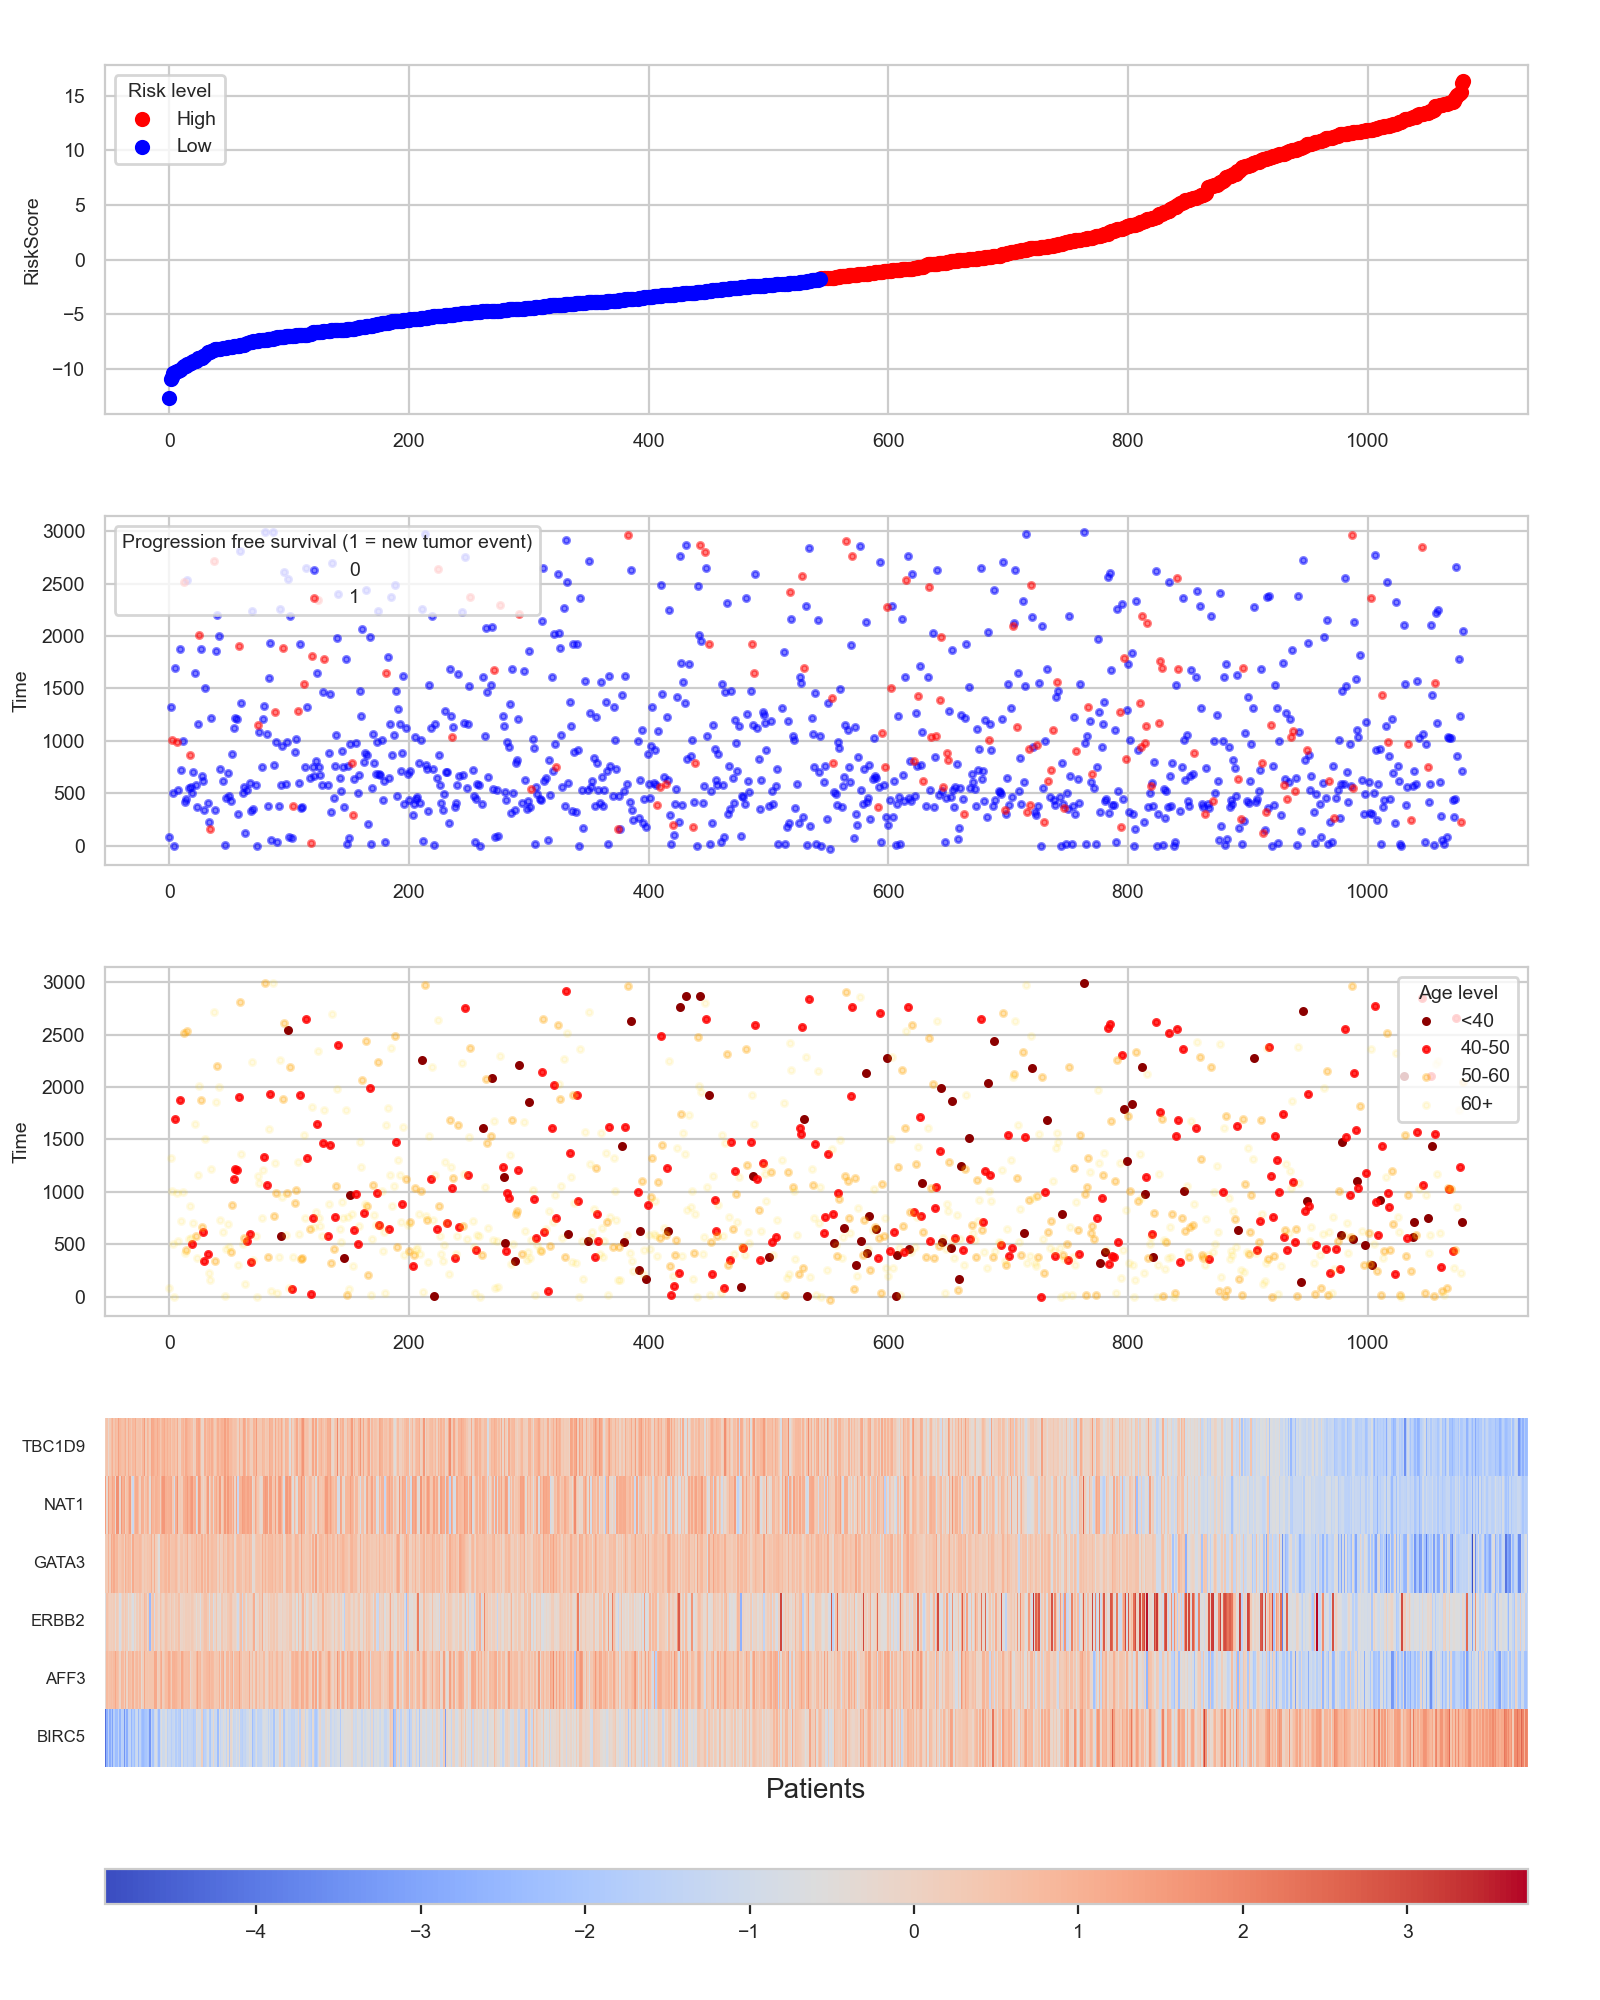

In [386]:
fig, axs = plt.subplots(5, 1, figsize=(8,10), gridspec_kw={"height_ratios":[3, 3, 3, 3, 0.3]})

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,6))

markers = ['TBC1D9', 'NAT1', 'GATA3', 'ERBB2', 'AFF3', 'BIRC5']
fig.tight_layout(pad=3.0)

# scatter plot
colors = {True:'blue', False:'red'}
grouped = df_tcga_dat_phe.groupby('Class')
for key, group in grouped:
    group.plot(ax=axs[0], kind='scatter', x='N', y='RiskScore', label=key, color=colors[key])

axs[0].set_xlabel('', fontsize=8)
axs[0].legend(title='Risk level', labels= ['High','Low'])

# scatterplot
colors = {True:'red', False:'blue'}
grouped = df_tcga_dat_phe.groupby('Event')
for key, group in grouped:
    group.plot(ax=axs[1], kind='scatter', x='N', y='Time', label=key, color=colors[key], alpha = 0.5, marker = '.')
    
axs[1].set_xlabel('', fontsize=8)
axs[1].legend(title='Progression free survival (1 = new tumor event)')
    
# scatterplot
colors = {'<40':'darkred', '40-50':'red', '50-60':'orange', '60+': 'gold'}
trasps = {'<40':1, '40-50':0.8, '50-60':0.3, '60+': 0.1}
grouped = df_tcga_dat_phe.groupby('Age')
for key, group in grouped:
    t = trasps[key]
    group.plot(ax=axs[2], kind='scatter', x='N', y='Time', label=key, color=colors[key], alpha = t, marker = '.')
    
axs[2].set_xlabel('', fontsize=8)
axs[2].legend(title='Age level')
    
# heatmap
# Define two rows for subplots
#cax3, ax3 = plt.subplots(fig, nrows=2, figsize=(8,4.025),  gridspec_kw={"height_ratios":[0.025, 1]})
sns.heatmap(df_tcga_dat_phe[markers].T, ax=axs[3], cmap="coolwarm", xticklabels=False, cbar=False)  
# colorbar
fig.colorbar(axs[3].get_children()[0], cax=axs[4], orientation="horizontal")
axs[3].set_yticklabels(axs[3].get_yticklabels(), rotation = 0, fontsize = 6)

axs[3].set_xlabel('Patients', fontsize=10)
    
plt.show()

In [370]:
df_tcga_dat_phe.shape

(1003, 57)

In [387]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
kmf = KaplanMeierFitter()
low_risk = (df_tcga_dat_phe["Class"] == True)
T = df_tcga_dat_phe["Time"]
E = df_tcga_dat_phe["Event"]
results = logrank_test(T[low_risk], T[~low_risk], E[low_risk], E[~low_risk], alpha=.99)
print(results.summary.iloc[:,1])
results.print_summary()

0    0.000044
Name: p, dtype: float64


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.70 <0.005     14.48

<IPython.core.display.Javascript object>


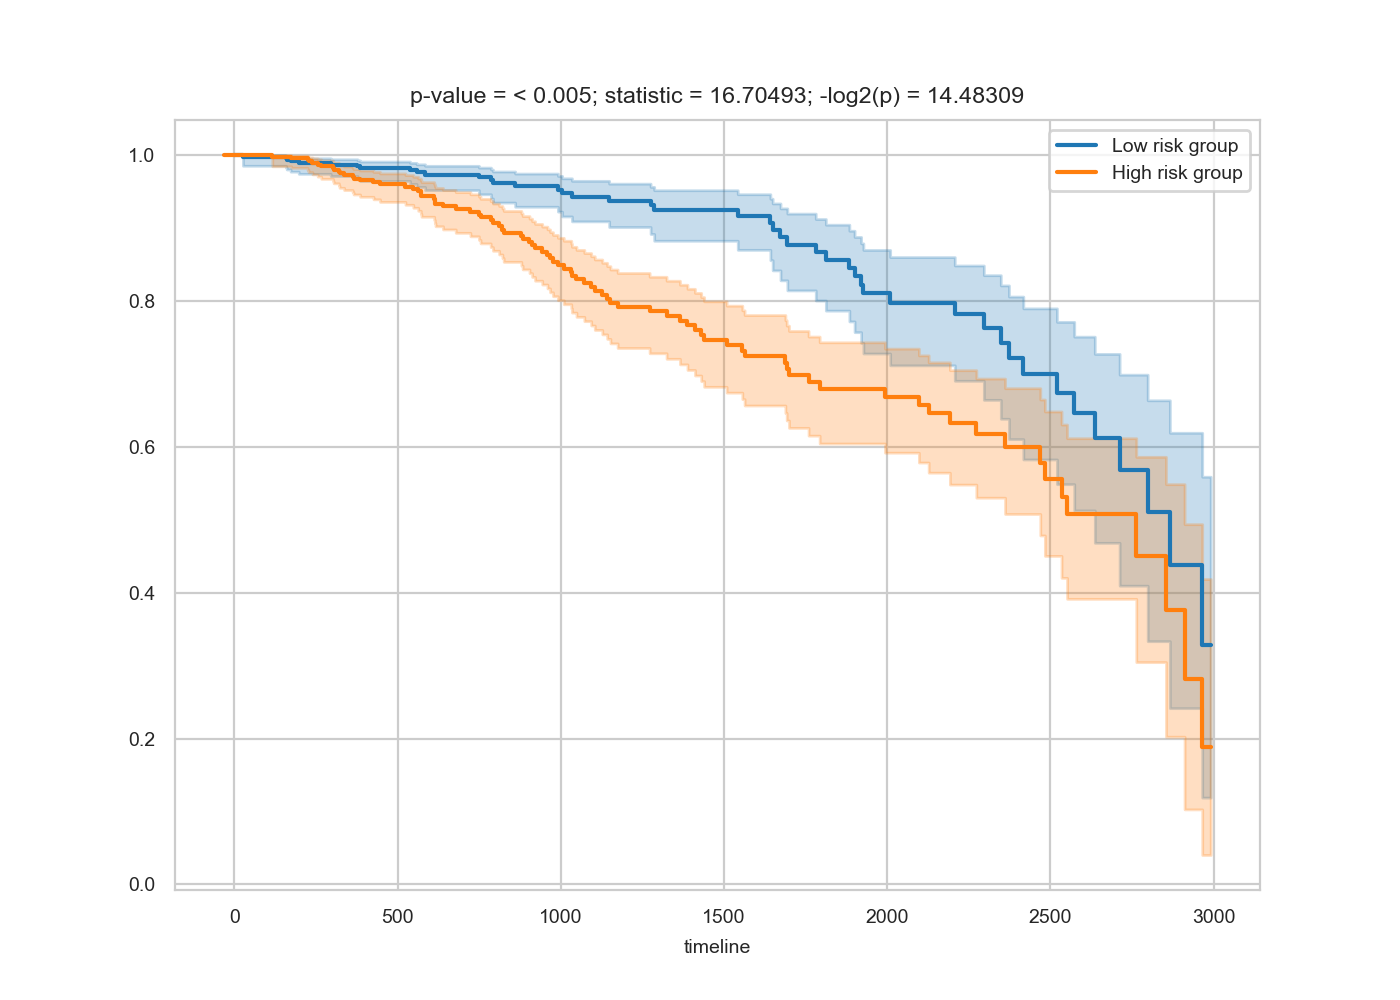

In [388]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

kmf.fit(T[low_risk], event_observed=E[low_risk], label="Low risk group")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~low_risk], event_observed=E[~low_risk], label="High risk group")
kmf.plot_survival_function(ax=ax) #at_risk_counts=True

ts = round(float(results.summary.iloc[:,0]), 5)
pv = round(float(results.summary.iloc[:,1]), 10)
lt = round(float(results.summary.iloc[:,2]), 5)

ax.set_title('p-value = < 0.005; statistic = ' + str(ts) + '; -log2(p) = ' + str(lt))

#plt.title("Lifespans of different global regimes")
plt.show()

In [156]:
rs_prognostic_fitter = RSPrognosticFitter()
rs_prognostic_classifier = rs_prognostic_fitter.fit(x_train=X_sc_bioma_fdd, y_train=y_cox)
rs_classes = rs_prognostic_classifier.predict(x=X_sc_bioma_fdd)
print("Classes from risk scores (True for lower risk)")
df_classes = pd.DataFrame()
df_classes["risk_group"] = rs_classes
print(df_classes)

Classes from risk scores (True for lower risk)
      risk_group
0          False
1           True
2          False
3          False
4           True
...          ...
2964       False
2965       False
2966       False
2967       False
2968        True

[2969 rows x 1 columns]


In [157]:
rs_res = univariate_analysis(x=df_classes, y=y_cox, model=MODEL)
print("Risk score results (results of univariate analysis on a predictive model using the classes from risk scores)")
print(rs_res.to_string())

Risk score results (results of univariate analysis on a predictive model using the classes from risk scores)
      feature     score         p_val  coefficient
0  risk_group  0.586358  5.414315e-09    -0.700164


In [158]:
print("Risk score model cross validation mean c-statistic")
print("In each fold the model is computed using the results of univariate models on all features... might take a while... (5/10 minutes?)")
rs_cv_score = cross_validate(x=X_sc_bioma_fdd, y=y_cox, model=RiskScoreCoxModel(), n_folds=10)
print(str(rs_cv_score))

Risk score model cross validation mean c-statistic
In each fold the model is computed using the results of univariate models on all features... might take a while... (5/10 minutes?)
0.5846687408098079


In [391]:
print("CROSS_VALIDATION OF COX MODELS WITH FEATURES FROM ON-LINE LEARNING VS PAM50 WITH DIFFERENT ALPHA VALUES")
print("The scores are cross-validated c-statistics.")
for a in [0, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]:
    print("alpha: " + str(a))
    all_score = cross_validate(x=X_sc_bioma_all, y=y_cox, model=MODEL, n_folds=10, alpha=a)
    print("selected score: " + str(all_score))
    fdd_score = cross_validate(x=X_sc_bioma_fdd, y=y_cox, model=MODEL, n_folds=10, alpha=a)
    print("selected score: " + str(fdd_score))
    pam50_score = cross_validate(x=X_sc_bioma_pam, y=y_cox, model=MODEL, n_folds=10, alpha=a)
    print("pam50 score: " + str(pam50_score))

CROSS_VALIDATION OF COX MODELS WITH FEATURES FROM ON-LINE LEARNING VS PAM50 WITH DIFFERENT ALPHA VALUES
The scores are cross-validated c-statistics.
alpha: 0
selected score: 0.6496773923587293
selected score: 0.6637860191217723
pam50 score: 0.6854088876853061
alpha: 0.1
selected score: 0.6972934860915053
selected score: 0.661635484473868
pam50 score: 0.6779202736126593
alpha: 0.3
selected score: 0.6840612391309443
selected score: 0.6530226023931875
pam50 score: 0.6647648243174132
alpha: 1
selected score: 0.6622637422907844
selected score: 0.6414057225923407
pam50 score: 0.6477744779545348
alpha: 3
selected score: 0.6427673967046937
selected score: 0.634762700158934
pam50 score: 0.6379774921458545
alpha: 10
selected score: 0.6317524776971156
selected score: 0.631173863233013
pam50 score: 0.6335227673772956
alpha: 30
selected score: 0.6278444178505499
selected score: 0.63015611037316
pam50 score: 0.6326014289094888
alpha: 100
selected score: 0.6266306448529619
selected score: 0.629811498